In [5040]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from tabulate import tabulate
import seaborn as sns
import scikitplot as skplt
from numpy import percentile
import math
from numpy import arange
import IPython.display as ipd
import matplotlib.lines as mlines

#pandas
from pandas.plotting import parallel_coordinates
import datetime

#sklearn
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import learning_curve

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, make_scorer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

#scikitplot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_lift_curve
from scikitplot.metrics import plot_cumulative_gain

#tslearn
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

#mlxtend
from mlxtend.plotting import plot_decision_regions

#matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import pyplot

#seaborn
import seaborn as sns

#scipy
import scipy.stats as stats
from scipy.stats import shapiro, mannwhitneyu, normaltest, kstest
from scipy.stats import boxcox, yeojohnson
from scipy.spatial.distance import euclidean, cityblock, cosine, minkowski
from scipy.spatial.distance import cdist

#matrixprofile
import matrixprofile
from matrixprofile import *
from matrixprofile.discords import discords

In [5041]:
def plot_time_series_years(column, legend_item, color, together, df, columns, period_type):
    if not together and column != "" and legend_item != "" and color != "":
        fig, ax = plt.subplots(figsize=(8, 5))
        ts = df[column]
        plt.plot(ts, color = color)
        plt.grid()
        plt.legend([legend_item], title="Album type")
        plt.xticks(list(df.index))
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.ylabel("count")
        plt.title(column + " TS")
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = df[columns[0]]  #Studio_Recording
        ts2 = df[columns[1]]  #Live_Recording
        plt.plot(ts1, color = '#ea0064')
        plt.plot(ts2, color = '#b329ff')
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.xticks(list(df.index))
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
    plt.show()

In [5042]:
def plot_other_time_series(ts1, ts2, together, columns, period_type):
    
    if not together:
        time_series = [ts1, ts2]
        colors = ['#ea0064', '#b329ff']
        for ts, color, column in zip(time_series, colors, columns):
            fig, ax = plt.subplots(figsize=(8, 5))
            legend_item = column.replace(("_"+period_type+"_freq"), "").replace("_", " ")
            plt.plot(ts.values, color = color)
            plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
            plt.grid()
            plt.legend([legend_item], title="Album type")
            plt.ylabel("count")
            plt.title(column + " TS")
            
            if period_type == 'month':
                ax.xaxis.set_major_locator(MultipleLocator(20))
                ax.xaxis.set_minor_locator(MultipleLocator(10))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
            if period_type == 'week':
                ax.xaxis.set_major_locator(MultipleLocator(100))
                ax.xaxis.set_minor_locator(MultipleLocator(50))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
            plt.show()
        
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = ts1  #Studio_Recording
        ts2 = ts2  #Live_Recording
        plt.plot(ts1.values, color = '#ea0064')
        plt.plot(ts2.values, color = '#b329ff')
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
        
        if period_type == 'month':
            ax.xaxis.set_major_locator(MultipleLocator(20))
            ax.xaxis.set_minor_locator(MultipleLocator(10))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'week':
            ax.xaxis.set_major_locator(MultipleLocator(100))
            ax.xaxis.set_minor_locator(MultipleLocator(50))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
   
        plt.show()

In [5043]:
def plot_other_time_series2(ts, column, ts1, ts2, legend_item, color, together, columns, period_type):
    
    if not ts1 and not ts2 and not together and legend_item != "" and color != "":
        fig, ax = plt.subplots(figsize=(8, 5))
        plt.plot(ts.values, color = color)
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([legend_item], title="Album type")
        plt.ylabel("count")
        plt.title(column + " TS")
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = ts1  #Studio_Recording
        ts2 = ts2  #Live_Recording
        plt.plot(ts1.values, color = '#ea0064')
        plt.plot(ts2.values, color = '#b329ff')
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
    plt.show()

In [5044]:
#Transformations
def offset_translation(ts):
    return ts - ts.mean()

def amplitude_scaling(ts):
    return (ts - ts.mean())/ts.std()

def noise(ts):
    return ((ts - ts.mean())/ts.std()).rolling(window=1).mean()

def trend_removal(ts):
    return ts - ts.rolling(window=2).mean()

#Get Transformations
def get_transformation(ts):
    transformations = list()
    
    t = offset_translation(ts)
    transformations.append(t)
    
    t = amplitude_scaling(ts)
    transformations.append(t)
    
    t = noise(ts)
    transformations.append(t)
    
    t = trend_removal(ts)
    transformations.append(t)

    return transformations

In [5045]:
distances = [euclidean, cityblock, cosine, minkowski]
transformation_names = ['offset_translation', 'amplitude_scaling', 'noise', 'trend_removal']

In [5046]:
indexes = [((i.__name__) + '_distance').title() for i in distances]

In [5047]:
def plot_distances_dataframes_normal_global_constraints(ts1, ts2, columns, year_period):
    
    df_temp = pd.DataFrame(index = indexes)
    df_temp.index.name = (columns[0] + " - " + columns[1]).title()
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
    
    for i, distance in enumerate(distances):

        #key for each distance
        key = indexes[i]

        #dataset for each distance with initially only normal distance between ts1 and ts2
        df_temp.loc[key, 'No_transformation'] = distance(ts1, ts2)

        #applies transformation on ts1 and ts2 
        for transformation_ts1, transformation_ts2, transformation_name in \
        zip(get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2

            #check for nonfinite values (e.g. NaN values) and deletes these from ts
            for ts in [ts1_temp, ts2_temp]:
                for i in ts.index:
                    if not (np.isfinite(ts.loc[i])):
                        ts.drop(labels=i, inplace = True)

            #calculates distance between ts1 and ts2
            df_temp.loc[key, transformation_name.title()] = distance(ts1_temp, ts2_temp)
            
    ipd.display(df_temp)

In [5048]:
def plot_distances_dataframes_normal_global_constraints2(ts1, ts2, columns):
    for distance in distances:

        #key for each distance
        key = [(columns[0] + " - " + columns[1] + " " + (distance.__name__) + '_distance ').title()]

        #dataset for each distance with initially only normal distance between ts1 and ts2
        df_temp = pd.DataFrame({'No_transformation': distance(ts1, ts2)}, index = (key))

        #applies transformation on ts1 and ts2 
        for transformation_ts1, transformation_ts2, transformation_name in \
        zip(get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2

            #check for nonfinite values (e.g. NaN values) and deletes these from ts
            for ts in [ts1_temp, ts2_temp]:
                for i in ts.index:
                    if not (np.isfinite(ts.loc[i])):
                        ts.drop(labels=i, inplace = True)

            #calculates distance between ts1 and ts2
            df_temp.loc[key, transformation_name.title()] = distance(ts1_temp, ts2_temp)
            df_temp.index.name = ((distance.__name__) + '_distance ').title()

        ipd.display(df_temp)

In [5049]:
def plot_translation_plot(ts1, ts2, columns, year_period, period_type):
    
    if not year_period:
        ts1 = pd.Series(ts1.values)
        ts2 = pd.Series(ts2.values)
        
    ts_temps = []

    for i, transformation_ts1, transformation_ts2, transformation_name in \
        zip(range(0,4), get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2
            ts_temps.append((ts1_temp, ts2_temp, transformation_name))

            
    for i, (a,b,c) in enumerate(ts_temps):
        
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.plot(ts_temps[i][0], color = '#ea0064')
        ax.plot(ts_temps[i][1], color = '#b329ff')  
        
        if year_period:
            if c != 'trend_removal':
                ax.xaxis.set_major_locator(MultipleLocator(2))
                ax.xaxis.set_minor_locator(MultipleLocator(1))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'month':
            ax.xaxis.set_major_locator(MultipleLocator(20))
            ax.xaxis.set_minor_locator(MultipleLocator(10))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'week':
            ax.xaxis.set_major_locator(MultipleLocator(100))
            ax.xaxis.set_minor_locator(MultipleLocator(50))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')

        plt.title(columns[0] + " - " + columns[1] + "\n" + ts_temps[i][2].title())
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.grid()
        plt.show()

In [5050]:
def plot_translation_plot2(ts1, ts2, columns):
    ts_temps = []

    for i, transformation_ts1, transformation_ts2, transformation_name in \
        zip(range(0,4), get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2
            ts_temps.append((ts1_temp, ts2_temp, transformation_name))

    for i, (a,b,c) in enumerate(ts_temps):
        plt.plot(ts_temps[i][0])
        plt.plot(ts_temps[i][1])    
        plt.title(columns[0] + " - " + columns[1] + " " + ts_temps[i][2].title())
        plt.grid()
        plt.show()

In [5051]:
def plot_point_to_point_matrix(ts1, ts2, columns, year_period):
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
    
    mat = cdist(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1)) 

    if year_period:
        fig, ax = plt.subplots(figsize=(8, 8))

        ax.imshow(mat, cmap = "RdPu")
        ax.axis("off")
        ax.autoscale(False)
        for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                text = ax.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")

        plt.title(columns[0] + " - " + columns[1] + "\n" + "Point to Point Matrix")        
        plt.show()
    
    return mat

In [5052]:
def plot_cumulative_cost_matrix(ts1, ts2, columns, year_period):
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
        
    acc = subsequence_cost_matrix(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1))

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.imshow(acc, cmap = "RdPu")
    ax.axis("off")
    ax.autoscale(False)
    for i in range(acc.shape[0]):
        for j in range(acc.shape[1]):
            text = ax.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")

    plt.title(columns[0] + " - " + columns[1] + "\n" + "Cumulative Cost Matrix")   
    plt.show()

In [5053]:
#-------------------------------------------Calculates DTW path---------------------------------------------#
def calculate_dtw_path(ts1, ts2, flag):
    
    if flag == 'normal':
        path, dist = dtw_path(ts1, ts2)
    elif flag == 'sakoe_chiba':
        path, dist = dtw_path(ts1, ts2, global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
    else:
        path, dist = dtw_path(ts1, ts2, global_constraint="itakura", itakura_max_slope=2.)
        
    return path, dist


#-------------------------------------------Plots optimal path---------------------------------------------#
def plot_optimal_path(mat, path, flag, columns):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.imshow(mat, cmap = "RdPu")
    ax.axis("off")
    ax.autoscale(False)
    ax.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
    if flag == 'normal':
        title = columns[0] + " - " + columns[1] + "\n" + "Optimal Path"
    else:
        title = columns[0] + " - " + columns[1] + "\n" + flag.title() + " global constraint's Optimal Path"
    plt.title(title)
    plt.show()
    
    
#--------------------------------------Calculates and plots optimal path-----------------------------------#
def calculate_and_plot_optimal_paths(mat, ts1, ts2, columns, year_period):
    
    year_period = year_period
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
        
    flag_list = ['normal', 'sakoe_chiba', 'itakura']

    for i in flag_list:

        path, dist = calculate_dtw_path(ts1, ts2, i)

        print("%s Dist: %d" % (i.title(), dist))
        if year_period:
            print("%s Path:\n" %(i.title()), path)

        print()

        plot_optimal_path(mat, path, i, columns)
        print()


<h2>MatrixProfile</h2>

In [5054]:
def matrixProfile_stomp(ts, w, column, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    mp, mpi = matrixProfile.stomp(ts.values, w)
    
    ax.plot(mp, color = color)
    plt.title(column + "'s Matrix Profile (w = %d)" % (w))
    plt.grid()
    plt.legend([legend_item], title="Album type")
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    plt.show()
    
    return mp, mpi

<h2>Motif Discovery</h2>

In [5055]:
def plot_motifs(ts, mo, mod, max_motifs, column, w, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Total motifs
    li = ax.plot(ts.values, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    colors = ['c', 'g', 'k', 'b', 'y'][:len(mo)]
    lista_generale2 = []
    legend = [legend_item]
    
    for n, m, d, c in zip(range(0, len(mo)), mo, mod, colors):
        
        lista_provvisoria2 = []
        
        for i in m:
            m_shape = ts.values[i:i+w]
            plt.plot(range(i,i+w), m_shape, color=c, lw=3)
            
            if i in li[0].get_data()[0]:
                lista_provvisoria2.append(ts.index[i])
            
        lista_generale2.append(lista_provvisoria2)
        legend.append(lista_provvisoria2)
        
        print ("- Motif "+str(n)+": ", *lista_provvisoria2, sep = " | ")
        print()
    
    
    bbox_to_anchor = ""
    if period_type == 'week' or period_type == 'weekday' or period_type == 'daymoment':
        bbox_to_anchor = (0.0,-0.1)
    else:
        bbox_to_anchor = (1.05, 1)
    
    plt.legend(legend, title="Album type - Motifs", bbox_to_anchor=bbox_to_anchor, loc='upper left')
    leg = ax.get_legend()
    for num, motif, color in zip(range(1, len(mo)+1), mo, colors):
        leg.legendHandles[num].set_color(color)
        
    
    #print("---------------------------------------------------------------------------------------------")
    print()
    #print("Motifs translated: ", lista_generale2)
    #print()
            

    plt.title(column + "\ntop %d Motifs (w = %d)" %(max_motifs, w))
    plt.grid()    
    plt.ylabel("count")
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
    plt.show()

<h2>Anomaly Discovery</h2>

In [5056]:
def plot_anomalies(ts, w, anoms, column, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Time series
    li = ax.plot(ts.values, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    plt.grid()
    plt.ylabel("count")
    plt.title(column + " TS's Anomalies (w = %d)" %(w))
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation

    #Anomalies
    colors = ['c', 'g', 'k', 'b', 'y'][:len(anoms)]
    
    for a, c in zip(anoms, colors):
        
        a_shape = ts.values[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=3)
        
    
    lista_generale2 = []
    
    for n, i in enumerate(anoms):
        if i in li[0].get_data()[0]:       
            lista_generale2.append(ts.index[i])
       
    print ("- Anomalies: ", *lista_generale2, sep = " | ")
    print()
   
    #print("---------------------------------------------------------------------------------------------")
    print()
    #print("Anomalies translated: ", lista_generale2)
    #print()
    
    legend = [legend_item]
    for i in lista_generale2:
        legend.append(i)

    plt.legend(legend, title="Album type - Anomalies", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

<h2>Matrix Profile - Motifs - Discords</h2>

In [5057]:
def matrixProfile_with_discords(anoms, mp, w, column, columns, color, period_type):
        
    fig, ax = plt.subplots(figsize=(8, 5))
    Discords = ""
    li = ax.plot(mp, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
        
    star = ""
    color_star = ""
    
    if column == columns[0]:
        color_star = '#206bff'
    else:
        color_star = '#fb7300'
        
    star = mlines.Line2D([], [], color=color_star, marker='*', markersize=10, label='Discords')
        
    for a, b in zip(li[0].get_data()[0], li[0].get_data()[1]):
        if a in anoms:
            Discords, = plt.plot(a, b, marker='*', c=color_star, markersize = 10)

    plt.title(column + "'s Matrix Profile with discords (w = %d)" % (w))
    plt.grid()
    plt.legend(handles=[star])
    plt.show()

In [5058]:
def plot_matrixProfile_motifs_discords(windows, columns, tss_list, period_type):
    
    #windows = [2, 3, 4, 5]
    colors = ['#ea0064', '#b329ff']
    
    for column, ts, color in zip(columns, tss_list, colors):
        
        legend_item = column.replace("_"+period_type+"_freq", "").replace("_", " ")
        
        if period_type != 'year':
            ts = pd.Series(ts)
            
        for w in windows:
            
            #Matrix Profile
            mp, mpi = matrixProfile_stomp(ts, w, column, color, legend_item, period_type)

            #Motifs
            mo, mod = motifs.motifs(ts.values, (mp, mpi), max_motifs=5)
            print("Motifs ({}): {}".format(len(mo), mo))
            print()
            plot_motifs(ts, mo, mod, 5, column, w, color, legend_item, period_type)
            print()
            print()

            #Anomalies
            anoms = discords(mp, ex_zone=3, k=5)
            print("Anomalies ({}): {}".format(len(anoms), anoms))
            print()
            
            plot_anomalies(ts, w, anoms, column, color, legend_item, period_type)
            print()
            
            #Matrix Profile with discords
            print("Anomalies:", anoms)
            
            if anoms.size != 0:
                matrixProfile_with_discords(anoms, mp, w, column, columns, color, period_type)
            
            print()
            print("---------------------------------------------------------------------------------------------")
        
        print("'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''")

<h3>Old functions</h3>

In [5059]:
def plot_motifs_no(ts, mo, mod, max_motifs, column, w, color, legend_item):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Total motifs
    plt.plot(ts.values, color = color)
    colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
    for m, d, c in zip(mo, mod, colors):
        for i in m:
            m_shape = ts.values[i:i+w]
            plt.plot(range(i,i+w), m_shape, color=c, lw=3)

    plt.title(column + "\ntop %d Motifs (w = %d)" %(max_motifs, w))
    plt.grid()
    plt.legend([legend_item], title="Album type")
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
    plt.show()
    
    #fig, ax = plt.subplots(figsize=(8, 5))
    
    #Single motifs
    #for m, d, c in zip(mo, mod, colors):
    #    for i in m:
    #        m_shape = ts.values[i:i+w]
    #        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    #        plt.title(column + "\nSingle Motif (w = %d)" %(w))
    #    plt.grid()
    #    plt.show()

In [5060]:
def plot_anomalies_no(ts, mo, w, anoms, column, color, legend_item):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Time series
    plt.plot(ts, color = color)
    plt.grid()
    plt.legend([legend_item], title="Album type")
    plt.ylabel("count")
    plt.title(column + " TS's Anomalies (w = %d)" %(w))
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation

    #Anomalies
    colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
    for a, c in zip(anoms, colors):
        a_shape = ts.values[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=3)

    plt.show()

In [5061]:
def plot_matrixProfile_motifs_discords_no(windows, columns, tss_list, period_type):
    
    #windows = [2, 3, 4, 5]
    colors = ['#ea0064', '#b329ff']
    
    for column, ts, color in zip(columns, tss_list, colors):
        
        legend_item = column.replace("_"+period_type+"_freq", "").replace("_", " ")
        
        if period_type != 'year':
            ts = pd.Series(ts)
            
        for w in windows:
            
            #Matrix Profile
            mp, mpi = matrixProfile_stomp(ts, w, column, color, legend_item)

            #Motifs
            mo, mod = motifs.motifs(ts, (mp, mpi), max_motifs=5)
            print("Motifs: ", mo)
            plot_motifs(ts, mo, mod, 5, column, w, color, legend_item)

            #Anomalies
            anoms = discords(mp, ex_zone=3, k=5)
            plot_anomalies(ts, mo, w, anoms, column, color, legend_item)
            print("Anomalies:", anoms)
            
            #Matrix Profile with discords
            if anoms.size != 0:
                matrixProfile_with_discords(anoms, mp, w, column, columns, color, legend_item)
        print("------------------------------------------------------------")

In [5062]:
def get_Studio_and_Live_Recording_cols(df):
    
    col_studio = [col for col in df if 'Studio_Recording' in col]
    col_live = [col for col in df if 'Live_Recording' in col]
    
    dataset_studio = df[col_studio]
    dataset_live = df[col_live]
    
    return dataset_studio, dataset_live

In [5063]:
def get_time_series_month(df1, df2):
    
    ts_month_studio = []
    ts_month_live = []
    TSs_list = []

    for dataset, ts in zip([df1, df2], [ts_month_studio, ts_month_live]):
        for ind in dataset.index:
            row = []
            for col in dataset.columns:
                row.append(dataset[col][ind])
            ts.append(row)

        ts = [j for i in ts for j in i]
        ts = [i for i in ts if i != 0]
        ts.append(0)
        TSs_list.append(ts)
        
    ts_month_studio = TSs_list[0]
    ts_month_live = TSs_list[1]
        
    return ts_month_studio, ts_month_live

In [5064]:
def get_time_series_other_types(df1, df2):
    
    ts_studio = []
    ts_live = []
    TSs_list = []

    for dataset, ts in zip([df1, df2], [ts_studio, ts_live]):
        for ind in dataset.index:
            row = []
            for col in dataset.columns:
                row.append(dataset[col][ind])
            ts.append(row)

        ts = [j for i in ts for j in i]
        #ts = [i for i in ts if i != 0]
        #ts.append(0)
        TSs_list.append(ts)
        
    ts_studio = TSs_list[0]
    ts_live = TSs_list[1]
        
    return ts_studio, ts_live

In [5065]:
def get_cols_period_type(df):
    
    cols = []
    for string in df.columns.tolist():
        for char in string:
            if char.isdigit():
                string = string.replace(char, "")

        cols.append(string[0:len(string)-1] + "_freq")

    cols = sorted(list(set(cols)), reverse = True)
    
    return cols

<h1>Inizio file</h1>

In [5066]:
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import silhouette_score as sil_ts
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
import zlib
import string
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
import numpy as np
import scipy.stats as stats
import collections
import math

In [5067]:
def find_optimal_k_kmeans(max_k, metric, X, other_measures, album_type):
    
    max_k = max_k
    
    sse_list = list()
    silhouette = list()
    
    if other_measures:
        calinski = list()
        bouldin = list()
        fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10))
        
    else:
        fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))

    for k in range(2, max_k + 1):
        
        kmeans = ""
        
        if not other_measures:
            kmeans = TimeSeriesKMeans(n_clusters = k, max_iter = 300, n_init = 10, metric = metric, random_state = 0)
            
        else:
            kmeans = KMeans(n_clusters = k, n_init = 10, max_iter = 300, algorithm='full', random_state = 0)
            
        kmeans.fit(X)

        sse = kmeans.inertia_
        sse_list.append(sse)
        
        if not other_measures:
            sil = sil_ts(X, kmeans.labels_, metric = metric) #silhouette score di TimeSeriesKMeans
            
        else:
            sil = silhouette_score(X, kmeans.labels_)        #silhouette score di sklearn
            
        silhouette.append(sil)
        
        if other_measures:
            cal = calinski_harabasz_score(X, kmeans.labels_)
            calinski.append(cal)

            boul = davies_bouldin_score(X, kmeans.labels_)
            bouldin.append(boul)

        print("k: ", k, "SSE: ", sse, "Silhouette Score: ", sil)
        
        if other_measures:
            print("Calinski-Harabaz: ", cal, "Davies-Bouldin: ", boul)
            
        print()
    
    index = [i for i in range(2, max_k + 1)]
    
    if other_measures:
        ax[0, 0].plot(index, sse_list)
        ax[0, 0].set_ylabel('SSE', fontsize = 15)
        ax[0, 0].set_xlabel('K', fontsize = 15)
        ax[0, 0].set_title(album_type + ' SSE', fontsize = 18)

        ax[0, 1].plot(index, silhouette)
        ax[0, 1].set_ylabel('SIL', fontsize = 15)
        ax[0, 1].set_xlabel('K', fontsize = 15)
        ax[0, 1].set_title(album_type + '\nSilhouette Score', fontsize = 18)
        
        ax[1, 0].plot(index, calinski)
        ax[1, 0].set_ylabel('CAL', fontsize = 15)
        ax[1, 0].set_xlabel('K', fontsize = 15)
        ax[1, 0].set_title(album_type + '\nCalinski-Harabaz Score', fontsize = 18)

        ax[1, 1].plot(index, bouldin)
        ax[1, 1].set_ylabel('BOUL', fontsize = 15)
        ax[1, 1].set_xlabel('K', fontsize = 15)
        ax[1, 1].set_title(album_type + '\nDavies-Bouldin Score', fontsize = 18)
        
        plt.subplots_adjust(hspace=0.5)
        
    else:
        ax1.plot(index, sse_list)
        ax1.set_ylabel('SSE', fontsize = 15)
        ax1.set_xlabel('K', fontsize = 15)
        ax1.set_title(album_type + ' SSE', fontsize = 18)

        ax2.plot(index, silhouette)
        ax2.set_ylabel('SIL', fontsize = 15)
        ax2.set_xlabel('K', fontsize = 15)
        ax2.set_title(album_type + '\nSilhouette Score', fontsize = 18)
    
    #if ticks:
    #    for axis in ax.flat:
    #        axis.xaxis.set_major_locator(MultipleLocator(2))
    #        axis.xaxis.set_minor_locator(MultipleLocator(1))
    #        axis.tick_params(which='major', length=9)
    #        axis.tick_params(which='minor', length=7, color='r')

    plt.show()
    fig.tight_layout()

In [5068]:
def run_kmeans(n_clusters, max_iter, n_init, metric, X, other_measures):
    
    kmeans = ""
    if not other_measures:
        kmeans = TimeSeriesKMeans(n_clusters=n_clusters, max_iter = max_iter, n_init = n_init, metric = metric, random_state = 0)
        
    else:
        kmeans = KMeans(n_clusters = n_clusters, n_init = n_init, max_iter = max_iter, algorithm='full', random_state = 0)
        
    kmeans.fit(X)
    
    hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
    print ('cluster_centers_shape', kmeans.cluster_centers_.shape)
    print()
    
    print ('Labels: ', dict(zip(bins, hist)))
    print()
    
    print ('SSE: ', kmeans.inertia_)
    
    if not other_measures:
        print ('Silhouette Score: ', sil_ts(X, kmeans.labels_, metric = metric))  #silhouette score di TimeSeriesKMeans
        
    if other_measures:
        print ('Silhouette Score: ', silhouette_score(X, kmeans.labels_))  #silhouette score di sklearn
        print ("Calinski - Harabaz Score: ", calinski_harabasz_score(X, kmeans.labels_))
        print ("Davies - Bouldin Score: ", davies_bouldin_score(X, kmeans.labels_))
    
    return kmeans.cluster_centers_, dict(zip(bins, hist)), kmeans.labels_

In [5069]:
def plot_kmeans_centroids(centers, album_type):
    
    fig, ax = plt.subplots()
    plt.plot(np.squeeze(centers).T)
    plt.title(album_type + ' centroids')
    
    plt.show()

In [5070]:
def cluster_insight(df_to_copy, labels):
    
    df = df_to_copy.copy()
    df['Labels'] = labels
    
    ipd.display(df)
    
    for i in np.unique(df['Labels']):
        print("Cluster {}\n".format(i), list(df[df['Labels'] == i].index))
        print()

In [5071]:
def cluster_insight_studio_live(df_to_copy, labels):

    df = df_to_copy.copy()
    df['Labels'] = labels
    
    print("Dataset con le labels associate")
    ipd.display(df)
    
    cluster_dict = pd.DataFrame(columns = ["Studio_Recording", "Live_Recording"], \
                                index = ["Cluster {}".format(str(i)) for i in np.unique(df['Labels'])])
    
    tot_entropies = []
    dim_clusters = []
    max_cluster = 0
    
    for i in np.unique(df['Labels']):
        
        cluster_list = list(df[df['Labels'] == i].index)
                            
        print("Cluster {}\n".format(i), cluster_list)
        
        raw_elements = [elem.split("_")[1] for elem in cluster_list]
        counter = collections.Counter(raw_elements)
        
        cluster_dict.loc["Cluster {}".format(str(i)), 'Studio_Recording'] = counter['studio']
        cluster_dict.loc["Cluster {}".format(str(i)), 'Live_Recording'] = counter['live']
        
        cluster_dict.loc["Cluster {}".format(str(i)), 'Tot_Cluster'] = cluster_dict.loc["Cluster {}".format(str(i)), ['Studio_Recording', 'Live_Recording']].sum()
        
        lista = cluster_dict.loc['Cluster {}'.format(str(i)), ['Studio_Recording', 'Live_Recording']].values.tolist()
        tot = sum(lista)
        dim_clusters.append(tot)
        
        '''
        Entropia singola: -(sommatoria di (pij log2 pij) per tutte le classi all'interno di un cluster.
        --> pij = mij/mj dove mj è il numero di valori nel cluster j e mij è il numero di valori della classe i
        nel cluster j.
        '''
        entropy_single = -sum([(x/tot)*math.log2(x/tot) for x in lista if x != 0])
        cluster_dict.loc["Cluster {}".format(str(i)), 'Entropy'] = "%.4f" %(entropy_single)
        tot_entropies.append(entropy_single)
        
        
        '''
        Purity singola: etichetta della classe più frequente/numero di valori nel cluster
        '''
        purity_single = max(lista)/tot
        cluster_dict.loc["Cluster {}".format(str(i)), 'Purity'] = "%.4f" %(purity_single)

        max_cluster += max(lista)
        
        print()
        
    
    new_row = pd.Series(cluster_dict[['Studio_Recording', 'Live_Recording', 'Tot_Cluster']].sum(axis=0).astype(int), name = "Total")
    cluster_dict = cluster_dict.append(new_row, ignore_index=False)
    
    '''
    Entropia complessiva: sommatoria delle entropie di ogni cluster pesate per la dimensione di ogni cluster.
    --> (mj/m) * ej --> dove mj è la dimensione del cluster j e m è il numero totale di punti 
    (nel nostro caso 16). 
    '''
    
    last_tot = 16
    tot_entropy = 0

    for entropy, dim in zip(tot_entropies, dim_clusters):
        tot_entropy+=(entropy*(dim/last_tot))
        
    cluster_dict.loc["Total", 'Entropy'] = "%.4f" %(tot_entropy)
    
    '''
    Purity complessiva: sommatoria delle classi "corrette" (il valore più alto) di ogni cluster, divisa per il
    numero totale di valori (nel nostro caso 16).
    '''
    
    tot_purity = max_cluster/last_tot
    cluster_dict.loc["Total", 'Purity'] = "%.4f" %(tot_purity)
    
    
    
    cluster_dict['Tot_Cluster'] = cluster_dict['Tot_Cluster'].astype(int)
    
    
    ipd.display(cluster_dict)

In [5072]:
def analyze_clusters(labels, X, df_to_copy, album_type, clustering_type, together):
    
    if together:
        plt.figure(figsize=(7,18))
    else:
        plt.figure(figsize=(8,7))
    
        
    df = df_to_copy.copy()
    df['Labels'] = labels
    
    colors = ['#CC0066', '#FF9124', '#CCCC00', '#FFFF24', '#CC6600', 
          '#FF61B0', '#B061FF', '#CC6699', '#336600', '#52A300', '#70E000', '#99CC00']

    for i in range(len(np.unique(labels))):
        
        plt.subplot(len(np.unique(labels)), 1, i + 1)
        
        for x, y, color in zip(X[labels == i], df[df['Labels'] == i].index, colors):
            plt.plot(x, color = color, linewidth=0.9, label = y)
        
        plt.title(album_type + " - " + clustering_type + ': Cluster {}'.format(i), fontsize=13)
        
        plt.legend(title="Time Series", bbox_to_anchor = (1.03, 1), loc='upper left', \
                   frameon = True, shadow = True)
        
    plt.tight_layout()
    
    '''
    if together:
        plt.subplots_adjust(hspace=0.9)
    else:
        plt.subplots_adjust(hspace=0.7)
    '''
    
    plt.show()

In [5073]:
def analyze_approximated_clusters(labels, X, df, album_type, clustering_type, together):
    
    if together:
        plt.figure(figsize=(7,18))
    else:
        plt.figure(figsize=(8,7))
    
        
    df = pd.DataFrame(np.squeeze(X), index = df.index)
    
    if together:
        
        cluster_insight_studio_live(df, labels)

        df['Labels'] = labels
    
    else:
        df['Labels'] = labels
        
        ipd.display(df)
        print()

        for i in np.unique(df['Labels']):
            print("Cluster {}\n".format(i), list(df[df['Labels'] == i].index))
            print()
            
    
    print()
    
    colors = ['#CC0066', '#FF9124', '#CCCC00', '#FFFF24', '#CC6600', 
          '#FF61B0', '#B061FF', '#CC6699', '#336600', '#52A300', '#70E000', '#99CC00']

    for i in range(len(np.unique(labels))):
        
        plt.subplot(len(np.unique(labels)), 1, i + 1)
        
        for x, y, color in zip(X[labels == i], df[df['Labels'] == i].index, colors):
            plt.plot(x, color = color, linewidth=0.9, label = y)
        
        plt.title(album_type + " - " + clustering_type + ': Cluster {}'.format(i), fontsize=13)
        plt.legend(title="Time Series", bbox_to_anchor = (1.03, 1), loc='upper left', \
                   frameon = True, shadow = True)
        
    plt.tight_layout()
    
    '''
    if together:
        plt.subplots_adjust(hspace=0.9)
    else:
        plt.subplots_adjust(hspace=0.9)
    '''
    
    plt.show()

In [5074]:
def analyze_clusters_fb(labels, X, album_type, clustering_type, together):
    
    if together:
        plt.figure(figsize=(7,18))
    else:
        plt.figure(figsize=(8,7))
        
    colors = ['#CC0066', '#FF9124', '#CCCC00', '#FFFF24', '#CC6600', 
          '#FF61B0', '#B061FF', '#CC6699', '#336600', '#52A300', '#70E000', '#99CC00']

    for i in range(len(np.unique(labels))):
        
        plt.subplot(len(np.unique(labels)), 1, i + 1)
        
        for x, color in zip(X[labels == i], colors):
            plt.plot(x, color = color, linewidth=0.9)
        plt.title(album_type + " - " + clustering_type + ': Cluster {}'.format(i), fontsize=13)
        
    plt.tight_layout()
    
    if together:
        plt.subplots_adjust(hspace=0.4)
    else:
        plt.subplots_adjust(hspace=0.7)
    plt.show()

In [5075]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        #'std': np.std(values),
        #'var': np.var(values),
        #'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        #'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }
    
    return features

In [5076]:
def plot_mean_values(labels, X, album_type):
    
    for i in range(0, len(np.unique(labels))):
        plt.plot(np.mean(X[np.where(labels == i)[0]], axis=0))
        plt.title("Mean values plot of {} \nFeatures-based Clustering".format(album_type))
    
    plt.show()

In [5077]:
def cdm_dist(x, y):
    x_str = (' '.join([str(v) for v in x.ravel()])).encode('utf-8')
    y_str = (' '.join([str(v) for v in y.ravel()])).encode('utf-8')
    return len(zlib.compress(x_str + y_str)) / (len(zlib.compress(x_str)) + len(zlib.compress(y_str)))

In [5078]:
def plot_centroids_approximated(centers, X, album_type, approximation_type):
    plt.plot(centers.reshape(X.shape[1], centers.shape[0]))
    plt.title(album_type + " - " + approximation_type + " centroids\nApproximated Clustering")
    plt.show()

In [5079]:
def plot_mean_values_approximated(labels, X, album_type, approximation_type):
    
    for i in range(0, len(np.unique(labels))):
        plt.plot(np.mean(X[np.where(labels == i)[0]], axis=0))
        plt.title("Mean values plot of {} \n{} - Approximated Clustering".format(album_type, \
                                                            approximation_type))
    
    plt.show()

<h2>Datasets Weeks</h2>

In [5080]:
df_studio = pd.read_csv('df_week_studio.csv', index_col = 0)
df_live = pd.read_csv('df_week_live.csv', index_col = 0)
df_studio_live = pd.read_csv('df_week_studio_live.csv', index_col = 0)

<h1>Studio_Recording</h1>

In [5081]:
album_type = "Studio_Recording_week"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [5082]:
df_studio

1    2    3    4    5    6    7    8    9   10  ...  \
track_date_created                                                    ...   
2009_studio           2   34   25   36   34   21   16   48   60   85  ...   
2010_studio         183  412  161  149   91  297  254  169  184  288  ...   
2011_studio         345  132  263  253  118  157  318  333  331  117  ...   
2012_studio         212  627  111  159  199  379  189  196  341  197  ...   
2013_studio         448  531  299  126  157  272   84  112  350  261  ...   
2014_studio         212  254  129  139  149  233  324  128  292   57  ...   
2015_studio         150  150   92  136  216  359  290  223  208  148  ...   
2016_studio         434  294  264  246  259  222  348  436  387  150  ...   

                     44   45   46   47   48   49   50   51   52   53  
track_date_created                                                    
2009_studio         186  141  251   82  175  250  108  187   69  109  
2010_studio         427  222  193  256  303  324  254  289  146   44  
2011_studio         122  128  128  149  115  304   79  249  133    0  
2012_studio         141  144  119  227  281  162  219  232  244    0  
2013_studio         312  224  176  265  368  472  196  383   44    0  
2014_studio         218  117  182  258  196  254  169  383  166    0  
2015_studio         277  322  209  214  179  279  347  197  120   99  
2016_studio         311  228  150  306  100  281  344  242  360   69  

[8 rows x 53 columns]

In [5083]:
df_studio.shape

(8, 53)

In [5084]:
tss_studio = to_time_series_dataset(df_studio.values)
tss_studio

array([[[  2.],
        [ 34.],
        [ 25.],
        [ 36.],
        [ 34.],
        [ 21.],
        [ 16.],
        [ 48.],
        [ 60.],
        [ 85.],
        [ 64.],
        [ 70.],
        [262.],
        [475.],
        [325.],
        [196.],
        [264.],
        [391.],
        [338.],
        [278.],
        [408.],
        [308.],
        [264.],
        [271.],
        [ 74.],
        [206.],
        [245.],
        [204.],
        [286.],
        [231.],
        [131.],
        [116.],
        [ 88.],
        [ 72.],
        [ 74.],
        [ 36.],
        [ 59.],
        [ 65.],
        [ 89.],
        [106.],
        [ 67.],
        [118.],
        [166.],
        [186.],
        [141.],
        [251.],
        [ 82.],
        [175.],
        [250.],
        [108.],
        [187.],
        [ 69.],
        [109.]],

       [[183.],
        [412.],
        [161.],
        [149.],
        [ 91.],
        [297.],
        [254.],
        [169.],
        [184.],
      

In [5085]:
tss_studio.shape

(8, 53, 1)

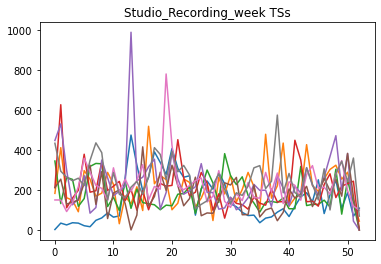

In [5086]:
plt.plot(np.squeeze(tss_studio).T)
plt.title(album_type + " TSs")
plt.show()

In [5087]:
tss_studio_scaled = TimeSeriesScalerMeanVariance().fit_transform(tss_studio)
tss_studio_scaled

array([[[-1.35604229e+00],
        [-1.07419821e+00],
        [-1.15346685e+00],
        [-1.05658295e+00],
        [-1.07419821e+00],
        [-1.18869737e+00],
        [-1.23273550e+00],
        [-9.50891419e-01],
        [-8.45199888e-01],
        [-6.25009198e-01],
        [-8.09969378e-01],
        [-7.57123612e-01],
        [ 9.33940891e-01],
        [ 2.80996557e+00],
        [ 1.48882143e+00],
        [ 3.52637468e-01],
        [ 9.51556146e-01],
        [ 2.07012485e+00],
        [ 1.60332059e+00],
        [ 1.07486293e+00],
        [ 2.21985452e+00],
        [ 1.33909176e+00],
        [ 9.51556146e-01],
        [ 1.01320954e+00],
        [-7.21893101e-01],
        [ 4.40713744e-01],
        [ 7.84211221e-01],
        [ 4.23098489e-01],
        [ 1.14532395e+00],
        [ 6.60904435e-01],
        [-2.19858327e-01],
        [-3.51972741e-01],
        [-5.98586315e-01],
        [-7.39508357e-01],
        [-7.21893101e-01],
        [-1.05658295e+00],
        [-8.54007516e-01],
 

In [5088]:
tss_studio_scaled.shape

(8, 53, 1)

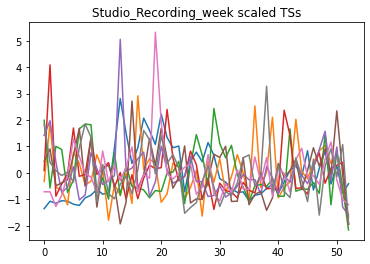

In [5089]:
plt.plot(np.squeeze(tss_studio_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [5090]:
df_tss_studio_scaled = pd.DataFrame(np.squeeze(tss_studio_scaled), columns = df_studio.columns, \
                                    index = df_studio.index)
df_tss_studio_scaled

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -1.356042 -1.074198 -1.153467 -1.056583 -1.074198   
2010_studio        -0.326130  1.883945 -0.538452 -0.654264 -1.214021   
2011_studio         1.988787 -0.573283  1.002450  0.882165 -0.741681   
2012_studio         0.089181  4.084174 -0.883094 -0.421023 -0.035963   
2013_studio         1.414800  1.972080  0.414381 -0.747178 -0.539038   
2014_studio         0.435219  0.904371 -0.491914 -0.380211 -0.268508   
2015_studio        -0.717377 -0.717377 -1.272427 -0.851354 -0.085767   
2016_studio         1.829724  0.391530  0.083345 -0.101565  0.031981   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -1.188697 -1.232736 -0.950891 -0.845200 -0.625009  ...   
2010_studio         0.774082  0.359089 -0.461244 -0.316479  0.687223  ...   
2011_studio        -0.272570  1.664017  1.844445  1.820388 -0.753710  ...   
2012_studio         1.696805 -0.132228 -0.064843  1.330998 -0.055216  ...   
2013_studio         0.233097 -1.029176 -0.841178  0.756806  0.159241  ...   
2014_studio         0.669795  1.686291 -0.503084  1.328842 -1.296174  ...   
2015_studio         1.282719  0.622400 -0.018779 -0.162326 -0.736516  ...   
2016_studio        -0.348113  0.946262  1.850270  1.346902 -1.087756  ...   

                          44        45        46        47        48  \
track_date_created                                                     
2009_studio         0.264561 -0.131782  0.837057 -0.651432  0.167677   
2010_studio         2.028710  0.050258 -0.229621  0.378391  0.831988   
2011_studio        -0.693567 -0.621397 -0.621397 -0.368798 -0.777767   
2012_studio        -0.594299 -0.565420 -0.806082  0.233579  0.753409   
2013_studio         0.501666 -0.089185 -0.411468  0.186098  0.877662   
2014_studio         0.502241 -0.625957  0.100111  0.949052  0.256495   
2015_studio         0.497993  0.928635 -0.152756 -0.104907 -0.439851   
2016_studio         0.566168 -0.286476 -1.087756  0.514804 -1.601396   

                          49        50        51        52        53  
track_date_created                                                    
2009_studio         0.828249 -0.422434  0.273369 -0.765931 -0.413626  
2010_studio         1.034658  0.359089  0.696874 -0.683217 -1.667617  
2011_studio         1.495618 -1.210793  0.834051 -0.561254 -2.161044  
2012_studio        -0.392143  0.156567  0.281711  0.397229 -1.951634  
2013_studio         1.575941 -0.277183  0.978376 -1.297744 -1.593170  
2014_studio         0.904371 -0.045103  2.345338 -0.078613 -1.932880  
2015_studio         0.517132  1.167881 -0.267594 -1.004472 -1.205438  
2016_studio         0.257983  0.905171 -0.142656  1.069536 -1.919854  

[8 rows x 53 columns]

<h3>Euclidean Distance</h3>

k:  2 SSE:  34.16450893174389 Silhouette Score:  0.050146788528697764

k:  3 SSE:  27.51044712883863 Silhouette Score:  0.04673042601756104

k:  4 SSE:  20.754360959624485 Silhouette Score:  0.05405566134793937

k:  5 SSE:  14.178121015889635 Silhouette Score:  0.06433220329199621

k:  6 SSE:  8.705362978095444 Silhouette Score:  0.04846027966638673

k:  7 SSE:  4.199999597716849 Silhouette Score:  0.01677067139069283



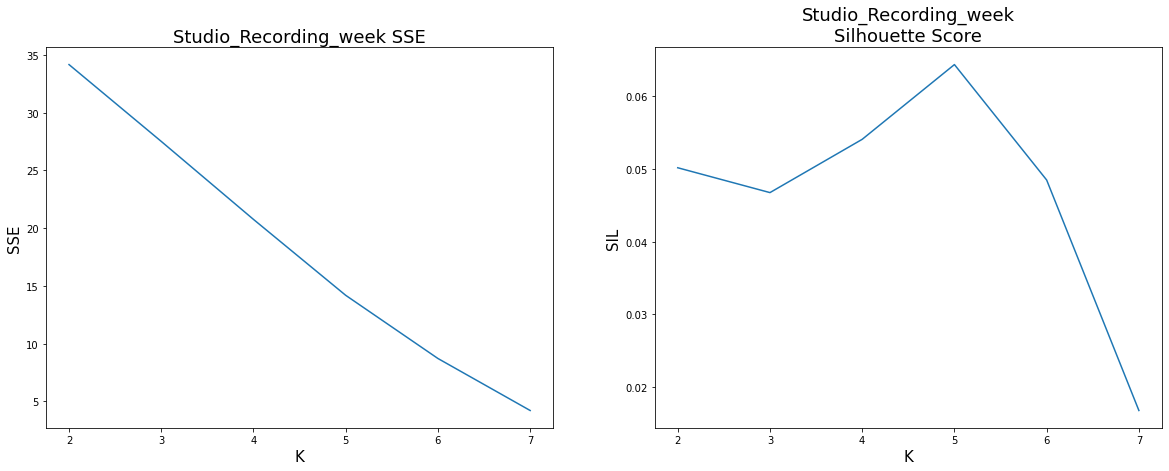

In [5091]:
find_optimal_k_kmeans(7, 'euclidean', tss_studio_scaled, False, album_type)

**We can see that best k is 5**

In [5092]:
cluster_centers_studio_eu, dict_label_studio_eu, labels_studio_eu = run_kmeans(5, 300, 10, 'euclidean', tss_studio_scaled,\
                                                                      False)

cluster_centers_shape (5, 53, 1)

Labels:  {0: 1, 1: 2, 2: 2, 3: 2, 4: 1}

SSE:  14.178121015889635
Silhouette Score:  0.06433220329199621


In [5093]:
cluster_insight(df_tss_studio_scaled, labels_studio_eu)

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -1.356042 -1.074198 -1.153467 -1.056583 -1.074198   
2010_studio        -0.326130  1.883945 -0.538452 -0.654264 -1.214021   
2011_studio         1.988787 -0.573283  1.002450  0.882165 -0.741681   
2012_studio         0.089181  4.084174 -0.883094 -0.421023 -0.035963   
2013_studio         1.414800  1.972080  0.414381 -0.747178 -0.539038   
2014_studio         0.435219  0.904371 -0.491914 -0.380211 -0.268508   
2015_studio        -0.717377 -0.717377 -1.272427 -0.851354 -0.085767   
2016_studio         1.829724  0.391530  0.083345 -0.101565  0.031981   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -1.188697 -1.232736 -0.950891 -0.845200 -0.625009  ...   
2010_studio         0.774082  0.359089 -0.461244 -0.316479  0.687223  ...   
2011_studio        -0.272570  1.664017  1.844445  1.820388 -0.753710  ...   
2012_studio         1.696805 -0.132228 -0.064843  1.330998 -0.055216  ...   
2013_studio         0.233097 -1.029176 -0.841178  0.756806  0.159241  ...   
2014_studio         0.669795  1.686291 -0.503084  1.328842 -1.296174  ...   
2015_studio         1.282719  0.622400 -0.018779 -0.162326 -0.736516  ...   
2016_studio        -0.348113  0.946262  1.850270  1.346902 -1.087756  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_studio        -0.131782  0.837057 -0.651432  0.167677  0.828249   
2010_studio         0.050258 -0.229621  0.378391  0.831988  1.034658   
2011_studio        -0.621397 -0.621397 -0.368798 -0.777767  1.495618   
2012_studio        -0.565420 -0.806082  0.233579  0.753409 -0.392143   
2013_studio        -0.089185 -0.411468  0.186098  0.877662  1.575941   
2014_studio        -0.625957  0.100111  0.949052  0.256495  0.904371   
2015_studio         0.928635 -0.152756 -0.104907 -0.439851  0.517132   
2016_studio        -0.286476 -1.087756  0.514804 -1.601396  0.257983   

                          50        51        52        53  Labels  
track_date_created                                                  
2009_studio        -0.422434  0.273369 -0.765931 -0.413626       2  
2010_studio         0.359089  0.696874 -0.683217 -1.667617       0  
2011_studio        -1.210793  0.834051 -0.561254 -2.161044       4  
2012_studio         0.156567  0.281711  0.397229 -1.951634       1  
2013_studio        -0.277183  0.978376 -1.297744 -1.593170       2  
2014_studio        -0.045103  2.345338 -0.078613 -1.932880       1  
2015_studio         1.167881 -0.267594 -1.004472 -1.205438       3  
2016_studio         0.905171 -0.142656  1.069536 -1.919854       3  

[8 rows x 54 columns]

Cluster 0
 ['2010_studio']

Cluster 1
 ['2012_studio', '2014_studio']

Cluster 2
 ['2009_studio', '2013_studio']

Cluster 3
 ['2015_studio', '2016_studio']

Cluster 4
 ['2011_studio']



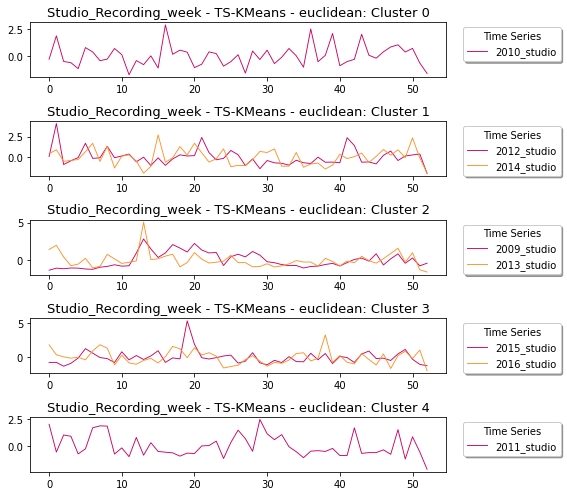

In [5094]:
analyze_clusters(labels_studio_eu, tss_studio_scaled, df_tss_studio_scaled, album_type, 'TS-KMeans - euclidean', False)

**Centroids**

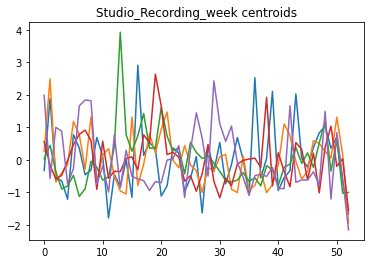

In [5095]:
plot_kmeans_centroids(cluster_centers_studio_eu, album_type)

<h3>DTW distance</h3>

k:  2 SSE:  12.904742607376509 Silhouette Score:  0.05757878132584102

k:  3 SSE:  9.771190067531023 Silhouette Score:  0.040305459200860844

k:  4 SSE:  7.0196227328565595 Silhouette Score:  0.04984360591551246

k:  5 SSE:  4.829073259671269 Silhouette Score:  0.029643948594488854

k:  6 SSE:  3.070406253335476 Silhouette Score:  0.024217788223283875

k:  7 SSE:  1.3083860544888948 Silhouette Score:  0.01466325098521879



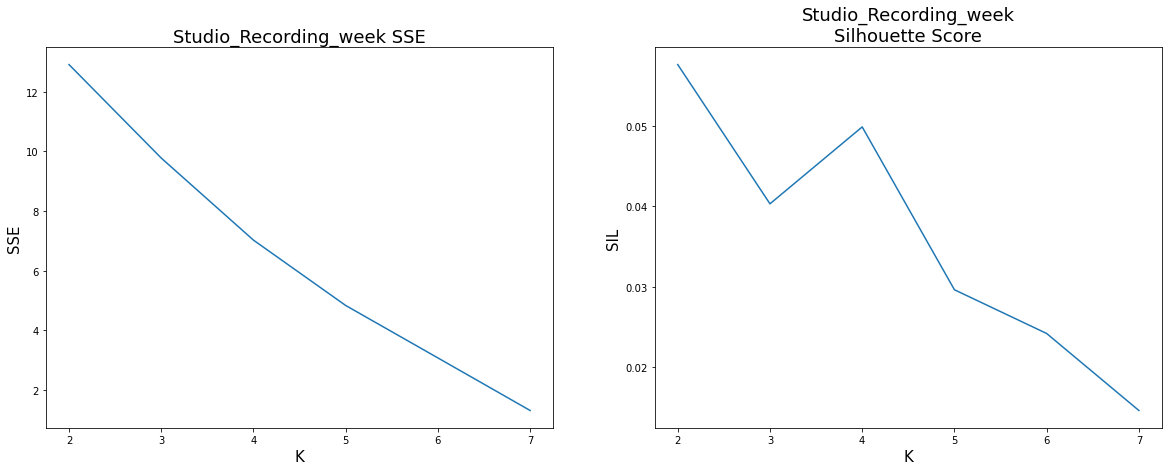

In [5096]:
find_optimal_k_kmeans(7, 'dtw', tss_studio_scaled, False, album_type)

**We can see that best k is 4**

In [5097]:
cluster_centers_studio_dtw, dict_label_studio_dtw, labels_studio_dtw = run_kmeans(4, 300, 10, 'dtw', tss_studio_scaled,\
                                                                      False)

cluster_centers_shape (4, 53, 1)

Labels:  {0: 3, 1: 2, 2: 1, 3: 2}

SSE:  7.0196227328565595
Silhouette Score:  0.04984360591551246


In [5098]:
cluster_insight(df_tss_studio_scaled, labels_studio_dtw)

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -1.356042 -1.074198 -1.153467 -1.056583 -1.074198   
2010_studio        -0.326130  1.883945 -0.538452 -0.654264 -1.214021   
2011_studio         1.988787 -0.573283  1.002450  0.882165 -0.741681   
2012_studio         0.089181  4.084174 -0.883094 -0.421023 -0.035963   
2013_studio         1.414800  1.972080  0.414381 -0.747178 -0.539038   
2014_studio         0.435219  0.904371 -0.491914 -0.380211 -0.268508   
2015_studio        -0.717377 -0.717377 -1.272427 -0.851354 -0.085767   
2016_studio         1.829724  0.391530  0.083345 -0.101565  0.031981   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -1.188697 -1.232736 -0.950891 -0.845200 -0.625009  ...   
2010_studio         0.774082  0.359089 -0.461244 -0.316479  0.687223  ...   
2011_studio        -0.272570  1.664017  1.844445  1.820388 -0.753710  ...   
2012_studio         1.696805 -0.132228 -0.064843  1.330998 -0.055216  ...   
2013_studio         0.233097 -1.029176 -0.841178  0.756806  0.159241  ...   
2014_studio         0.669795  1.686291 -0.503084  1.328842 -1.296174  ...   
2015_studio         1.282719  0.622400 -0.018779 -0.162326 -0.736516  ...   
2016_studio        -0.348113  0.946262  1.850270  1.346902 -1.087756  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_studio        -0.131782  0.837057 -0.651432  0.167677  0.828249   
2010_studio         0.050258 -0.229621  0.378391  0.831988  1.034658   
2011_studio        -0.621397 -0.621397 -0.368798 -0.777767  1.495618   
2012_studio        -0.565420 -0.806082  0.233579  0.753409 -0.392143   
2013_studio        -0.089185 -0.411468  0.186098  0.877662  1.575941   
2014_studio        -0.625957  0.100111  0.949052  0.256495  0.904371   
2015_studio         0.928635 -0.152756 -0.104907 -0.439851  0.517132   
2016_studio        -0.286476 -1.087756  0.514804 -1.601396  0.257983   

                          50        51        52        53  Labels  
track_date_created                                                  
2009_studio        -0.422434  0.273369 -0.765931 -0.413626       2  
2010_studio         0.359089  0.696874 -0.683217 -1.667617       3  
2011_studio        -1.210793  0.834051 -0.561254 -2.161044       0  
2012_studio         0.156567  0.281711  0.397229 -1.951634       0  
2013_studio        -0.277183  0.978376 -1.297744 -1.593170       1  
2014_studio        -0.045103  2.345338 -0.078613 -1.932880       3  
2015_studio         1.167881 -0.267594 -1.004472 -1.205438       1  
2016_studio         0.905171 -0.142656  1.069536 -1.919854       0  

[8 rows x 54 columns]

Cluster 0
 ['2011_studio', '2012_studio', '2016_studio']

Cluster 1
 ['2013_studio', '2015_studio']

Cluster 2
 ['2009_studio']

Cluster 3
 ['2010_studio', '2014_studio']



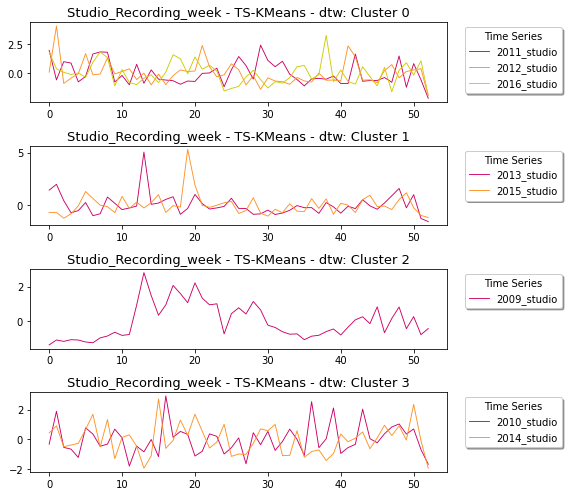

In [5099]:
analyze_clusters(labels_studio_dtw, tss_studio_scaled, df_tss_studio_scaled, album_type, 'TS-KMeans - dtw', False)

**Centroids**

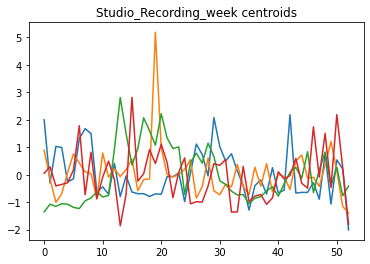

In [5100]:
plot_kmeans_centroids(cluster_centers_studio_dtw, album_type)

<h3>KMeans sklearn</h3>

k:  2 SSE:  273.3160714539511 Silhouette Score:  0.05014678852869783
Calinski-Harabaz:  1.4350099554234828 Davies-Bouldin:  1.932429209583296

k:  3 SSE:  220.08357703070902 Silhouette Score:  0.04673042601756107
Calinski-Harabaz:  1.347227304231896 Davies-Bouldin:  1.4135421036888136

k:  4 SSE:  166.0348876769959 Silhouette Score:  0.05405566134793935
Calinski-Harabaz:  1.3864534411595375 Davies-Bouldin:  1.2160443663720728

k:  5 SSE:  113.4249681271171 Silhouette Score:  0.06433220329199622
Calinski-Harabaz:  1.4894845528631184 Davies-Bouldin:  0.9356373753580047

k:  6 SSE:  69.64290382476355 Silhouette Score:  0.048460279666386726
Calinski-Harabaz:  1.5452641983937372 Davies-Bouldin:  0.6699203580983757

k:  7 SSE:  33.59999678173479 Silhouette Score:  0.01677067139069286
Calinski-Harabaz:  1.5133167219544625 Davies-Bouldin:  0.4536403387143949



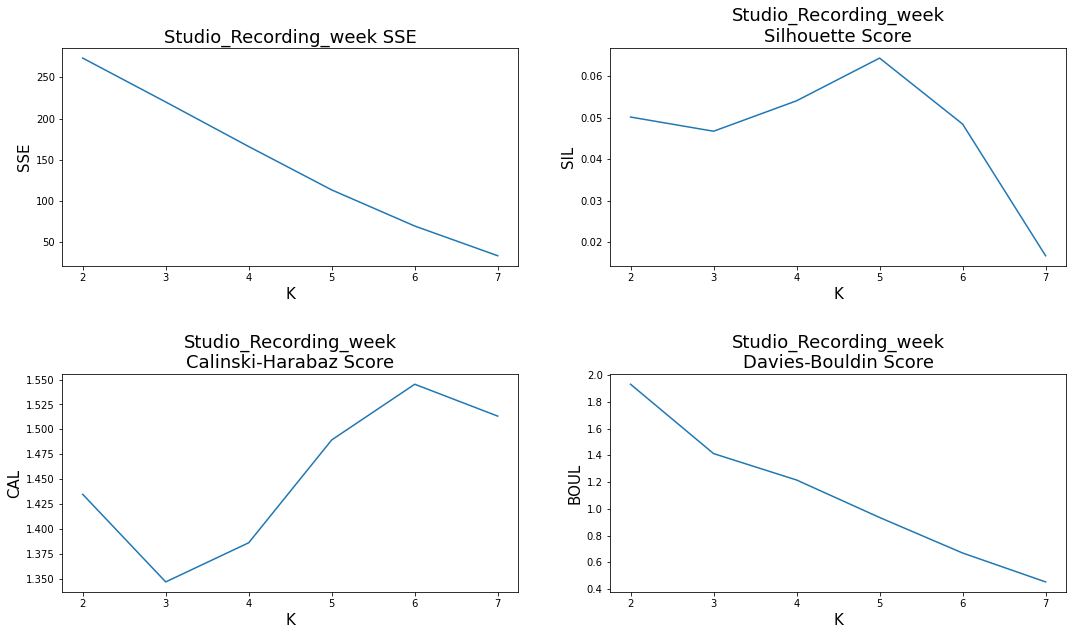

In [5101]:
find_optimal_k_kmeans(7, "", df_tss_studio_scaled, True, album_type)

In [5102]:
cluster_centers_studio_2, dict_label_studio_2, labels_studio_2 = run_kmeans(5, 300, 10, '', df_tss_studio_scaled,\
                                                                      True)

cluster_centers_shape (5, 53)

Labels:  {0: 1, 1: 2, 2: 2, 3: 2, 4: 1}

SSE:  113.4249681271171
Silhouette Score:  0.06433220329199622
Calinski - Harabaz Score:  1.4894845528631184
Davies - Bouldin Score:  0.9356373753580047


In [5103]:
cluster_insight(df_tss_studio_scaled, labels_studio_2)

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -1.356042 -1.074198 -1.153467 -1.056583 -1.074198   
2010_studio        -0.326130  1.883945 -0.538452 -0.654264 -1.214021   
2011_studio         1.988787 -0.573283  1.002450  0.882165 -0.741681   
2012_studio         0.089181  4.084174 -0.883094 -0.421023 -0.035963   
2013_studio         1.414800  1.972080  0.414381 -0.747178 -0.539038   
2014_studio         0.435219  0.904371 -0.491914 -0.380211 -0.268508   
2015_studio        -0.717377 -0.717377 -1.272427 -0.851354 -0.085767   
2016_studio         1.829724  0.391530  0.083345 -0.101565  0.031981   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -1.188697 -1.232736 -0.950891 -0.845200 -0.625009  ...   
2010_studio         0.774082  0.359089 -0.461244 -0.316479  0.687223  ...   
2011_studio        -0.272570  1.664017  1.844445  1.820388 -0.753710  ...   
2012_studio         1.696805 -0.132228 -0.064843  1.330998 -0.055216  ...   
2013_studio         0.233097 -1.029176 -0.841178  0.756806  0.159241  ...   
2014_studio         0.669795  1.686291 -0.503084  1.328842 -1.296174  ...   
2015_studio         1.282719  0.622400 -0.018779 -0.162326 -0.736516  ...   
2016_studio        -0.348113  0.946262  1.850270  1.346902 -1.087756  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_studio        -0.131782  0.837057 -0.651432  0.167677  0.828249   
2010_studio         0.050258 -0.229621  0.378391  0.831988  1.034658   
2011_studio        -0.621397 -0.621397 -0.368798 -0.777767  1.495618   
2012_studio        -0.565420 -0.806082  0.233579  0.753409 -0.392143   
2013_studio        -0.089185 -0.411468  0.186098  0.877662  1.575941   
2014_studio        -0.625957  0.100111  0.949052  0.256495  0.904371   
2015_studio         0.928635 -0.152756 -0.104907 -0.439851  0.517132   
2016_studio        -0.286476 -1.087756  0.514804 -1.601396  0.257983   

                          50        51        52        53  Labels  
track_date_created                                                  
2009_studio        -0.422434  0.273369 -0.765931 -0.413626       2  
2010_studio         0.359089  0.696874 -0.683217 -1.667617       0  
2011_studio        -1.210793  0.834051 -0.561254 -2.161044       4  
2012_studio         0.156567  0.281711  0.397229 -1.951634       1  
2013_studio        -0.277183  0.978376 -1.297744 -1.593170       2  
2014_studio        -0.045103  2.345338 -0.078613 -1.932880       1  
2015_studio         1.167881 -0.267594 -1.004472 -1.205438       3  
2016_studio         0.905171 -0.142656  1.069536 -1.919854       3  

[8 rows x 54 columns]

Cluster 0
 ['2010_studio']

Cluster 1
 ['2012_studio', '2014_studio']

Cluster 2
 ['2009_studio', '2013_studio']

Cluster 3
 ['2015_studio', '2016_studio']

Cluster 4
 ['2011_studio']



<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [5104]:
F = pd.DataFrame()
for ts in tss_studio_scaled:
    F = F.append(pd.DataFrame.from_dict(calculate_features(ts)), ignore_index=True)
F.index = df_tss_studio_scaled.index
F

avg       10p       25p       50p       75p  \
track_date_created                                                         
2009_studio         8.693256e-17 -1.070675 -0.783546 -0.351973  0.828249   
2010_studio         1.173066e-16 -1.109790 -0.654264 -0.007648  0.445948   
2011_studio         1.675808e-17 -0.934137 -0.693567 -0.440969  0.773909   
2012_studio         2.932665e-17 -0.937002 -0.603926 -0.132228  0.281711   
2013_studio        -5.446377e-17 -0.886834 -0.512181 -0.257041  0.233097   
2014_studio        -1.550123e-16 -1.133088 -0.704149 -0.067443  0.580433   
2015_studio         1.173066e-16 -0.843698 -0.717377 -0.152756  0.335305   
2016_studio         8.797994e-17 -1.120629 -0.717934 -0.101565  0.566168   

                         90p       iqr       skw        kur  
track_date_created                                           
2009_studio         1.300338  1.611796  0.773202  -0.211603  
2010_studio         0.994124  1.100212  0.820060   0.802229  
2011_studio         1.630337  1.467476  0.622268  -0.412200  
2012_studio         1.228957  0.885637  1.672794   4.249711  
2013_studio         0.958233  0.745278  2.531218  10.142587  
2014_studio         1.239480  1.284582  0.406073  -0.007321  
2015_studio         0.907582  1.052682  2.891756  12.727507  
2016_studio         1.328411  1.284102  0.661659   0.735953

k:  2 SSE:  20.438918815749016 Silhouette Score:  0.7776768578588322
Calinski-Harabaz:  50.98694328406444 Davies-Bouldin:  0.24225209134837675

k:  3 SSE:  5.467893846570296 Silhouette Score:  0.6413042882801813
Calinski-Harabaz:  86.25686721003723 Davies-Bouldin:  0.1772457979193878

k:  4 SSE:  1.9808193071897668 Silhouette Score:  0.48514294474817693
Calinski-Harabaz:  129.33667142603244 Davies-Bouldin:  0.09872798348321207

k:  5 SSE:  0.5291626608579512 Silhouette Score:  0.30829672440835354
Calinski-Harabaz:  274.39023416075685 Davies-Bouldin:  0.24537755946882572

k:  6 SSE:  0.2164252827279108 Silhouette Score:  0.20408986916565028
Calinski-Harabaz:  358.3847940436819 Davies-Bouldin:  0.19814826599595944

k:  7 SSE:  0.10124542438645935 Silhouette Score:  0.12114387134531729
Calinski-Harabaz:  319.39551338547574 Davies-Bouldin:  0.14030039965257554



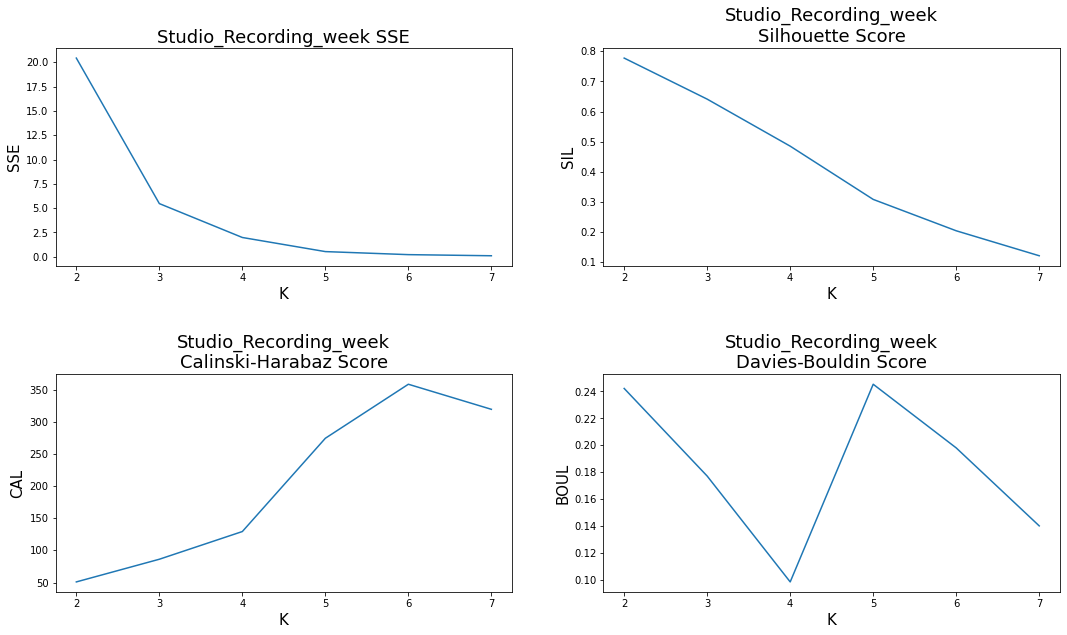

In [5105]:
find_optimal_k_kmeans(7, "", F, True, album_type)

In [5106]:
cluster_centers_studio_fb, dict_label_studio_fb, labels_studio_fb = run_kmeans(3, 300, 10, "", F, True)

cluster_centers_shape (3, 9)

Labels:  {0: 2, 1: 5, 2: 1}

SSE:  5.467893846570296
Silhouette Score:  0.6413042882801813
Calinski - Harabaz Score:  86.25686721003723
Davies - Bouldin Score:  0.1772457979193878


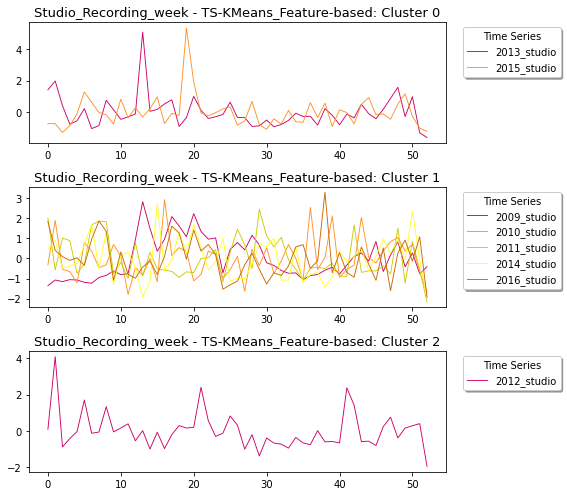

In [5107]:
analyze_clusters(labels_studio_fb, tss_studio_scaled, F, album_type, 'TS-KMeans_Feature-based', False)

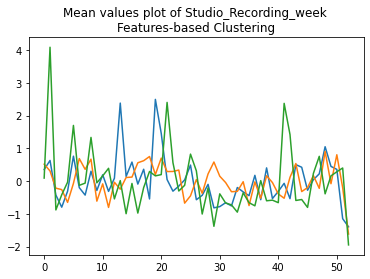

In [5108]:
plot_mean_values(labels_studio_fb, tss_studio_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [5109]:
M = pairwise_distances(tss_studio_scaled.reshape(tss_studio_scaled.shape[0], tss_studio_scaled.shape[1]), \
                       metric=cdm_dist)

In [5110]:
print(tss_studio_scaled.shape, M.shape)

(8, 53, 1) (8, 8)


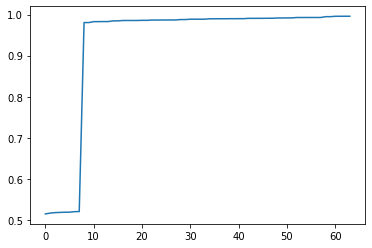

In [5111]:
plt.plot(sorted(M.ravel()))
plt.show()

In [5112]:
dbscan_compression_studio = DBSCAN(eps=0.98, min_samples=5, metric='precomputed')
dbscan_compression_studio.fit(M)

DBSCAN(eps=0.98, metric='precomputed')

In [5113]:
dbscan_compression_studio.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1])

<h2>Approximation-based Clustering</h2>

<h3>PiecewiseAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [5114]:
n_paa_segments = 26
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_studio_scaled)

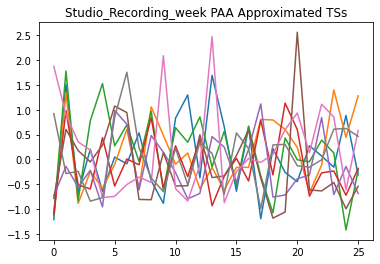

In [5115]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " PAA Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  8.639477909037238 Silhouette Score:  0.13617136707280678

k:  3 SSE:  6.4738142618264565 Silhouette Score:  0.10725490567403784

k:  4 SSE:  4.76820702410834 Silhouette Score:  0.11579240412749195

k:  5 SSE:  3.0884911427677517 Silhouette Score:  0.09377065210525995

k:  6 SSE:  1.7203051724123444 Silhouette Score:  0.08016258964008317

k:  7 SSE:  0.7694295486524501 Silhouette Score:  0.0378735090265582



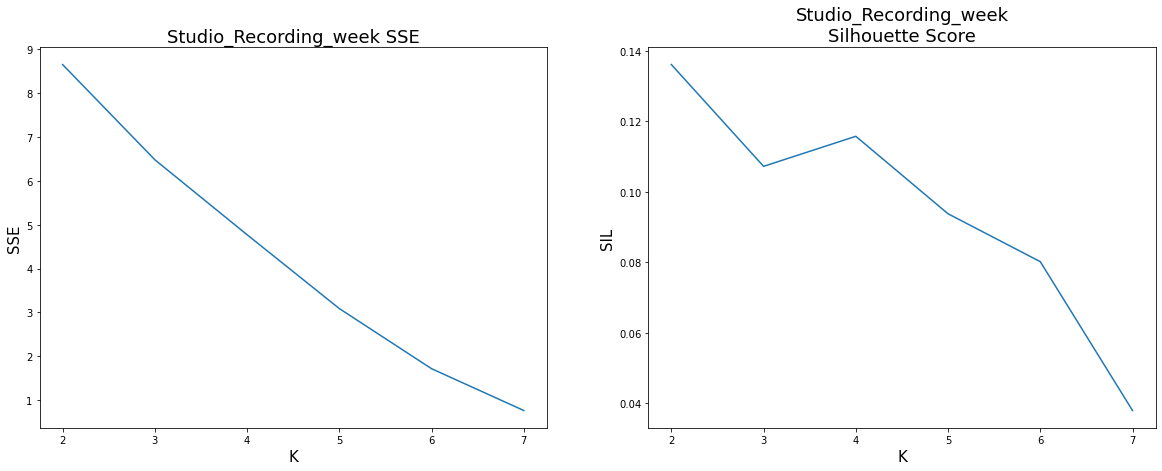

In [5116]:
find_optimal_k_kmeans(7, 'euclidean', X_paa, False, album_type)

In [5117]:
cluster_centers_studio_paa, dict_label_studio_paa, labels_studio_paa = run_kmeans(4, 300, 10, 'euclidean', X_paa,\
                                                                      False)

cluster_centers_shape (4, 26, 1)

Labels:  {0: 2, 1: 2, 2: 3, 3: 1}

SSE:  4.76820702410834
Silhouette Score:  0.11579240412749195


0         1         2         3         4  \
track_date_created                                                     
2009_studio        -1.215120 -1.105025 -1.131448 -1.091813 -0.735105   
2010_studio         0.778907 -0.596358 -0.219970 -0.051077  0.185372   
2011_studio         0.707752  0.942308 -0.507126  1.754231  0.533339   
2012_studio         2.086678 -0.652058  0.830421 -0.098535  0.637891   
2013_studio         1.693440 -0.166399 -0.152970 -0.935177  0.458024   
2014_studio         0.669795 -0.436063  0.200644  0.591603  0.016334   
2015_studio        -0.717377 -1.061891  0.598476  0.301811 -0.449421   
2016_studio         1.110627 -0.009110 -0.158066  1.398266  0.129573   

                           5         6         7         8         9  ...  \
track_date_created                                                    ...   
2009_studio        -0.783546  1.871953  0.920729  1.510840  1.339092  ...   
2010_studio        -0.842458 -0.644613 -0.581882  1.526859  0.436297  ...   
2011_studio        -0.591325 -0.044029 -0.110186 -0.615382 -0.807838  ...   
2012_studio         0.272085 -0.266999 -0.536541 -0.589486  0.223952  ...   
2013_studio        -0.367825  2.472289  0.118956  0.656093 -0.616251  ...   
2014_studio         0.217399 -1.195642  0.803839 -0.335530  0.787083  ...   
2015_studio         0.239607 -0.009209  0.598476 -0.392002  2.560292  ...   
2016_studio        -0.235112 -0.707661 -0.466250  0.853807  0.607259  ...   

                          17        18        19        20        21  \
track_date_created                                                     
2009_studio        -0.889238 -0.827585 -0.514914 -0.558952  0.176485   
2010_studio        -0.538452  0.986403  1.073262 -0.745948  0.846464   
2011_studio        -0.813852 -0.465026 -0.374812 -0.886023  0.485225   
2012_studio        -0.512474 -0.372890 -0.594299  0.854487  0.411669   
2013_studio        -0.163041 -0.532323  0.021600 -0.455110  0.075313   
2014_studio        -0.313189 -0.760001 -1.184471  0.100111  0.290006   
2015_studio        -0.616893  0.134339 -0.157541  0.067350 -0.114477   
2016_studio         0.622668 -0.312158  1.280129 -0.214566 -0.183748   

                          22        23        24        25  Labels  
track_date_created                                                  
2009_studio         0.352637 -0.241877  0.202908 -0.246281       1  
2010_studio        -0.089681  0.605190  0.696874  0.006829       0  
2011_studio        -0.621397 -0.573283  0.142413  0.136399       3  
2012_studio        -0.685751  0.493494 -0.117788  0.339470       2  
2013_studio        -0.250326  0.531880  0.649379 -0.159684       2  
2014_studio        -0.262923  0.602774  0.429634  1.133362       2  
2015_studio         0.387939 -0.272379  0.842507 -0.636033       1  
2016_studio        -0.687116 -0.543296  0.581577  0.463440       0  

[8 rows x 27 columns]


Cluster 0
 ['2010_studio', '2016_studio']

Cluster 1
 ['2009_studio', '2015_studio']

Cluster 2
 ['2012_studio', '2013_studio', '2014_studio']

Cluster 3
 ['2011_studio']




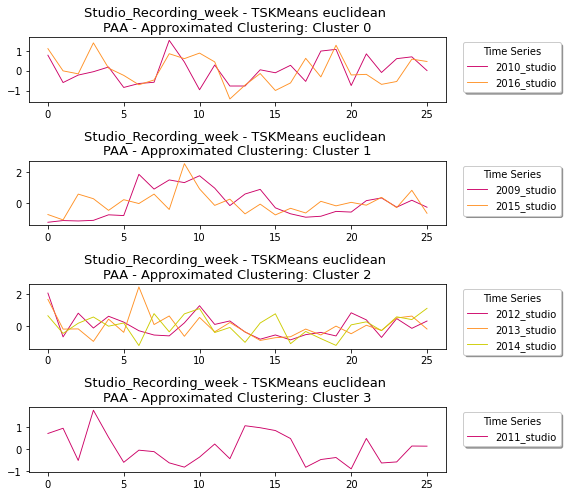

In [5118]:
analyze_approximated_clusters(labels_studio_paa, X_paa, df_tss_studio_scaled, album_type, \
                               'TSKMeans euclidean \nPAA - Approximated Clustering', False)

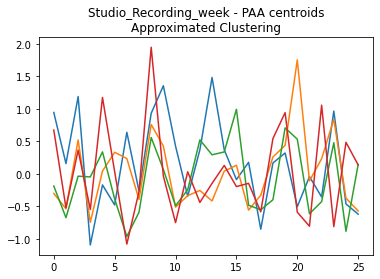

In [5119]:
plot_centroids_approximated(cluster_centers_studio_paa, X_paa, album_type, 'PAA')

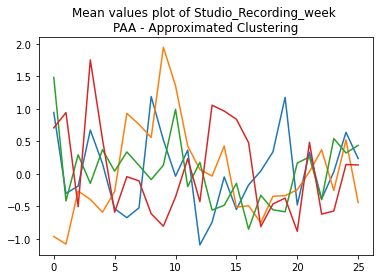

In [5120]:
plot_mean_values_approximated(labels_studio_paa, X_paa, album_type, 'PAA')

<h3>DTW</h3>

k:  2 SSE:  2.9575924290417728 Silhouette Score:  0.24979322676640586

k:  3 SSE:  2.2202528979582725 Silhouette Score:  0.12067171746460029

k:  4 SSE:  1.692406636146723 Silhouette Score:  0.08108822651495456

k:  5 SSE:  1.0243024316171967 Silhouette Score:  0.10120572715248692

k:  6 SSE:  0.6044828524768557 Silhouette Score:  0.05853413227908001

k:  7 SSE:  0.20483323224355268 Silhouette Score:  0.03586454632907597



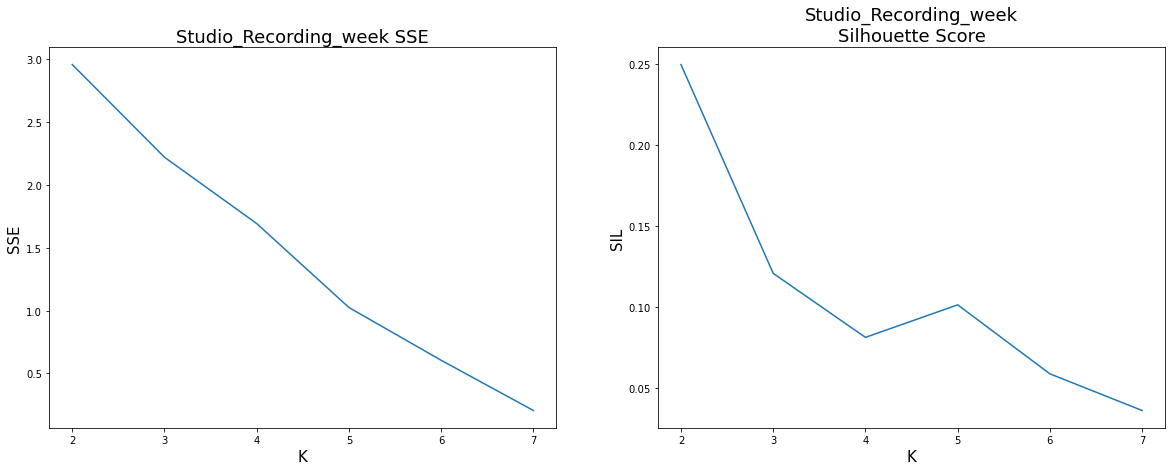

In [5121]:
find_optimal_k_kmeans(7, 'dtw', X_paa, False, album_type)

In [5122]:
cluster_centers_studio_paa_dtw, dict_label_studio_paa_dtw, \
labels_studio_paa_dtw = run_kmeans(3, 300, 10, 'dtw', X_paa, False)

cluster_centers_shape (3, 26, 1)

Labels:  {0: 2, 1: 2, 2: 4}

SSE:  2.2202528979582725
Silhouette Score:  0.12067171746460029


0         1         2         3         4  \
track_date_created                                                     
2009_studio        -1.215120 -1.105025 -1.131448 -1.091813 -0.735105   
2010_studio         0.778907 -0.596358 -0.219970 -0.051077  0.185372   
2011_studio         0.707752  0.942308 -0.507126  1.754231  0.533339   
2012_studio         2.086678 -0.652058  0.830421 -0.098535  0.637891   
2013_studio         1.693440 -0.166399 -0.152970 -0.935177  0.458024   
2014_studio         0.669795 -0.436063  0.200644  0.591603  0.016334   
2015_studio        -0.717377 -1.061891  0.598476  0.301811 -0.449421   
2016_studio         1.110627 -0.009110 -0.158066  1.398266  0.129573   

                           5         6         7         8         9  ...  \
track_date_created                                                    ...   
2009_studio        -0.783546  1.871953  0.920729  1.510840  1.339092  ...   
2010_studio        -0.842458 -0.644613 -0.581882  1.526859  0.436297  ...   
2011_studio        -0.591325 -0.044029 -0.110186 -0.615382 -0.807838  ...   
2012_studio         0.272085 -0.266999 -0.536541 -0.589486  0.223952  ...   
2013_studio        -0.367825  2.472289  0.118956  0.656093 -0.616251  ...   
2014_studio         0.217399 -1.195642  0.803839 -0.335530  0.787083  ...   
2015_studio         0.239607 -0.009209  0.598476 -0.392002  2.560292  ...   
2016_studio        -0.235112 -0.707661 -0.466250  0.853807  0.607259  ...   

                          17        18        19        20        21  \
track_date_created                                                     
2009_studio        -0.889238 -0.827585 -0.514914 -0.558952  0.176485   
2010_studio        -0.538452  0.986403  1.073262 -0.745948  0.846464   
2011_studio        -0.813852 -0.465026 -0.374812 -0.886023  0.485225   
2012_studio        -0.512474 -0.372890 -0.594299  0.854487  0.411669   
2013_studio        -0.163041 -0.532323  0.021600 -0.455110  0.075313   
2014_studio        -0.313189 -0.760001 -1.184471  0.100111  0.290006   
2015_studio        -0.616893  0.134339 -0.157541  0.067350 -0.114477   
2016_studio         0.622668 -0.312158  1.280129 -0.214566 -0.183748   

                          22        23        24        25  Labels  
track_date_created                                                  
2009_studio         0.352637 -0.241877  0.202908 -0.246281       1  
2010_studio        -0.089681  0.605190  0.696874  0.006829       2  
2011_studio        -0.621397 -0.573283  0.142413  0.136399       2  
2012_studio        -0.685751  0.493494 -0.117788  0.339470       0  
2013_studio        -0.250326  0.531880  0.649379 -0.159684       0  
2014_studio        -0.262923  0.602774  0.429634  1.133362       2  
2015_studio         0.387939 -0.272379  0.842507 -0.636033       1  
2016_studio        -0.687116 -0.543296  0.581577  0.463440       2  

[8 rows x 27 columns]


Cluster 0
 ['2012_studio', '2013_studio']

Cluster 1
 ['2009_studio', '2015_studio']

Cluster 2
 ['2010_studio', '2011_studio', '2014_studio', '2016_studio']




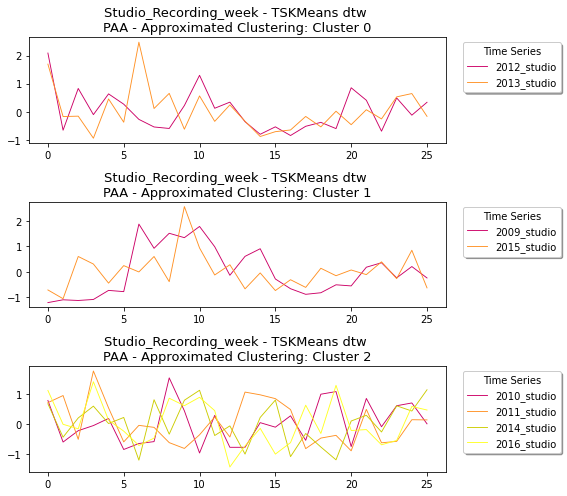

In [5123]:
analyze_approximated_clusters(labels_studio_paa_dtw, X_paa, df_tss_studio_scaled, album_type, \
                               'TSKMeans dtw \nPAA - Approximated Clustering', False)

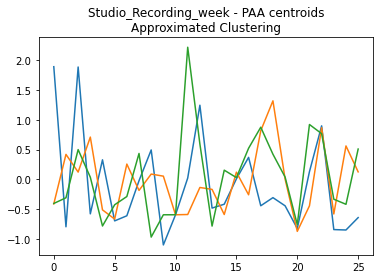

In [5124]:
plot_centroids_approximated(cluster_centers_studio_paa_dtw, X_paa, album_type, 'PAA')

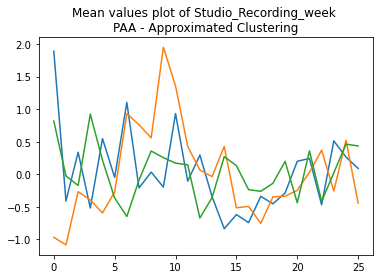

In [5125]:
plot_mean_values_approximated(labels_studio_paa_dtw, X_paa, album_type, 'PAA')

<h3>OneD_SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [5126]:
n_sax1d_segments = 26
n_sax_symbols_avg = 10
#n_sax_symbols_slope = 4

one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_sax1d_segments,\
     alphabet_size_avg=n_sax_symbols_avg)

X_sax1d = one_d_sax.fit_transform(tss_studio_scaled)
X_sax1d.shape

(8, 26, 2)

<h3>EUCLIDEAN</h3>

k:  2 SSE:  166.03125 Silhouette Score:  0.05569449874990281

k:  3 SSE:  132.79166666666669 Silhouette Score:  0.04730981757535896

k:  4 SSE:  100.55000000000001 Silhouette Score:  0.04620468515999489

k:  5 SSE:  69.1875 Silhouette Score:  0.0521084201331492

k:  6 SSE:  41.0625 Silhouette Score:  0.042530759829593694

k:  7 SSE:  19.937499999999996 Silhouette Score:  0.015837378716867634



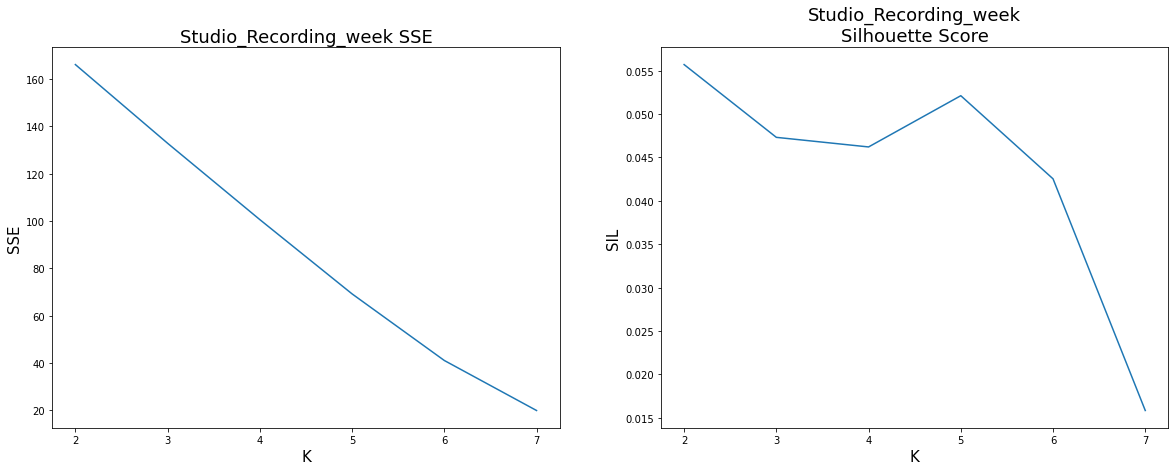

In [5127]:
find_optimal_k_kmeans(7, 'euclidean', X_sax1d, False, album_type)

In [5128]:
cluster_centers_studio_sax1d, dict_label_studio_sax1d, \
labels_studio_sax1d = run_kmeans(5, 1000, 10, 'euclidean', X_sax1d, False)

cluster_centers_shape (5, 26, 2)

Labels:  {0: 1, 1: 2, 2: 1, 3: 2, 4: 2}

SSE:  69.1875
Silhouette Score:  0.0521084201331492


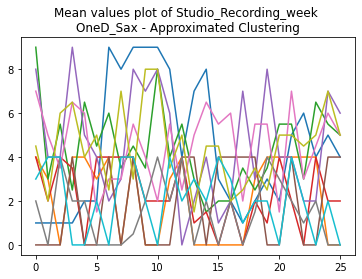

In [5129]:
plot_mean_values_approximated(labels_studio_sax1d, X_sax1d, album_type, 'OneD_Sax')

<h3>DTW</h3>

k:  2 SSE:  99.90019841269842 Silhouette Score:  0.038588756801276006

k:  3 SSE:  78.37336309523809 Silhouette Score:  0.07803731342237336

k:  4 SSE:  58.41815476190476 Silhouette Score:  0.03948487652963198

k:  5 SSE:  41.55863095238095 Silhouette Score:  0.03392397709524586

k:  6 SSE:  24.78333333333333 Silhouette Score:  0.033461209420700244

k:  7 SSE:  12.208333333333332 Silhouette Score:  0.013762979863857046



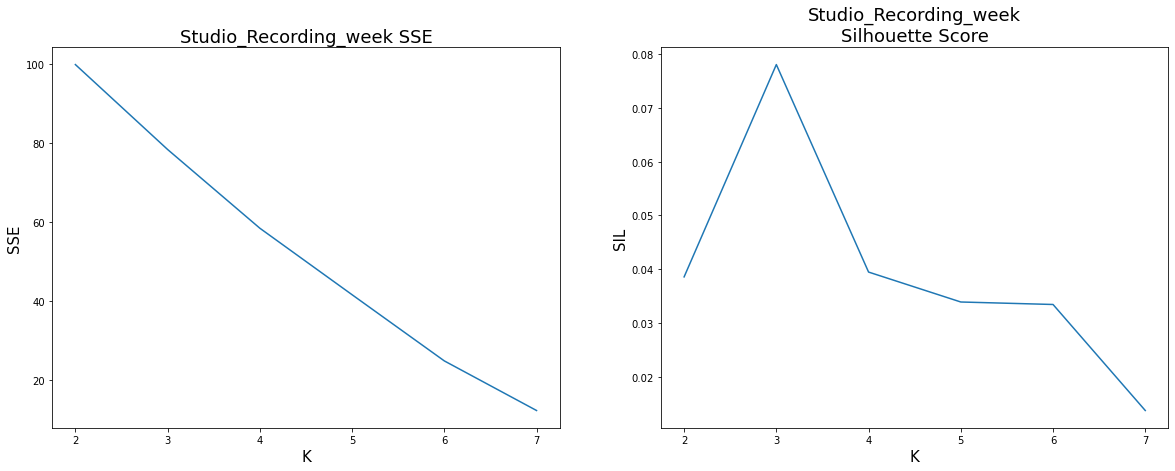

In [5130]:
find_optimal_k_kmeans(7, 'dtw', X_sax1d, False, album_type)

In [5131]:
cluster_centers_studio_sax1d_dtw, dict_label_studio_sax1d_dtw, \
labels_studio_sax1d_dtw = run_kmeans(3, 300, 10, 'dtw', X_sax1d, False)

cluster_centers_shape (3, 26, 2)

Labels:  {0: 2, 1: 2, 2: 4}

SSE:  78.37336309523809
Silhouette Score:  0.07803731342237336


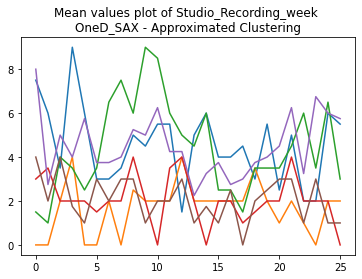

In [5132]:
plot_mean_values_approximated(labels_studio_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

<h3>SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [5133]:
n_sax_segments = 26
n_sax_symbols = 10

sax = SymbolicAggregateApproximation(n_segments=n_sax_segments, \
                                     alphabet_size_avg=n_sax_symbols)

X_sax = sax.fit_transform(tss_studio_scaled)

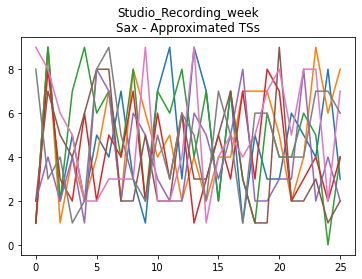

In [5134]:
plt.plot(X_sax.reshape(X_sax.shape[1], X_sax.shape[0]))
plt.title(album_type + "\nSax - Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  95.7142857142857 Silhouette Score:  0.12637858925356354

k:  3 SSE:  70.51041666666666 Silhouette Score:  0.0762874846586746

k:  4 SSE:  50.65625 Silhouette Score:  0.07937051233078085

k:  5 SSE:  34.72916666666667 Silhouette Score:  0.05497305002251086

k:  6 SSE:  20.916666666666668 Silhouette Score:  0.039119690375977303

k:  7 SSE:  7.875 Silhouette Score:  0.0381697187936867



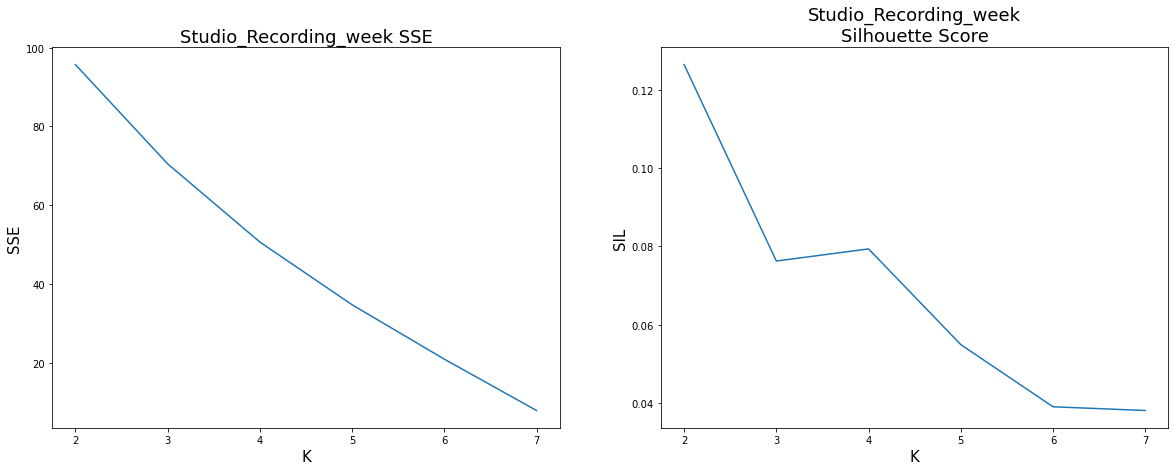

In [5135]:
find_optimal_k_kmeans(7, 'euclidean', X_sax, False, album_type)

In [5136]:
cluster_centers_studio_sax, dict_label_studio_sax, \
labels_studio_sax = run_kmeans(4, 1000, 10, 'euclidean', X_sax, False)

cluster_centers_shape (4, 26, 1)

Labels:  {0: 1, 1: 4, 2: 2, 3: 1}

SSE:  50.65625
Silhouette Score:  0.07937051233078085


0  1  2  3  4  5  6  7  8  9  ...  17  18  19  20  21  22  \
track_date_created                                ...                           
2009_studio         1  1  1  1  2  2  9  8  9  9  ...   1   2   3   2   5   6   
2010_studio         7  2  4  4  5  1  2  2  9  6  ...   2   8   8   2   8   4   
2011_studio         7  8  3  9  7  2  4  4  2  2  ...   2   3   3   1   6   2   
2012_studio         9  2  7  4  7  6  3  2  2  5  ...   3   3   2   8   6   2   
2013_studio         9  4  4  1  6  3  9  5  7  2  ...   4   2   5   3   5   4   
2014_studio         7  3  5  7  5  5  1  7  3  7  ...   3   2   1   5   6   3   
2015_studio         2  1  7  6  3  5  4  7  3  9  ...   2   5   4   5   4   6   
2016_studio         8  4  4  9  5  4  2  3  8  7  ...   7   3   8   4   4   2   

                    23  24  25  Labels  
track_date_created                      
2009_studio          4   5   4       0  
2010_studio          7   7   5       2  
2011_studio          2   5   5       3  
2012_studio          6   4   6       1  
2013_studio          7   7   4       1  
2014_studio          7   6   8       1  
2015_studio          3   8   2       1  
2016_studio          2   7   6       2  

[8 rows x 27 columns]


Cluster 0
 ['2009_studio']

Cluster 1
 ['2012_studio', '2013_studio', '2014_studio', '2015_studio']

Cluster 2
 ['2010_studio', '2016_studio']

Cluster 3
 ['2011_studio']




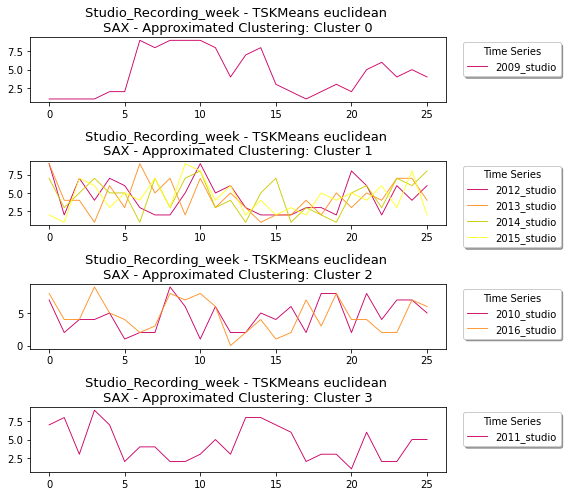

In [5137]:
analyze_approximated_clusters(labels_studio_sax, X_sax, df_tss_studio_scaled, \
                              album_type, \
                              'TSKMeans euclidean \nSAX - Approximated Clustering', False)

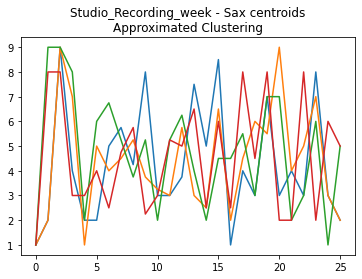

In [5138]:
plot_centroids_approximated(cluster_centers_studio_sax, X_sax, album_type, 'Sax')

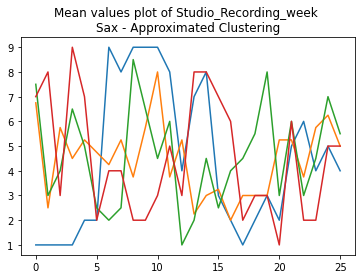

In [5139]:
plot_mean_values_approximated(labels_studio_sax, X_sax, album_type, 'Sax')

<h3>DTW</h3>

k:  2 SSE:  26.74663102420456 Silhouette Score:  0.27217463007845466

k:  3 SSE:  22.05377747252747 Silhouette Score:  0.06804823693340833

k:  4 SSE:  15.303124999999998 Silhouette Score:  0.08402874945995917

k:  5 SSE:  11.830059523809524 Silhouette Score:  0.044103054861206484

k:  6 SSE:  6.583333333333334 Silhouette Score:  0.062047772532683815

k:  7 SSE:  2.822916666666667 Silhouette Score:  0.019301636708577298



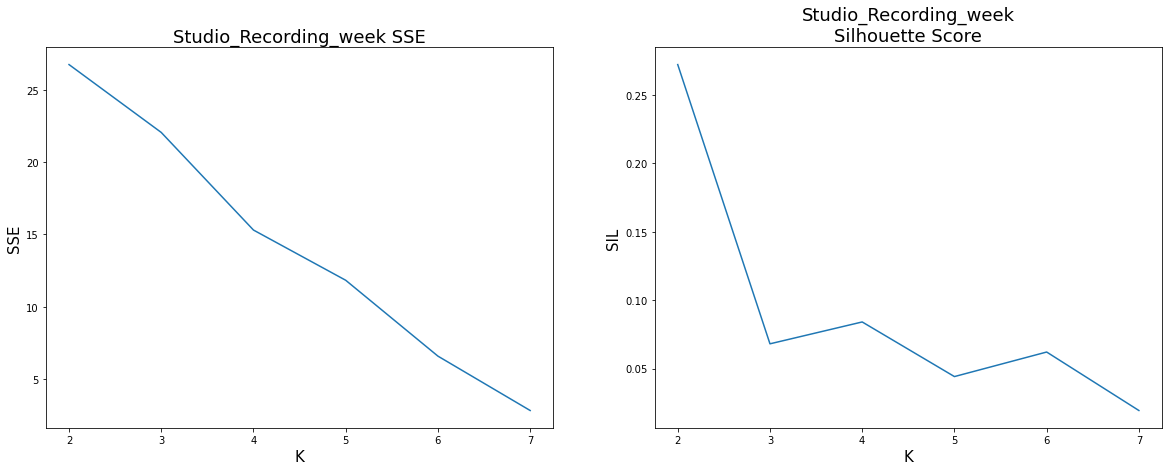

In [5140]:
find_optimal_k_kmeans(7, 'dtw', X_sax, False, album_type)

In [5141]:
cluster_centers_studio_sax_dtw, dict_label_studio_sax_dtw, \
labels_studio_sax_dtw = run_kmeans(4, 300, 10, 'dtw', X_sax, False)

cluster_centers_shape (4, 26, 1)

Labels:  {0: 2, 1: 2, 2: 2, 3: 2}

SSE:  15.303124999999998
Silhouette Score:  0.08402874945995917


0  1  2  3  4  5  6  7  8  9  ...  17  18  19  20  21  22  \
track_date_created                                ...                           
2009_studio         1  1  1  1  2  2  9  8  9  9  ...   1   2   3   2   5   6   
2010_studio         7  2  4  4  5  1  2  2  9  6  ...   2   8   8   2   8   4   
2011_studio         7  8  3  9  7  2  4  4  2  2  ...   2   3   3   1   6   2   
2012_studio         9  2  7  4  7  6  3  2  2  5  ...   3   3   2   8   6   2   
2013_studio         9  4  4  1  6  3  9  5  7  2  ...   4   2   5   3   5   4   
2014_studio         7  3  5  7  5  5  1  7  3  7  ...   3   2   1   5   6   3   
2015_studio         2  1  7  6  3  5  4  7  3  9  ...   2   5   4   5   4   6   
2016_studio         8  4  4  9  5  4  2  3  8  7  ...   7   3   8   4   4   2   

                    23  24  25  Labels  
track_date_created                      
2009_studio          4   5   4       1  
2010_studio          7   7   5       0  
2011_studio          2   5   5       2  
2012_studio          6   4   6       3  
2013_studio          7   7   4       3  
2014_studio          7   6   8       0  
2015_studio          3   8   2       1  
2016_studio          2   7   6       2  

[8 rows x 27 columns]


Cluster 0
 ['2010_studio', '2014_studio']

Cluster 1
 ['2009_studio', '2015_studio']

Cluster 2
 ['2011_studio', '2016_studio']

Cluster 3
 ['2012_studio', '2013_studio']




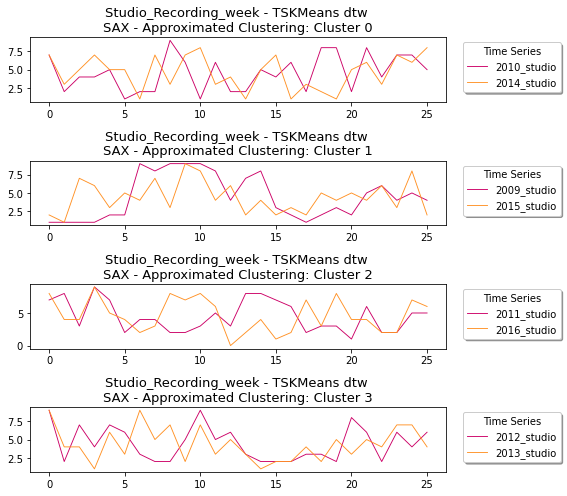

In [5142]:
analyze_approximated_clusters(labels_studio_sax_dtw, X_sax, df_tss_studio_scaled, album_type, \
                               'TSKMeans dtw \nSAX - Approximated Clustering', False)

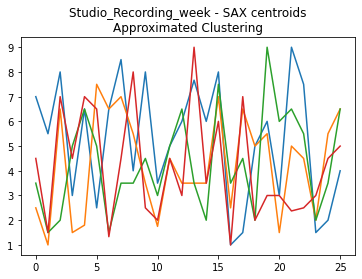

In [5143]:
plot_centroids_approximated(cluster_centers_studio_sax_dtw, X_sax, album_type, 'SAX')

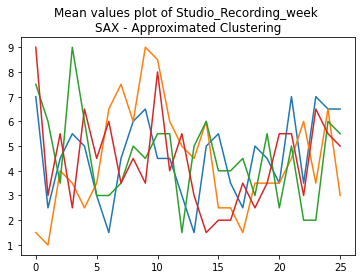

In [5144]:
plot_mean_values_approximated(labels_studio_sax_dtw, X_sax, album_type, 'SAX')

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<h1>Live_Recording</h1>

In [5145]:
album_type = "Live_Recording_week"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [5146]:
df_live

1   2   3   4   5   6    7    8   9  10  ...  44  45  \
track_date_created                                             ...           
2009_live           128  12  22  98  15  13   19  100  73  64  ...  37  24   
2010_live            23  48  35  54  54  39   26   29  11  12  ...  30   8   
2011_live             2  29  21  20   6   1   71   14  22   4  ...  62  36   
2012_live             8   6  14   2  72  17  106   20   6   0  ...   0   3   
2013_live            17   6   1  17   0   2   26   46  18   0  ...   8  25   
2014_live            21  14  17   5  55  17   36   43  11   0  ...   0  10   
2015_live             0  19  14  11  18  10   12   18  25  12  ...   0   7   
2016_live            23  21   6   9  23  30    7    7  51   1  ...  36   7   

                    46  47  48  49  50   51  52  53  
track_date_created                                   
2009_live           23  47   9  34  20  114  22   9  
2010_live           28   2  13  16  29    2   1   2  
2011_live           48  18  29  23  96   32   5   0  
2012_live            8   7  22  21  21   25   0   0  
2013_live           13   1   1  28  23   37   0   0  
2014_live            0   0   1  10   5    4   0   0  
2015_live           15   5   0   5   8   52   0  28  
2016_live           30   0   3  20  10   49   2   0  

[8 rows x 53 columns]

In [5147]:
df_live.shape

(8, 53)

In [5148]:
tss_live = to_time_series_dataset(df_live.values)
tss_live

array([[[128.],
        [ 12.],
        [ 22.],
        [ 98.],
        [ 15.],
        [ 13.],
        [ 19.],
        [100.],
        [ 73.],
        [ 64.],
        [ 74.],
        [ 75.],
        [113.],
        [123.],
        [ 66.],
        [ 43.],
        [105.],
        [ 51.],
        [ 66.],
        [ 47.],
        [  5.],
        [ 66.],
        [101.],
        [ 21.],
        [ 63.],
        [ 38.],
        [ 32.],
        [116.],
        [ 28.],
        [ 21.],
        [ 48.],
        [ 43.],
        [ 35.],
        [ 13.],
        [ 29.],
        [ 71.],
        [ 25.],
        [ 19.],
        [ 23.],
        [ 17.],
        [ 28.],
        [ 38.],
        [ 57.],
        [ 37.],
        [ 24.],
        [ 23.],
        [ 47.],
        [  9.],
        [ 34.],
        [ 20.],
        [114.],
        [ 22.],
        [  9.]],

       [[ 23.],
        [ 48.],
        [ 35.],
        [ 54.],
        [ 54.],
        [ 39.],
        [ 26.],
        [ 29.],
        [ 11.],
      

In [5149]:
tss_live.shape

(8, 53, 1)

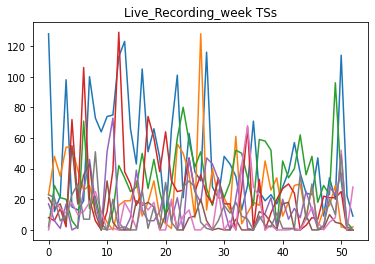

In [5150]:
plt.plot(np.squeeze(tss_live).T)
plt.title(album_type + " TSs")
plt.show()

In [5151]:
tss_live_scaled = TimeSeriesScalerMeanVariance().fit_transform(tss_live)
tss_live_scaled

array([[[ 2.33568099e+00],
        [-1.08249723e+00],
        [-7.87826698e-01],
        [ 1.45166938e+00],
        [-9.94096073e-01],
        [-1.05303018e+00],
        [-8.76227859e-01],
        [ 1.51060348e+00],
        [ 7.14993037e-01],
        [ 4.49789554e-01],
        [ 7.44460091e-01],
        [ 7.73927144e-01],
        [ 1.89367518e+00],
        [ 2.18834572e+00],
        [ 5.08723662e-01],
        [-1.69018572e-01],
        [ 1.65793875e+00],
        [ 6.67178573e-02],
        [ 5.08723662e-01],
        [-5.11503572e-02],
        [-1.28876661e+00],
        [ 5.08723662e-01],
        [ 1.54007054e+00],
        [-8.17293751e-01],
        [ 4.20322501e-01],
        [-3.16353840e-01],
        [-4.93156162e-01],
        [ 1.98207634e+00],
        [-6.11024376e-01],
        [-8.17293751e-01],
        [-2.16833036e-02],
        [-1.69018572e-01],
        [-4.04755001e-01],
        [-1.05303018e+00],
        [-5.81557322e-01],
        [ 6.56058930e-01],
        [-6.99425537e-01],
 

In [5152]:
tss_live_scaled.shape

(8, 53, 1)

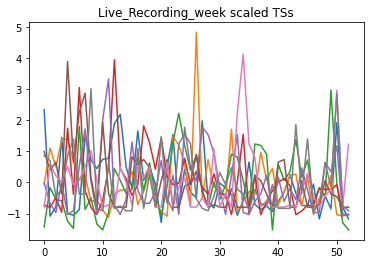

In [5153]:
plt.plot(np.squeeze(tss_live_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [5154]:
df_tss_live_scaled = pd.DataFrame(np.squeeze(tss_live_scaled), columns = df_live.columns, \
                                    index = df_live.index)
df_tss_live_scaled

1         2         3         4         5  \
track_date_created                                                     
2009_live           2.335681 -1.082497 -0.787827  1.451669 -0.994096   
2010_live          -0.057063  1.106154  0.501281  1.385326  1.385326   
2011_live          -1.431474 -0.167005 -0.541663 -0.588495 -1.244145   
2012_live          -0.725356 -0.802475 -0.493999 -0.956713  1.742455   
2013_live          -0.012387 -0.668907 -0.967325 -0.012387 -1.027009   
2014_live           0.993420  0.397047  0.652635 -0.369719  3.890092   
2015_live          -0.791993  0.580704  0.219468  0.002726  0.508457   
2016_live           0.859194  0.705352 -0.448464 -0.217701  0.859194   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live          -1.053030 -0.876228  1.510603  0.714993  0.449790  ...   
2010_live           0.687396  0.082523  0.222109 -0.615408 -0.568879  ...   
2011_live          -1.478306  1.799946 -0.869488 -0.494831 -1.337810  ...   
2012_live          -0.378320  3.053479 -0.262641 -0.802475 -1.033832  ...   
2013_live          -0.907642  0.524765  1.718438  0.047296 -1.027009  ...   
2014_live           0.652635  2.271364  2.867737  0.141458 -0.795701  ...   
2015_live          -0.069521  0.074974  0.508457  1.014187  0.074974  ...   
2016_live           1.397641 -0.371543 -0.371543  3.012983 -0.833070  ...   

                          44        45        46        47        48  \
track_date_created                                                     
2009_live          -0.345821 -0.728893 -0.758360 -0.051150 -1.170898   
2010_live           0.268637 -0.754994  0.175580 -1.034166 -0.522350   
2011_live           1.378457  0.160820  0.722806 -0.682159 -0.167005   
2012_live          -1.033832 -0.918154 -0.725356 -0.763915 -0.185522   
2013_live          -0.549540  0.465082 -0.251122 -0.967325 -0.967325   
2014_live          -0.795701  0.056262 -0.795701 -0.795701 -0.710504   
2015_live          -0.791993 -0.286262  0.291715 -0.430757 -0.791993   
2016_live           1.859167 -0.371543  1.397641 -0.909991 -0.679227   

                          49        50        51        52        53  
track_date_created                                                    
2009_live          -0.434222 -0.846761  1.923142 -0.787827 -1.170898  
2010_live          -0.382764  0.222109 -1.034166 -1.080695 -1.034166  
2011_live          -0.447998  2.970751 -0.026509 -1.290978 -1.525139  
2012_live          -0.224082 -0.224082 -0.069844 -1.033832 -1.033832  
2013_live           0.644133  0.345715  1.181285 -1.027009 -1.027009  
2014_live           0.056262 -0.369719 -0.454916 -0.795701 -0.795701  
2015_live          -0.430757 -0.214015  2.964861 -0.791993  1.230929  
2016_live           0.628430 -0.140780  2.859141 -0.756148 -0.909991  

[8 rows x 53 columns]

<h3>Euclidean Distance</h3>

k:  2 SSE:  35.92792090889653 Silhouette Score:  0.04509147737487555

k:  3 SSE:  27.974867913287888 Silhouette Score:  0.05892732755083752

k:  4 SSE:  20.021953130238977 Silhouette Score:  0.09692535455749948

k:  5 SSE:  14.790912354621238 Silhouette Score:  0.06999200876942496

k:  6 SSE:  9.588680384301462 Silhouette Score:  0.04674122147375998

k:  7 SSE:  4.754237583251367 Silhouette Score:  0.013090639398713797



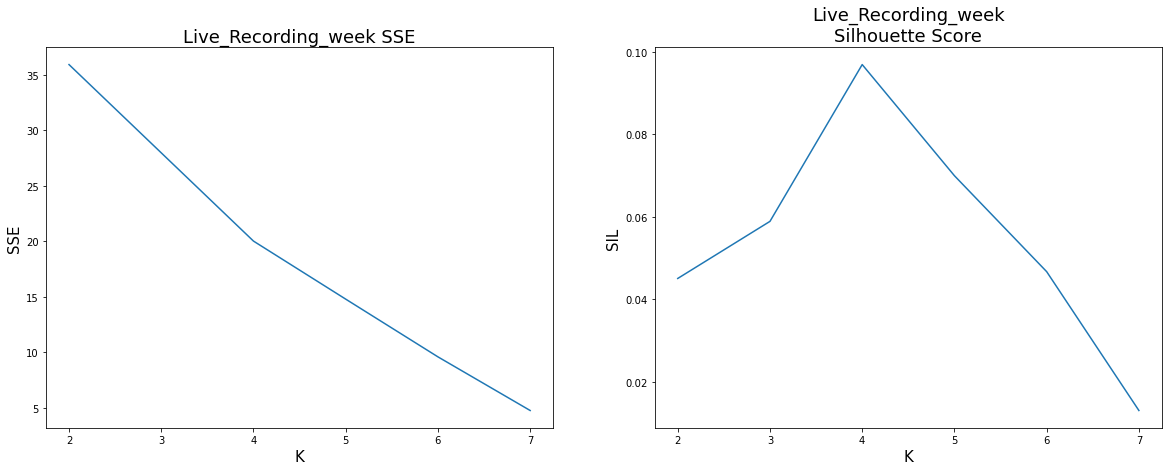

In [5155]:
find_optimal_k_kmeans(7, 'euclidean', tss_live_scaled, False, album_type)

**We can see that best k is 4**

In [5156]:
cluster_centers_live_eu, dict_label_live_eu, labels_live_eu = run_kmeans(4, 300, 10, 'euclidean', tss_live_scaled,\
                                                                      False)

cluster_centers_shape (4, 53, 1)

Labels:  {0: 2, 1: 2, 2: 2, 3: 2}

SSE:  20.021953130238977
Silhouette Score:  0.09692535455749948


In [5157]:
cluster_insight(df_tss_live_scaled, labels_live_eu)

1         2         3         4         5  \
track_date_created                                                     
2009_live           2.335681 -1.082497 -0.787827  1.451669 -0.994096   
2010_live          -0.057063  1.106154  0.501281  1.385326  1.385326   
2011_live          -1.431474 -0.167005 -0.541663 -0.588495 -1.244145   
2012_live          -0.725356 -0.802475 -0.493999 -0.956713  1.742455   
2013_live          -0.012387 -0.668907 -0.967325 -0.012387 -1.027009   
2014_live           0.993420  0.397047  0.652635 -0.369719  3.890092   
2015_live          -0.791993  0.580704  0.219468  0.002726  0.508457   
2016_live           0.859194  0.705352 -0.448464 -0.217701  0.859194   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live          -1.053030 -0.876228  1.510603  0.714993  0.449790  ...   
2010_live           0.687396  0.082523  0.222109 -0.615408 -0.568879  ...   
2011_live          -1.478306  1.799946 -0.869488 -0.494831 -1.337810  ...   
2012_live          -0.378320  3.053479 -0.262641 -0.802475 -1.033832  ...   
2013_live          -0.907642  0.524765  1.718438  0.047296 -1.027009  ...   
2014_live           0.652635  2.271364  2.867737  0.141458 -0.795701  ...   
2015_live          -0.069521  0.074974  0.508457  1.014187  0.074974  ...   
2016_live           1.397641 -0.371543 -0.371543  3.012983 -0.833070  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_live          -0.728893 -0.758360 -0.051150 -1.170898 -0.434222   
2010_live          -0.754994  0.175580 -1.034166 -0.522350 -0.382764   
2011_live           0.160820  0.722806 -0.682159 -0.167005 -0.447998   
2012_live          -0.918154 -0.725356 -0.763915 -0.185522 -0.224082   
2013_live           0.465082 -0.251122 -0.967325 -0.967325  0.644133   
2014_live           0.056262 -0.795701 -0.795701 -0.710504  0.056262   
2015_live          -0.286262  0.291715 -0.430757 -0.791993 -0.430757   
2016_live          -0.371543  1.397641 -0.909991 -0.679227  0.628430   

                          50        51        52        53  Labels  
track_date_created                                                  
2009_live          -0.846761  1.923142 -0.787827 -1.170898       0  
2010_live           0.222109 -1.034166 -1.080695 -1.034166       3  
2011_live           2.970751 -0.026509 -1.290978 -1.525139       3  
2012_live          -0.224082 -0.069844 -1.033832 -1.033832       1  
2013_live           0.345715  1.181285 -1.027009 -1.027009       0  
2014_live          -0.369719 -0.454916 -0.795701 -0.795701       1  
2015_live          -0.214015  2.964861 -0.791993  1.230929       2  
2016_live          -0.140780  2.859141 -0.756148 -0.909991       2  

[8 rows x 54 columns]

Cluster 0
 ['2009_live', '2013_live']

Cluster 1
 ['2012_live', '2014_live']

Cluster 2
 ['2015_live', '2016_live']

Cluster 3
 ['2010_live', '2011_live']



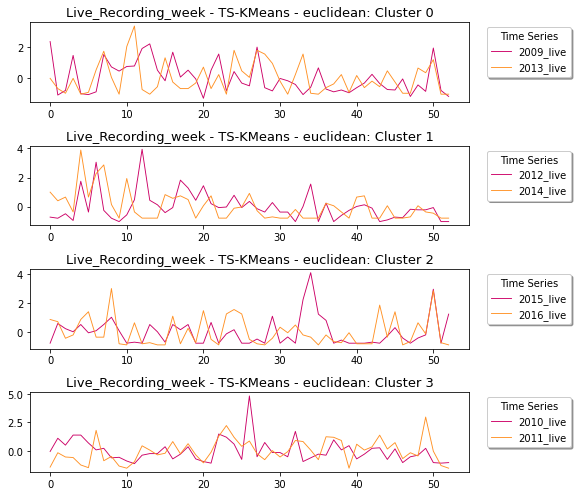

In [5158]:
analyze_clusters(labels_live_eu, tss_live_scaled, df_tss_live_scaled, album_type, 'TS-KMeans - euclidean', False)

**Centroids**

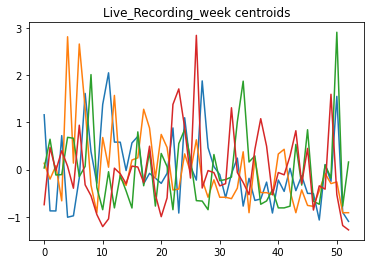

In [5159]:
plot_kmeans_centroids(cluster_centers_live_eu, album_type)

<h3>DTW distance</h3>

k:  2 SSE:  12.150455771149721 Silhouette Score:  0.050165657382695295

k:  3 SSE:  9.514227907943841 Silhouette Score:  0.06903440697477052

k:  4 SSE:  6.635198829115102 Silhouette Score:  0.0684192359883947

k:  5 SSE:  4.305368975628035 Silhouette Score:  0.06502041922162749

k:  6 SSE:  2.7957442967169053 Silhouette Score:  0.03769374829135759

k:  7 SSE:  1.1594314975407978 Silhouette Score:  0.028094686710614936



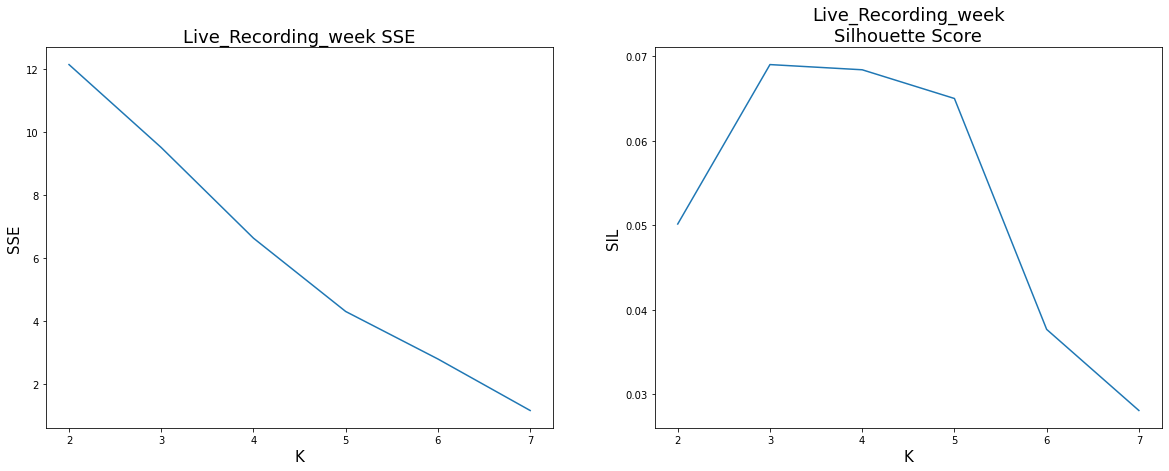

In [5160]:
find_optimal_k_kmeans(7, 'dtw', tss_live_scaled, False, album_type)

**We can see that best k is 3**

In [5161]:
cluster_centers_live_dtw, dict_label_live_dtw, labels_live_dtw = run_kmeans(3, 300, 10, 'dtw', tss_live_scaled,\
                                                                      False)

cluster_centers_shape (3, 53, 1)

Labels:  {0: 2, 1: 4, 2: 2}

SSE:  9.514227907943841
Silhouette Score:  0.06903440697477052


In [5162]:
cluster_insight(df_tss_live_scaled, labels_live_dtw)

1         2         3         4         5  \
track_date_created                                                     
2009_live           2.335681 -1.082497 -0.787827  1.451669 -0.994096   
2010_live          -0.057063  1.106154  0.501281  1.385326  1.385326   
2011_live          -1.431474 -0.167005 -0.541663 -0.588495 -1.244145   
2012_live          -0.725356 -0.802475 -0.493999 -0.956713  1.742455   
2013_live          -0.012387 -0.668907 -0.967325 -0.012387 -1.027009   
2014_live           0.993420  0.397047  0.652635 -0.369719  3.890092   
2015_live          -0.791993  0.580704  0.219468  0.002726  0.508457   
2016_live           0.859194  0.705352 -0.448464 -0.217701  0.859194   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live          -1.053030 -0.876228  1.510603  0.714993  0.449790  ...   
2010_live           0.687396  0.082523  0.222109 -0.615408 -0.568879  ...   
2011_live          -1.478306  1.799946 -0.869488 -0.494831 -1.337810  ...   
2012_live          -0.378320  3.053479 -0.262641 -0.802475 -1.033832  ...   
2013_live          -0.907642  0.524765  1.718438  0.047296 -1.027009  ...   
2014_live           0.652635  2.271364  2.867737  0.141458 -0.795701  ...   
2015_live          -0.069521  0.074974  0.508457  1.014187  0.074974  ...   
2016_live           1.397641 -0.371543 -0.371543  3.012983 -0.833070  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_live          -0.728893 -0.758360 -0.051150 -1.170898 -0.434222   
2010_live          -0.754994  0.175580 -1.034166 -0.522350 -0.382764   
2011_live           0.160820  0.722806 -0.682159 -0.167005 -0.447998   
2012_live          -0.918154 -0.725356 -0.763915 -0.185522 -0.224082   
2013_live           0.465082 -0.251122 -0.967325 -0.967325  0.644133   
2014_live           0.056262 -0.795701 -0.795701 -0.710504  0.056262   
2015_live          -0.286262  0.291715 -0.430757 -0.791993 -0.430757   
2016_live          -0.371543  1.397641 -0.909991 -0.679227  0.628430   

                          50        51        52        53  Labels  
track_date_created                                                  
2009_live          -0.846761  1.923142 -0.787827 -1.170898       0  
2010_live           0.222109 -1.034166 -1.080695 -1.034166       2  
2011_live           2.970751 -0.026509 -1.290978 -1.525139       1  
2012_live          -0.224082 -0.069844 -1.033832 -1.033832       2  
2013_live           0.345715  1.181285 -1.027009 -1.027009       1  
2014_live          -0.369719 -0.454916 -0.795701 -0.795701       0  
2015_live          -0.214015  2.964861 -0.791993  1.230929       1  
2016_live          -0.140780  2.859141 -0.756148 -0.909991       1  

[8 rows x 54 columns]

Cluster 0
 ['2009_live', '2014_live']

Cluster 1
 ['2011_live', '2013_live', '2015_live', '2016_live']

Cluster 2
 ['2010_live', '2012_live']



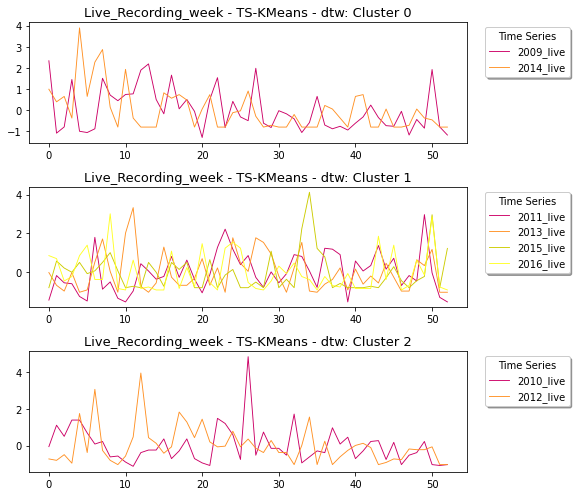

In [5163]:
analyze_clusters(labels_live_dtw, tss_live_scaled, df_tss_live_scaled, album_type, 'TS-KMeans - dtw', False)

**Centroids**

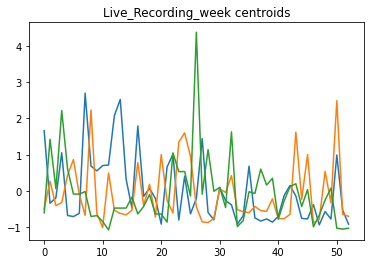

In [5164]:
plot_kmeans_centroids(cluster_centers_live_dtw, album_type)

<h3>KMeans sklearn</h3>

k:  2 SSE:  287.42336727117225 Silhouette Score:  0.04509147737487547
Calinski-Harabaz:  1.3775867182710557 Davies-Bouldin:  1.9861496086846075

k:  3 SSE:  223.79894330630304 Silhouette Score:  0.05892732755083759
Calinski-Harabaz:  1.4479089012764905 Davies-Bouldin:  1.6396975857798524

k:  4 SSE:  160.17562504191181 Silhouette Score:  0.09692535455749957
Calinski-Harabaz:  1.6085636089146151 Davies-Bouldin:  1.1583356148402018

k:  5 SSE:  118.32729883696993 Silhouette Score:  0.06999200876942507
Calinski-Harabaz:  1.4900693222767363 Davies-Bouldin:  0.8940299400804207

k:  6 SSE:  76.7094430744117 Silhouette Score:  0.04674122147376007
Calinski-Harabaz:  1.442876819258155 Davies-Bouldin:  0.7000440394642578

k:  7 SSE:  38.03390066601094 Silhouette Score:  0.013090639398713775
Calinski-Harabaz:  1.3820181029793803 Davies-Bouldin:  0.4694777457258846



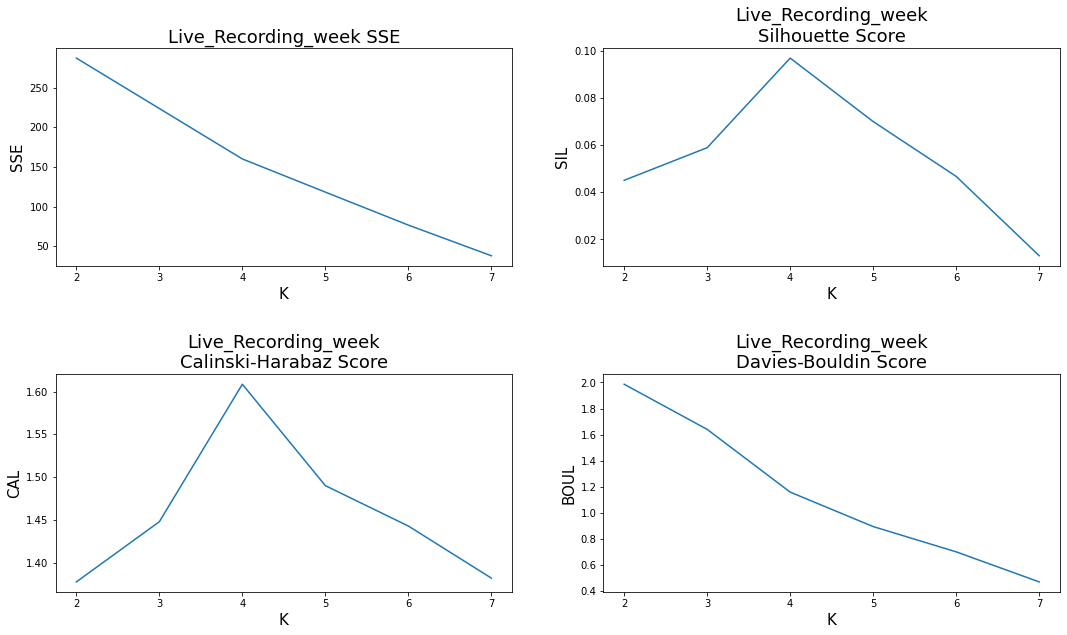

In [5165]:
find_optimal_k_kmeans(7, "", df_tss_live_scaled, True, album_type)

In [5166]:
cluster_centers_live_2, dict_label_live_2, labels_live_2 = run_kmeans(4, 300, 10, '', df_tss_live_scaled,\
                                                                      True)

cluster_centers_shape (4, 53)

Labels:  {0: 2, 1: 2, 2: 2, 3: 2}

SSE:  160.17562504191181
Silhouette Score:  0.09692535455749957
Calinski - Harabaz Score:  1.6085636089146151
Davies - Bouldin Score:  1.1583356148402018


In [5167]:
cluster_insight(df_tss_live_scaled, labels_live_2)

1         2         3         4         5  \
track_date_created                                                     
2009_live           2.335681 -1.082497 -0.787827  1.451669 -0.994096   
2010_live          -0.057063  1.106154  0.501281  1.385326  1.385326   
2011_live          -1.431474 -0.167005 -0.541663 -0.588495 -1.244145   
2012_live          -0.725356 -0.802475 -0.493999 -0.956713  1.742455   
2013_live          -0.012387 -0.668907 -0.967325 -0.012387 -1.027009   
2014_live           0.993420  0.397047  0.652635 -0.369719  3.890092   
2015_live          -0.791993  0.580704  0.219468  0.002726  0.508457   
2016_live           0.859194  0.705352 -0.448464 -0.217701  0.859194   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live          -1.053030 -0.876228  1.510603  0.714993  0.449790  ...   
2010_live           0.687396  0.082523  0.222109 -0.615408 -0.568879  ...   
2011_live          -1.478306  1.799946 -0.869488 -0.494831 -1.337810  ...   
2012_live          -0.378320  3.053479 -0.262641 -0.802475 -1.033832  ...   
2013_live          -0.907642  0.524765  1.718438  0.047296 -1.027009  ...   
2014_live           0.652635  2.271364  2.867737  0.141458 -0.795701  ...   
2015_live          -0.069521  0.074974  0.508457  1.014187  0.074974  ...   
2016_live           1.397641 -0.371543 -0.371543  3.012983 -0.833070  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_live          -0.728893 -0.758360 -0.051150 -1.170898 -0.434222   
2010_live          -0.754994  0.175580 -1.034166 -0.522350 -0.382764   
2011_live           0.160820  0.722806 -0.682159 -0.167005 -0.447998   
2012_live          -0.918154 -0.725356 -0.763915 -0.185522 -0.224082   
2013_live           0.465082 -0.251122 -0.967325 -0.967325  0.644133   
2014_live           0.056262 -0.795701 -0.795701 -0.710504  0.056262   
2015_live          -0.286262  0.291715 -0.430757 -0.791993 -0.430757   
2016_live          -0.371543  1.397641 -0.909991 -0.679227  0.628430   

                          50        51        52        53  Labels  
track_date_created                                                  
2009_live          -0.846761  1.923142 -0.787827 -1.170898       0  
2010_live           0.222109 -1.034166 -1.080695 -1.034166       3  
2011_live           2.970751 -0.026509 -1.290978 -1.525139       3  
2012_live          -0.224082 -0.069844 -1.033832 -1.033832       1  
2013_live           0.345715  1.181285 -1.027009 -1.027009       0  
2014_live          -0.369719 -0.454916 -0.795701 -0.795701       1  
2015_live          -0.214015  2.964861 -0.791993  1.230929       2  
2016_live          -0.140780  2.859141 -0.756148 -0.909991       2  

[8 rows x 54 columns]

Cluster 0
 ['2009_live', '2013_live']

Cluster 1
 ['2012_live', '2014_live']

Cluster 2
 ['2015_live', '2016_live']

Cluster 3
 ['2010_live', '2011_live']



<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [5168]:
F = pd.DataFrame()
for ts in tss_live_scaled:
    F = F.append(pd.DataFrame.from_dict(calculate_features(ts)), ignore_index=True)
F.index = df_tss_live_scaled.index
F

avg       10p       25p       50p       75p  \
track_date_created                                                         
2009_live          -5.027425e-17 -1.041243 -0.787827 -0.316354  0.508724   
2010_live           5.446377e-17 -1.015555 -0.708465 -0.243178  0.361695   
2011_live          -4.608473e-17 -1.328443 -0.682159 -0.120173  0.722806   
2012_live           2.513713e-17 -1.033832 -0.725356 -0.185522  0.238633   
2013_live           1.675808e-17 -1.027009 -0.907642 -0.251122  0.465082   
2014_live          -1.675808e-17 -0.795701 -0.795701 -0.369719  0.567439   
2015_live           4.189521e-17 -0.791993 -0.791993 -0.286262  0.508457   
2016_live          -1.885284e-17 -0.909991 -0.833070 -0.371543  0.628430   

                         90p       iqr       skw       kur  
track_date_created                                          
2009_live           1.634365  1.296550  0.836082 -0.432706  
2010_live           1.180600  1.070160  2.235329  7.973213  
2011_live           1.228594  1.404965  0.549977  0.141980  
2012_live           1.403131  0.963988  1.849744  4.039061  
2013_live           1.539387  1.372723  1.097978  0.792189  
2014_live           0.891185  1.363140  1.791369  3.594865  
2015_live           1.071985  1.300449  1.970380  4.682195  
2016_live           1.397641  1.461500  1.204227  0.738813

k:  2 SSE:  13.880195651123156 Silhouette Score:  0.6509462780882447
Calinski-Harabaz:  20.713240799657633 Davies-Bouldin:  0.43320230751374544

k:  3 SSE:  2.5197401854626476 Silhouette Score:  0.6493624315234559
Calinski-Harabaz:  58.81336657148475 Davies-Bouldin:  0.24778512933167204

k:  4 SSE:  1.3959095342503987 Silhouette Score:  0.4996387209088855
Calinski-Harabaz:  57.693893428085765 Davies-Bouldin:  0.37442093898625517

k:  5 SSE:  0.8329796775654142 Silhouette Score:  0.26626285584509657
Calinski-Harabaz:  54.89136478373081 Davies-Bouldin:  0.4444744283871754

k:  6 SSE:  0.4345209008529599 Silhouette Score:  0.2384097669991691
Calinski-Harabaz:  56.48794379387603 Davies-Bouldin:  0.24642075137116634

k:  7 SSE:  0.051274683902250935 Silhouette Score:  0.17244902361704761
Calinski-Harabaz:  200.70407096114747 Davies-Bouldin:  0.08624335176403071



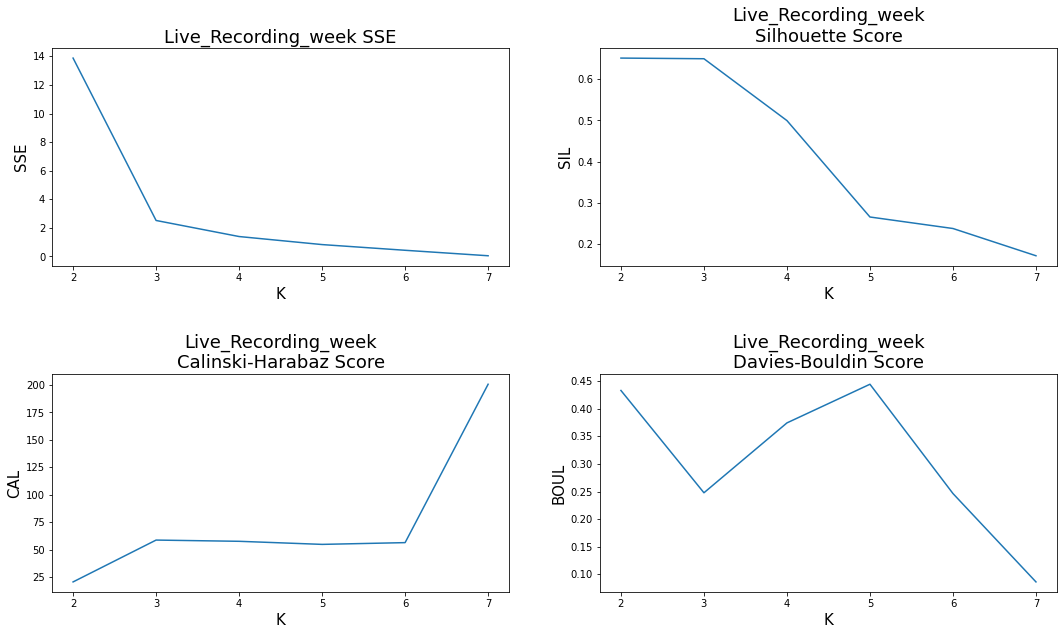

In [5169]:
find_optimal_k_kmeans(7, "", F, True, album_type)

In [5170]:
cluster_centers_live_fb, dict_label_live_fb, labels_live_fb = run_kmeans(3, 300, 10, "", F, True)

cluster_centers_shape (3, 9)

Labels:  {0: 4, 1: 3, 2: 1}

SSE:  2.5197401854626476
Silhouette Score:  0.6493624315234559
Calinski - Harabaz Score:  58.81336657148475
Davies - Bouldin Score:  0.24778512933167204


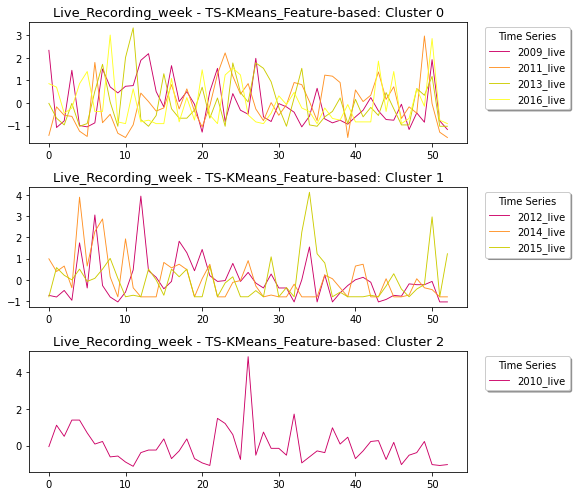

In [5171]:
analyze_clusters(labels_live_fb, tss_live_scaled, F, album_type, 'TS-KMeans_Feature-based', False)

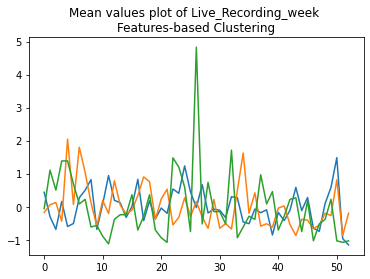

In [5172]:
plot_mean_values(labels_live_fb, tss_live_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [5173]:
M = pairwise_distances(tss_live_scaled.reshape(tss_live_scaled.shape[0], tss_live_scaled.shape[1]), \
                       metric=cdm_dist)

In [5174]:
print(tss_live_scaled.shape, M.shape)

(8, 53, 1) (8, 8)


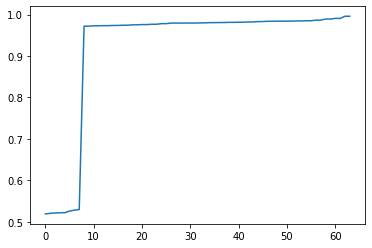

In [5175]:
plt.plot(sorted(M.ravel()))
plt.show()

In [5176]:
dbscan_compression_live = DBSCAN(eps=0.98, min_samples=5, metric='precomputed')
dbscan_compression_live.fit(M)

DBSCAN(eps=0.98, metric='precomputed')

In [5177]:
dbscan_compression_live.labels_

array([0, 0, 0, 0, 0, 0, 0, 0])

<h2>Approximation-based Clustering</h2>

<h3>PiecewiseAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [5178]:
n_paa_segments = 26
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_live_scaled)

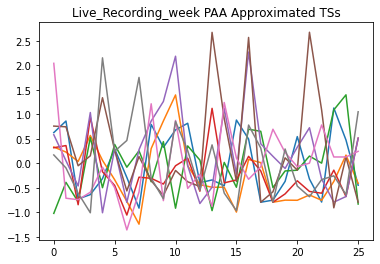

In [5179]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " PAA Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  10.290037048058288 Silhouette Score:  0.07409236119510877

k:  3 SSE:  7.765525380013114 Silhouette Score:  0.09556078897280831

k:  4 SSE:  5.571939150941354 Silhouette Score:  0.11377078244313385

k:  5 SSE:  3.7053780069808573 Silhouette Score:  0.10117757584171123

k:  6 SSE:  2.304847223140975 Silhouette Score:  0.08016414822270831

k:  7 SSE:  0.975709278649476 Silhouette Score:  0.04494092757810645



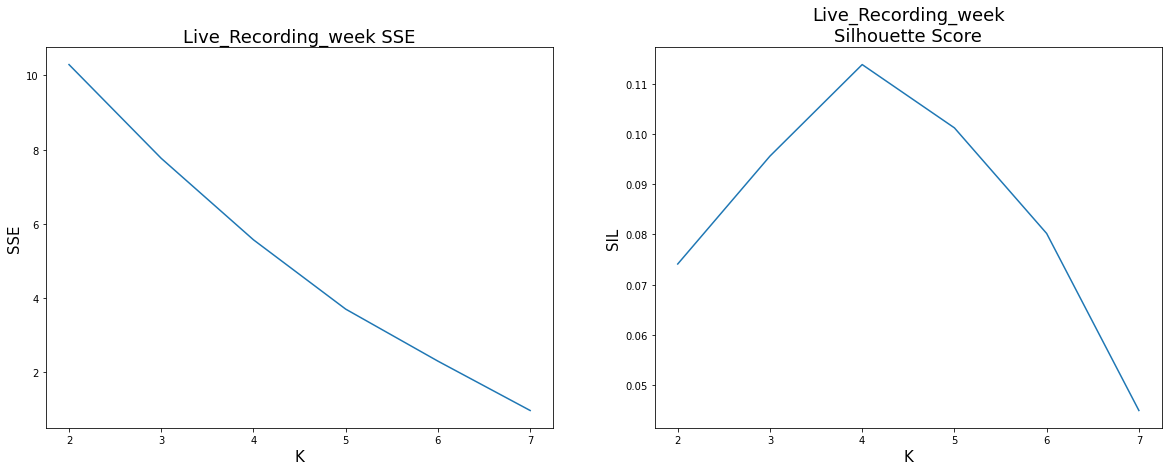

In [5180]:
find_optimal_k_kmeans(7, 'euclidean', X_paa, False, album_type)

In [5181]:
cluster_centers_live_paa, dict_label_live_paa, labels_live_paa = run_kmeans(4, 300, 10, 'euclidean', X_paa,\
                                                                      False)

cluster_centers_shape (4, 26, 1)

Labels:  {0: 2, 1: 2, 2: 2, 3: 2}

SSE:  5.571939150941354
Silhouette Score:  0.11377078244313385


0         1         2         3         4  \
track_date_created                                                     
2009_live           0.626592  0.331921 -1.023563  0.317188  0.582391   
2010_live           0.524545  0.943303  1.036361  0.152316 -0.592143   
2011_live          -0.799240 -0.565079 -1.361226  0.465229 -0.916320   
2012_live          -0.763915 -0.725356  0.682067  1.395419 -0.918154   
2013_live          -0.340647 -0.489856 -0.967325  1.121602 -0.489856   
2014_live           0.695233  0.141458  2.271364  2.569551 -0.327121   
2015_live          -0.105644  0.111097  0.219468  0.291715  0.544580   
2016_live           0.782273 -0.333083  1.128417 -0.371543  1.089957   

                           5         6         7         8         9  ...  \
track_date_created                                                    ...   
2009_live           0.759194  2.041010  0.169853  0.862328  0.228787  ...   
2010_live          -1.010902 -0.312971  0.059258 -0.499086 -0.173385  ...   
2011_live          -1.244145  0.254484 -0.284086  0.277900  0.137404  ...   
2012_live          -0.050564  2.185889 -0.146963  0.874865  0.855585  ...   
2013_live           2.673376 -0.877800  0.375556 -0.460014 -0.489856  ...   
2014_live           0.780430 -0.795701  0.013664  0.652635 -0.156729  ...   
2015_live          -0.755869 -0.141768 -0.358510  0.327839 -0.141768  ...   
2016_live          -0.140780 -0.794609 -0.909991  0.128444 -0.256162  ...   

                          17        18        19        20        21  \
track_date_created                                                     
2009_live           0.037251 -0.787827 -0.846761 -0.463689 -0.051150   
2010_live          -0.452557  0.291902  0.268637 -0.499086  0.245373   
2011_live          -0.354334  1.214544 -0.307502  0.324733  0.863303   
2012_live           0.257912 -0.397600 -0.436159  0.065115 -0.571118   
2013_live          -0.997167 -0.489856 -0.340647 -0.221280 -0.370489   
2014_live          -0.795701  0.141458 -0.582710  0.695233 -0.795701   
2015_live           2.675872  0.002726 -0.683622 -0.791993 -0.755869   
2016_live          -0.640767 -0.448464 -0.410004 -0.833070  0.513049   

                          22        23        24        25  Labels  
track_date_created                                                  
2009_live          -0.743626 -0.611024 -0.640491  0.567658       2  
2010_live          -0.289707 -0.778258 -0.080328 -1.057430       0  
2011_live           0.441813 -0.424582  1.261376 -0.658743       0  
2012_live          -0.821755 -0.474719 -0.224082 -0.551838       2  
2013_live           0.106980 -0.967325  0.494924  0.077138       3  
2014_live          -0.369719 -0.753103 -0.156729 -0.625308       3  
2015_live           0.002726 -0.611375 -0.322386  1.086434       1  
2016_live           0.513049 -0.794609  0.243825  1.051496       1  

[8 rows x 27 columns]


Cluster 0
 ['2010_live', '2011_live']

Cluster 1
 ['2015_live', '2016_live']

Cluster 2
 ['2009_live', '2012_live']

Cluster 3
 ['2013_live', '2014_live']




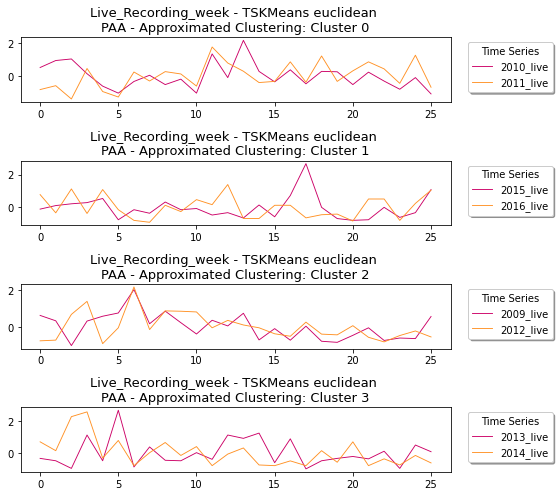

In [5182]:
analyze_approximated_clusters(labels_live_paa, X_paa, df_tss_live_scaled, album_type, \
                               'TSKMeans euclidean \nPAA - Approximated Clustering', False)

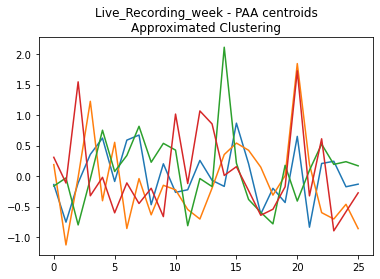

In [5183]:
plot_centroids_approximated(cluster_centers_live_paa, X_paa, album_type, 'PAA')

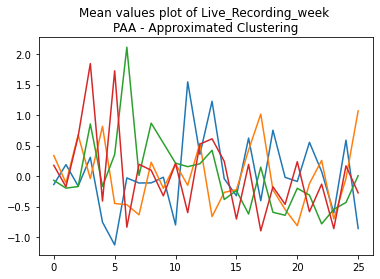

In [5184]:
plot_mean_values_approximated(labels_live_paa, X_paa, album_type, 'PAA')

<h3>DTW</h3>

k:  2 SSE:  3.435675627270853 Silhouette Score:  0.14202043272085857

k:  3 SSE:  2.7441640034658237 Silhouette Score:  0.07858064183266163

k:  4 SSE:  1.9280279146229353 Silhouette Score:  0.08706356764850966

k:  5 SSE:  1.3134878053772967 Silhouette Score:  0.05997933190822165

k:  6 SSE:  0.7915538162643061 Silhouette Score:  0.04193959999519624

k:  7 SSE:  0.36478449123882073 Silhouette Score:  0.018565195448080107



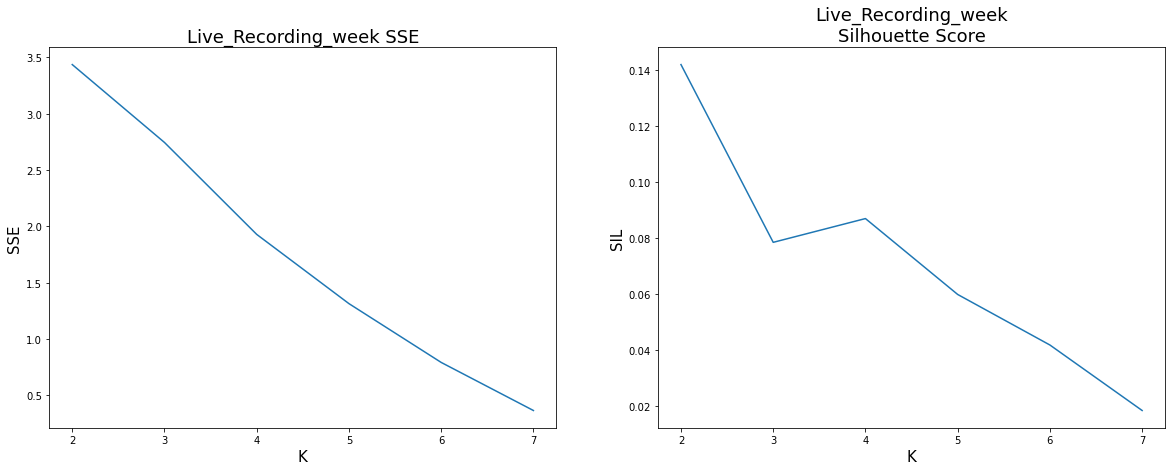

In [5185]:
find_optimal_k_kmeans(7, 'dtw', X_paa, False, album_type)

In [5186]:
cluster_centers_live_paa_dtw, dict_label_live_paa_dtw, labels_live_paa_dtw = run_kmeans(4, 300, 10, 'dtw', X_paa,\
                                                                      False)

cluster_centers_shape (4, 26, 1)

Labels:  {0: 2, 1: 3, 2: 2, 3: 1}

SSE:  1.9280279146229353
Silhouette Score:  0.08706356764850966


0         1         2         3         4  \
track_date_created                                                     
2009_live           0.626592  0.331921 -1.023563  0.317188  0.582391   
2010_live           0.524545  0.943303  1.036361  0.152316 -0.592143   
2011_live          -0.799240 -0.565079 -1.361226  0.465229 -0.916320   
2012_live          -0.763915 -0.725356  0.682067  1.395419 -0.918154   
2013_live          -0.340647 -0.489856 -0.967325  1.121602 -0.489856   
2014_live           0.695233  0.141458  2.271364  2.569551 -0.327121   
2015_live          -0.105644  0.111097  0.219468  0.291715  0.544580   
2016_live           0.782273 -0.333083  1.128417 -0.371543  1.089957   

                           5         6         7         8         9  ...  \
track_date_created                                                    ...   
2009_live           0.759194  2.041010  0.169853  0.862328  0.228787  ...   
2010_live          -1.010902 -0.312971  0.059258 -0.499086 -0.173385  ...   
2011_live          -1.244145  0.254484 -0.284086  0.277900  0.137404  ...   
2012_live          -0.050564  2.185889 -0.146963  0.874865  0.855585  ...   
2013_live           2.673376 -0.877800  0.375556 -0.460014 -0.489856  ...   
2014_live           0.780430 -0.795701  0.013664  0.652635 -0.156729  ...   
2015_live          -0.755869 -0.141768 -0.358510  0.327839 -0.141768  ...   
2016_live          -0.140780 -0.794609 -0.909991  0.128444 -0.256162  ...   

                          17        18        19        20        21  \
track_date_created                                                     
2009_live           0.037251 -0.787827 -0.846761 -0.463689 -0.051150   
2010_live          -0.452557  0.291902  0.268637 -0.499086  0.245373   
2011_live          -0.354334  1.214544 -0.307502  0.324733  0.863303   
2012_live           0.257912 -0.397600 -0.436159  0.065115 -0.571118   
2013_live          -0.997167 -0.489856 -0.340647 -0.221280 -0.370489   
2014_live          -0.795701  0.141458 -0.582710  0.695233 -0.795701   
2015_live           2.675872  0.002726 -0.683622 -0.791993 -0.755869   
2016_live          -0.640767 -0.448464 -0.410004 -0.833070  0.513049   

                          22        23        24        25  Labels  
track_date_created                                                  
2009_live          -0.743626 -0.611024 -0.640491  0.567658       2  
2010_live          -0.289707 -0.778258 -0.080328 -1.057430       3  
2011_live           0.441813 -0.424582  1.261376 -0.658743       1  
2012_live          -0.821755 -0.474719 -0.224082 -0.551838       1  
2013_live           0.106980 -0.967325  0.494924  0.077138       1  
2014_live          -0.369719 -0.753103 -0.156729 -0.625308       2  
2015_live           0.002726 -0.611375 -0.322386  1.086434       0  
2016_live           0.513049 -0.794609  0.243825  1.051496       0  

[8 rows x 27 columns]


Cluster 0
 ['2015_live', '2016_live']

Cluster 1
 ['2011_live', '2012_live', '2013_live']

Cluster 2
 ['2009_live', '2014_live']

Cluster 3
 ['2010_live']




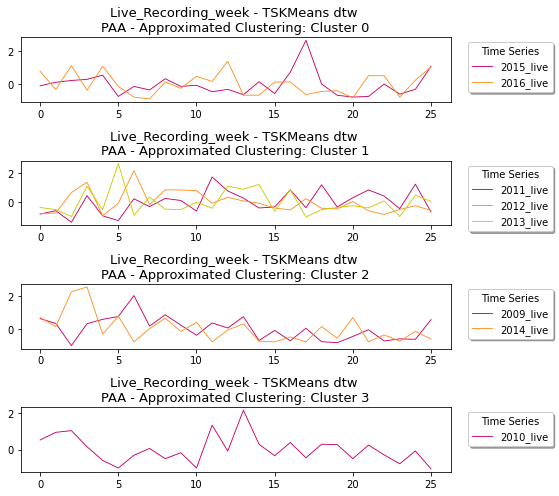

In [5187]:
analyze_approximated_clusters(labels_live_paa_dtw, X_paa, df_tss_live_scaled, album_type, \
                               'TSKMeans dtw \nPAA - Approximated Clustering', False)

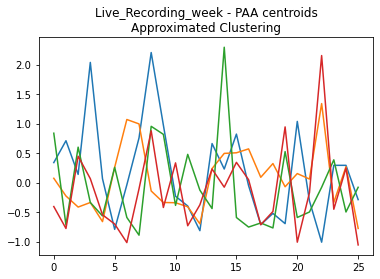

In [5188]:
plot_centroids_approximated(cluster_centers_live_paa_dtw, X_paa, album_type, 'PAA')

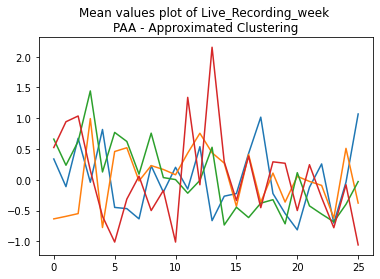

In [5189]:
plot_mean_values_approximated(labels_live_paa_dtw, X_paa, album_type, 'PAA')

<h3>OneD_SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [5190]:
n_sax1d_segments = 26
n_sax_symbols_avg = 10
n_sax_symbols_slope = 4

one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_sax1d_segments,\
     alphabet_size_avg=n_sax_symbols_avg, alphabet_size_slope=n_sax_symbols_slope)

X_sax1d = one_d_sax.fit_transform(tss_live_scaled)

<h3>EUCLIDEAN</h3>

k:  2 SSE:  129.1 Silhouette Score:  0.06564095537381041

k:  3 SSE:  102.875 Silhouette Score:  0.050445203541798225

k:  4 SSE:  75.95833333333334 Silhouette Score:  0.0627892180987824

k:  5 SSE:  53.89583333333333 Silhouette Score:  0.05313027664613957

k:  6 SSE:  33.25 Silhouette Score:  0.04076206414137559

k:  7 SSE:  15.562499999999998 Silhouette Score:  0.02689613956832177



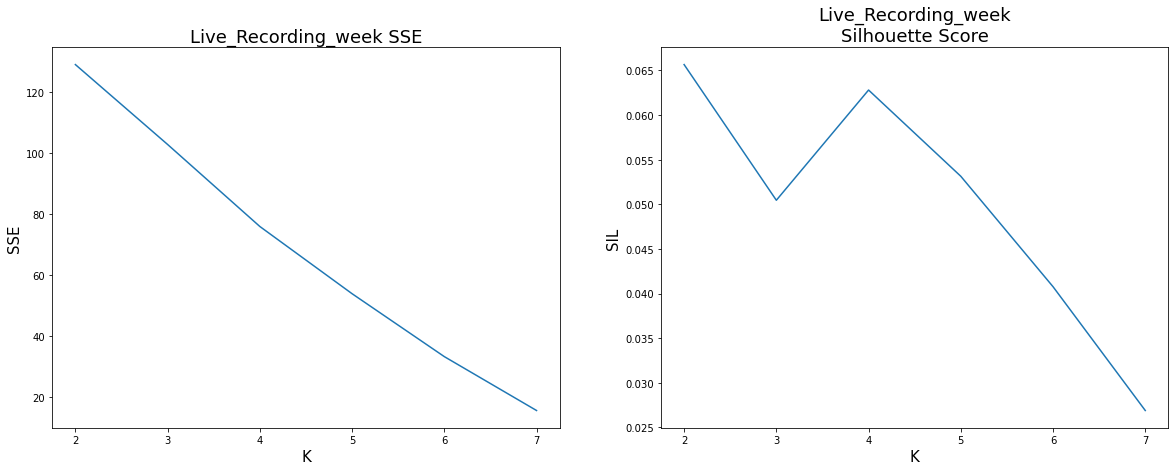

In [5191]:
find_optimal_k_kmeans(7, 'euclidean', X_sax1d, False, album_type)

In [5192]:
cluster_centers_live_sax1d, dict_label_live_sax1d, \
labels_live_sax1d = run_kmeans(4, 1000, 10, 'euclidean', X_sax1d, False)

cluster_centers_shape (4, 26, 2)

Labels:  {0: 2, 1: 2, 2: 3, 3: 1}

SSE:  75.95833333333334
Silhouette Score:  0.0627892180987824


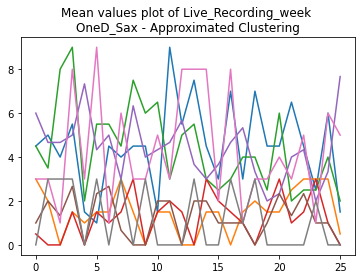

In [5193]:
plot_mean_values_approximated(labels_live_sax1d, X_sax1d, album_type, 'OneD_Sax')

<h3>DTW</h3>

k:  2 SSE:  78.65462662337663 Silhouette Score:  0.040145719394351694

k:  3 SSE:  61.575694444444444 Silhouette Score:  0.0254992791212314

k:  4 SSE:  44.42708333333334 Silhouette Score:  0.06101440007491836

k:  5 SSE:  29.95416666666667 Silhouette Score:  0.03139468102505496

k:  6 SSE:  19.229166666666664 Silhouette Score:  0.01552687229094155

k:  7 SSE:  9.145833333333334 Silhouette Score:  0.010024054836474314



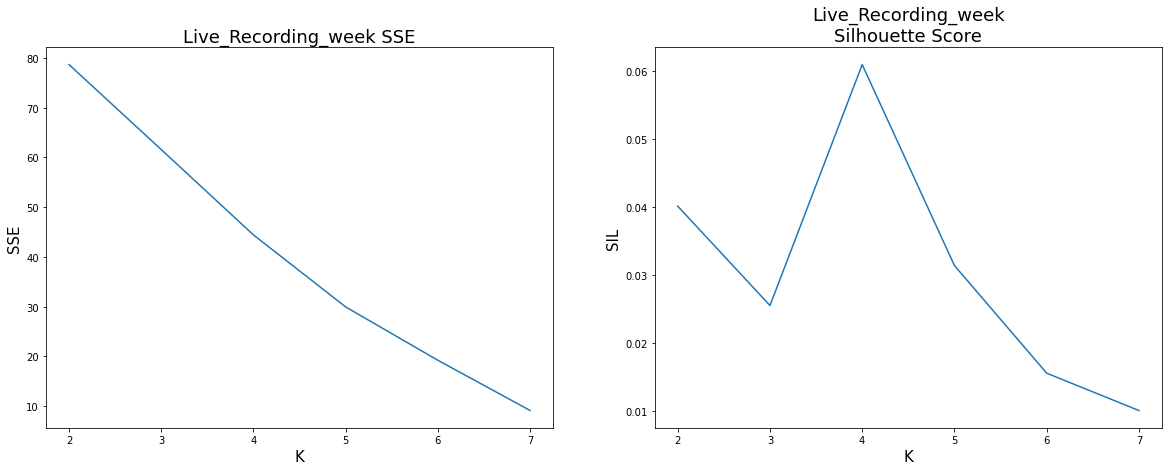

In [5194]:
find_optimal_k_kmeans(7, 'dtw', X_sax1d, False, album_type)

In [5195]:
cluster_centers_live_sax1d_dtw, dict_label_live_sax1d_dtw, \
labels_live_sax1d_dtw = run_kmeans(4, 300, 10, 'dtw', X_sax1d, False)

cluster_centers_shape (4, 26, 2)

Labels:  {0: 2, 1: 2, 2: 2, 3: 2}

SSE:  44.42708333333334
Silhouette Score:  0.06101440007491836


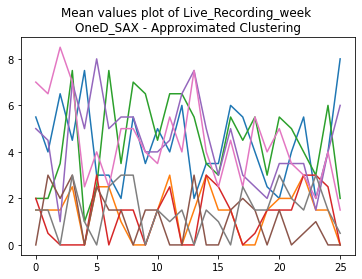

In [5196]:
plot_mean_values_approximated(labels_live_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

<h3>SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [5197]:
n_sax_segments = 26
n_sax_symbols = 10

sax = SymbolicAggregateApproximation(n_segments=n_sax_segments, \
                                     alphabet_size_avg=n_sax_symbols)

X_sax = sax.fit_transform(tss_live_scaled)

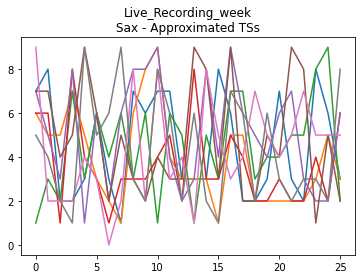

In [5198]:
plt.plot(X_sax.reshape(X_sax.shape[1], X_sax.shape[0]))
plt.title(album_type + "\nSax - Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  92.06666666666668 Silhouette Score:  0.0895851518186547

k:  3 SSE:  70.66666666666666 Silhouette Score:  0.08600685231473276

k:  4 SSE:  52.166666666666664 Silhouette Score:  0.08638092111266105

k:  5 SSE:  37.166666666666664 Silhouette Score:  0.07191280640131777

k:  6 SSE:  21.6875 Silhouette Score:  0.061523420553960914

k:  7 SSE:  10.000000000000002 Silhouette Score:  0.037007873933070215



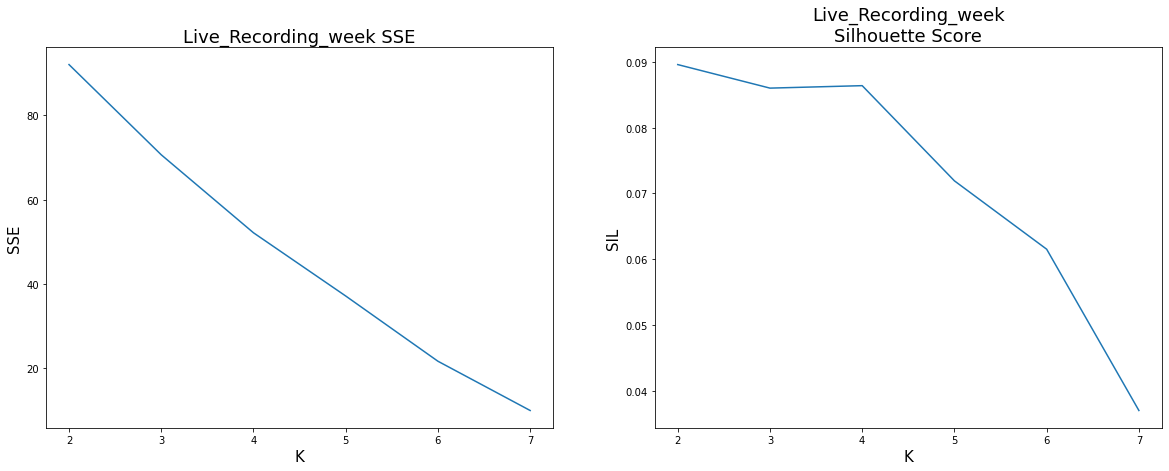

In [5199]:
find_optimal_k_kmeans(7, 'euclidean', X_sax, False, album_type)

In [5200]:
cluster_centers_live_sax, dict_label_live_sax, \
labels_live_sax = run_kmeans(4, 1000, 10, 'euclidean', X_sax, False)

cluster_centers_shape (4, 26, 1)

Labels:  {0: 1, 1: 3, 2: 2, 3: 2}

SSE:  52.166666666666664
Silhouette Score:  0.08638092111266105


0  1  2  3  4  5  6  7  8  9  ...  17  18  19  20  21  22  \
track_date_created                                ...                           
2009_live           7  6  1  6  7  7  9  5  8  5  ...   5   2   1   3   4   2   
2010_live           7  8  8  5  2  1  3  5  3  4  ...   3   6   6   3   5   3   
2011_live           2  2  0  6  1  1  6  3  6  5  ...   3   8   3   6   8   6   
2012_live           2  2  7  9  1  4  9  4  8  8  ...   6   3   3   5   2   2   
2013_live           3  3  1  8  3  9  1  6  3  3  ...   1   3   3   4   3   5   
2014_live           7  5  9  9  3  7  2  5  7  4  ...   2   5   2   7   2   3   
2015_live           4  5  5  6  7  2  4  3  6  4  ...   9   5   2   2   2   5   
2016_live           7  3  8  3  8  4  2  1  5  3  ...   2   3   3   2   6   6   

                    23  24  25  Labels  
track_date_created                      
2009_live            2   2   7       1  
2010_live            2   4   1       3  
2011_live            3   8   2       3  
2012_live            3   4   2       2  
2013_live            1   6   5       0  
2014_live            2   4   2       2  
2015_live            2   3   8       1  
2016_live            2   5   8       1  

[8 rows x 27 columns]


Cluster 0
 ['2013_live']

Cluster 1
 ['2009_live', '2015_live', '2016_live']

Cluster 2
 ['2012_live', '2014_live']

Cluster 3
 ['2010_live', '2011_live']




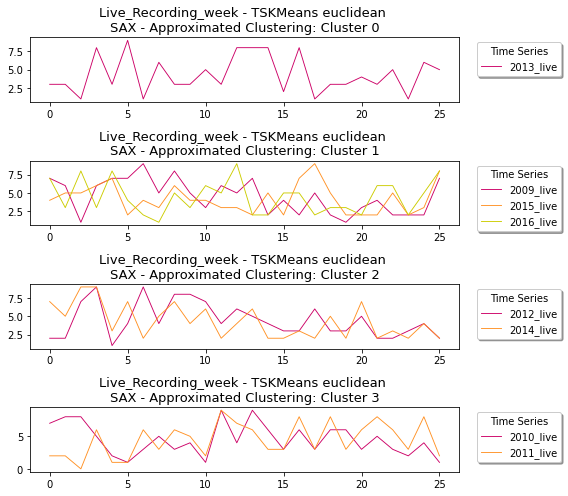

In [5201]:
analyze_approximated_clusters(labels_live_sax, X_sax, df_tss_live_scaled, \
                              album_type, \
                              'TSKMeans euclidean \nSAX - Approximated Clustering', False)

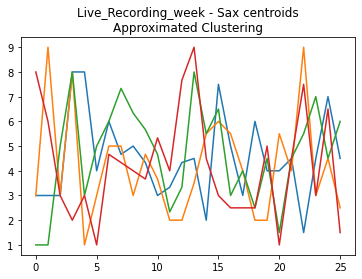

In [5202]:
plot_centroids_approximated(cluster_centers_live_sax, X_sax, album_type, 'Sax')

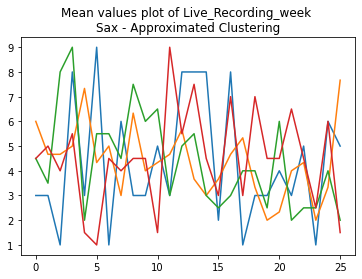

In [5203]:
plot_mean_values_approximated(labels_live_sax, X_sax, album_type, 'Sax')

<h3>DTW</h3>

k:  2 SSE:  35.902926587301586 Silhouette Score:  0.11060692957150739

k:  3 SSE:  24.481646825396822 Silhouette Score:  0.17544303268456132

k:  4 SSE:  17.9828373015873 Silhouette Score:  0.13109944968944948

k:  5 SSE:  11.856249999999998 Silhouette Score:  0.11016853524941897

k:  6 SSE:  7.6708333333333325 Silhouette Score:  0.08476382727523253

k:  7 SSE:  3.483333333333333 Silhouette Score:  0.040331524226068935



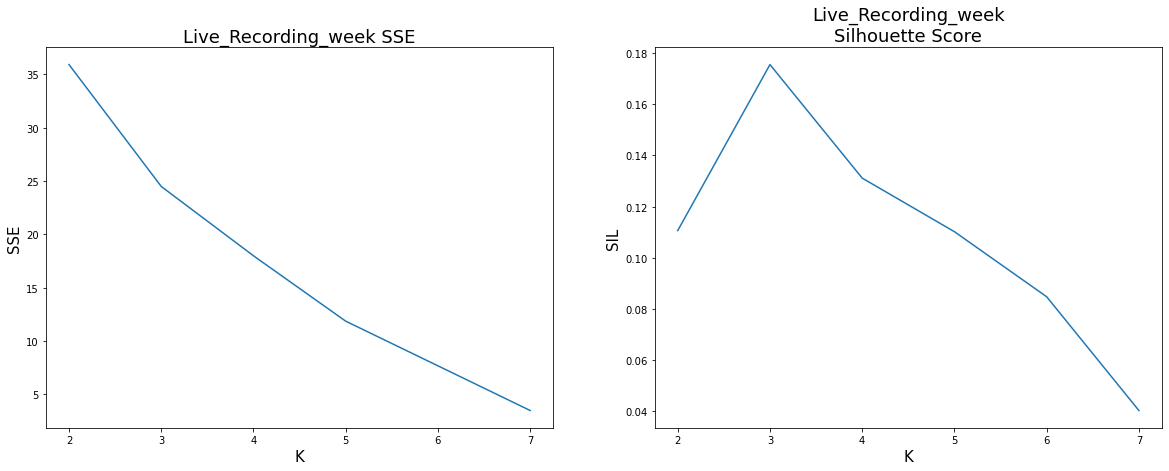

In [5204]:
find_optimal_k_kmeans(7, 'dtw', X_sax, False, album_type)

In [5205]:
cluster_centers_live_sax_dtw, dict_label_live_sax_dtw, \
labels_live_sax_dtw = run_kmeans(3, 300, 10, 'dtw', X_sax, False)

cluster_centers_shape (3, 26, 1)

Labels:  {0: 2, 1: 3, 2: 3}

SSE:  24.481646825396822
Silhouette Score:  0.17544303268456132


0  1  2  3  4  5  6  7  8  9  ...  17  18  19  20  21  22  \
track_date_created                                ...                           
2009_live           7  6  1  6  7  7  9  5  8  5  ...   5   2   1   3   4   2   
2010_live           7  8  8  5  2  1  3  5  3  4  ...   3   6   6   3   5   3   
2011_live           2  2  0  6  1  1  6  3  6  5  ...   3   8   3   6   8   6   
2012_live           2  2  7  9  1  4  9  4  8  8  ...   6   3   3   5   2   2   
2013_live           3  3  1  8  3  9  1  6  3  3  ...   1   3   3   4   3   5   
2014_live           7  5  9  9  3  7  2  5  7  4  ...   2   5   2   7   2   3   
2015_live           4  5  5  6  7  2  4  3  6  4  ...   9   5   2   2   2   5   
2016_live           7  3  8  3  8  4  2  1  5  3  ...   2   3   3   2   6   6   

                    23  24  25  Labels  
track_date_created                      
2009_live            2   2   7       2  
2010_live            2   4   1       0  
2011_live            3   8   2       1  
2012_live            3   4   2       1  
2013_live            1   6   5       1  
2014_live            2   4   2       0  
2015_live            2   3   8       2  
2016_live            2   5   8       2  

[8 rows x 27 columns]


Cluster 0
 ['2010_live', '2014_live']

Cluster 1
 ['2011_live', '2012_live', '2013_live']

Cluster 2
 ['2009_live', '2015_live', '2016_live']




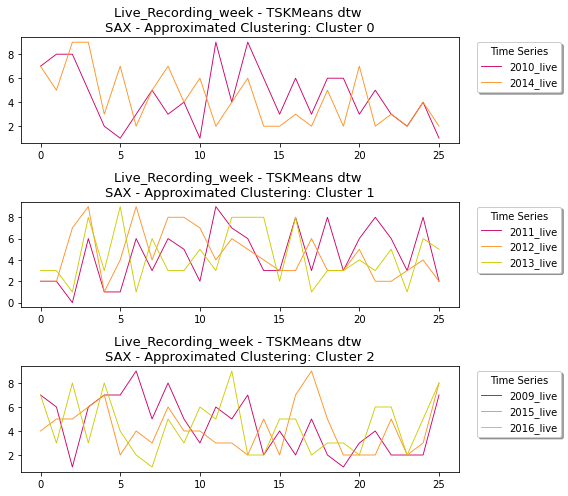

In [5206]:
analyze_approximated_clusters(labels_live_sax_dtw, X_sax, df_tss_live_scaled, album_type, \
                               'TSKMeans dtw \nSAX - Approximated Clustering', False)

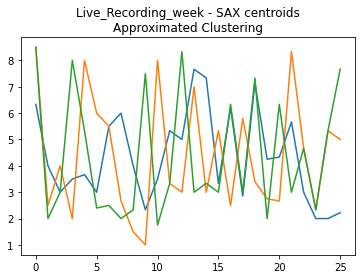

In [5207]:
plot_centroids_approximated(cluster_centers_live_sax_dtw, X_sax, album_type, 'SAX')

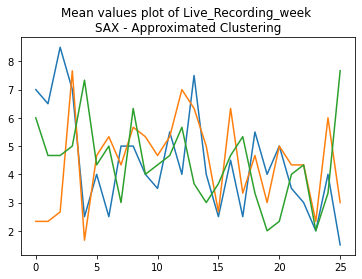

In [5208]:
plot_mean_values_approximated(labels_live_sax_dtw, X_sax, album_type, 'SAX')

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<h1>Studio_Recording and Live_Recording</h1>

In [5209]:
album_type = "Studio_Recording_week - Live_Recording_week"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [5210]:
df_studio_live

1    2    3    4    5    6    7    8    9   10  ...  \
track_date_created                                                    ...   
2009_studio           2   34   25   36   34   21   16   48   60   85  ...   
2010_studio         183  412  161  149   91  297  254  169  184  288  ...   
2011_studio         345  132  263  253  118  157  318  333  331  117  ...   
2012_studio         212  627  111  159  199  379  189  196  341  197  ...   
2013_studio         448  531  299  126  157  272   84  112  350  261  ...   
2014_studio         212  254  129  139  149  233  324  128  292   57  ...   
2015_studio         150  150   92  136  216  359  290  223  208  148  ...   
2016_studio         434  294  264  246  259  222  348  436  387  150  ...   
2009_live           128   12   22   98   15   13   19  100   73   64  ...   
2010_live            23   48   35   54   54   39   26   29   11   12  ...   
2011_live             2   29   21   20    6    1   71   14   22    4  ...   
2012_live             8    6   14    2   72   17  106   20    6    0  ...   
2013_live            17    6    1   17    0    2   26   46   18    0  ...   
2014_live            21   14   17    5   55   17   36   43   11    0  ...   
2015_live             0   19   14   11   18   10   12   18   25   12  ...   
2016_live            23   21    6    9   23   30    7    7   51    1  ...   

                     44   45   46   47   48   49   50   51   52   53  
track_date_created                                                    
2009_studio         186  141  251   82  175  250  108  187   69  109  
2010_studio         427  222  193  256  303  324  254  289  146   44  
2011_studio         122  128  128  149  115  304   79  249  133    0  
2012_studio         141  144  119  227  281  162  219  232  244    0  
2013_studio         312  224  176  265  368  472  196  383   44    0  
2014_studio         218  117  182  258  196  254  169  383  166    0  
2015_studio         277  322  209  214  179  279  347  197  120   99  
2016_studio         311  228  150  306  100  281  344  242  360   69  
2009_live            37   24   23   47    9   34   20  114   22    9  
2010_live            30    8   28    2   13   16   29    2    1    2  
2011_live            62   36   48   18   29   23   96   32    5    0  
2012_live             0    3    8    7   22   21   21   25    0    0  
2013_live             8   25   13    1    1   28   23   37    0    0  
2014_live             0   10    0    0    1   10    5    4    0    0  
2015_live             0    7   15    5    0    5    8   52    0   28  
2016_live            36    7   30    0    3   20   10   49    2    0  

[16 rows x 53 columns]

In [5211]:
df_studio_live.shape

(16, 53)

In [5212]:
tss_studio_live = to_time_series_dataset(df_studio_live.values)
tss_studio_live

array([[[  2.],
        [ 34.],
        [ 25.],
        [ 36.],
        [ 34.],
        [ 21.],
        [ 16.],
        [ 48.],
        [ 60.],
        [ 85.],
        [ 64.],
        [ 70.],
        [262.],
        [475.],
        [325.],
        [196.],
        [264.],
        [391.],
        [338.],
        [278.],
        [408.],
        [308.],
        [264.],
        [271.],
        [ 74.],
        [206.],
        [245.],
        [204.],
        [286.],
        [231.],
        [131.],
        [116.],
        [ 88.],
        [ 72.],
        [ 74.],
        [ 36.],
        [ 59.],
        [ 65.],
        [ 89.],
        [106.],
        [ 67.],
        [118.],
        [166.],
        [186.],
        [141.],
        [251.],
        [ 82.],
        [175.],
        [250.],
        [108.],
        [187.],
        [ 69.],
        [109.]],

       [[183.],
        [412.],
        [161.],
        [149.],
        [ 91.],
        [297.],
        [254.],
        [169.],
        [184.],
      

In [5213]:
tss_studio_live.shape

(16, 53, 1)

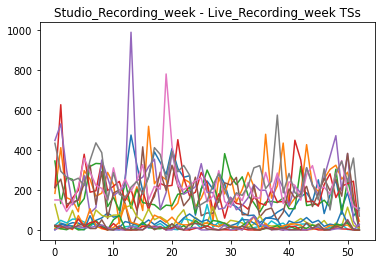

In [5214]:
plt.plot(np.squeeze(tss_studio_live).T)
plt.title(album_type + " TSs")
plt.show()

In [5215]:
tss_studio_live_scaled = TimeSeriesScalerMeanVariance().fit_transform(tss_studio_live)
tss_studio_live_scaled

array([[[-1.35604229e+00],
        [-1.07419821e+00],
        [-1.15346685e+00],
        [-1.05658295e+00],
        [-1.07419821e+00],
        [-1.18869737e+00],
        [-1.23273550e+00],
        [-9.50891419e-01],
        [-8.45199888e-01],
        [-6.25009198e-01],
        [-8.09969378e-01],
        [-7.57123612e-01],
        [ 9.33940891e-01],
        [ 2.80996557e+00],
        [ 1.48882143e+00],
        [ 3.52637468e-01],
        [ 9.51556146e-01],
        [ 2.07012485e+00],
        [ 1.60332059e+00],
        [ 1.07486293e+00],
        [ 2.21985452e+00],
        [ 1.33909176e+00],
        [ 9.51556146e-01],
        [ 1.01320954e+00],
        [-7.21893101e-01],
        [ 4.40713744e-01],
        [ 7.84211221e-01],
        [ 4.23098489e-01],
        [ 1.14532395e+00],
        [ 6.60904435e-01],
        [-2.19858327e-01],
        [-3.51972741e-01],
        [-5.98586315e-01],
        [-7.39508357e-01],
        [-7.21893101e-01],
        [-1.05658295e+00],
        [-8.54007516e-01],
 

In [5216]:
tss_studio_live_scaled.shape

(16, 53, 1)

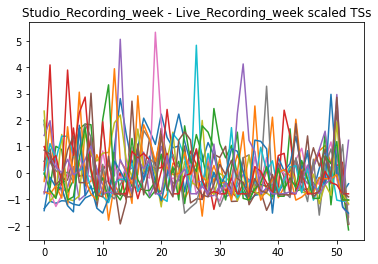

In [5217]:
plt.plot(np.squeeze(tss_studio_live_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [5218]:
df_tss_studio_live_scaled = pd.DataFrame(np.squeeze(tss_studio_live_scaled), columns = df_studio_live.columns, \
                                    index = df_studio_live.index)
df_tss_studio_live_scaled

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -1.356042 -1.074198 -1.153467 -1.056583 -1.074198   
2010_studio        -0.326130  1.883945 -0.538452 -0.654264 -1.214021   
2011_studio         1.988787 -0.573283  1.002450  0.882165 -0.741681   
2012_studio         0.089181  4.084174 -0.883094 -0.421023 -0.035963   
2013_studio         1.414800  1.972080  0.414381 -0.747178 -0.539038   
2014_studio         0.435219  0.904371 -0.491914 -0.380211 -0.268508   
2015_studio        -0.717377 -0.717377 -1.272427 -0.851354 -0.085767   
2016_studio         1.829724  0.391530  0.083345 -0.101565  0.031981   
2009_live           2.335681 -1.082497 -0.787827  1.451669 -0.994096   
2010_live          -0.057063  1.106154  0.501281  1.385326  1.385326   
2011_live          -1.431474 -0.167005 -0.541663 -0.588495 -1.244145   
2012_live          -0.725356 -0.802475 -0.493999 -0.956713  1.742455   
2013_live          -0.012387 -0.668907 -0.967325 -0.012387 -1.027009   
2014_live           0.993420  0.397047  0.652635 -0.369719  3.890092   
2015_live          -0.791993  0.580704  0.219468  0.002726  0.508457   
2016_live           0.859194  0.705352 -0.448464 -0.217701  0.859194   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -1.188697 -1.232736 -0.950891 -0.845200 -0.625009  ...   
2010_studio         0.774082  0.359089 -0.461244 -0.316479  0.687223  ...   
2011_studio        -0.272570  1.664017  1.844445  1.820388 -0.753710  ...   
2012_studio         1.696805 -0.132228 -0.064843  1.330998 -0.055216  ...   
2013_studio         0.233097 -1.029176 -0.841178  0.756806  0.159241  ...   
2014_studio         0.669795  1.686291 -0.503084  1.328842 -1.296174  ...   
2015_studio         1.282719  0.622400 -0.018779 -0.162326 -0.736516  ...   
2016_studio        -0.348113  0.946262  1.850270  1.346902 -1.087756  ...   
2009_live          -1.053030 -0.876228  1.510603  0.714993  0.449790  ...   
2010_live           0.687396  0.082523  0.222109 -0.615408 -0.568879  ...   
2011_live          -1.478306  1.799946 -0.869488 -0.494831 -1.337810  ...   
2012_live          -0.378320  3.053479 -0.262641 -0.802475 -1.033832  ...   
2013_live          -0.907642  0.524765  1.718438  0.047296 -1.027009  ...   
2014_live           0.652635  2.271364  2.867737  0.141458 -0.795701  ...   
2015_live          -0.069521  0.074974  0.508457  1.014187  0.074974  ...   
2016_live           1.397641 -0.371543 -0.371543  3.012983 -0.833070  ...   

                          44        45        46        47        48  \
track_date_created                                                     
2009_studio         0.264561 -0.131782  0.837057 -0.651432  0.167677   
2010_studio         2.028710  0.050258 -0.229621  0.378391  0.831988   
2011_studio        -0.693567 -0.621397 -0.621397 -0.368798 -0.777767   
2012_studio        -0.594299 -0.565420 -0.806082  0.233579  0.753409   
2013_studio         0.501666 -0.089185 -0.411468  0.186098  0.877662   
2014_studio         0.502241 -0.625957  0.100111  0.949052  0.256495   
2015_studio         0.497993  0.928635 -0.152756 -0.104907 -0.439851   
2016_studio         0.566168 -0.286476 -1.087756  0.514804 -1.601396   
2009_live          -0.345821 -0.728893 -0.758360 -0.051150 -1.170898   
2010_live           0.268637 -0.754994  0.175580 -1.034166 -0.522350   
2011_live           1.378457  0.160820  0.722806 -0.682159 -0.167005   
2012_live          -1.033832 -0.918154 -0.725356 -0.763915 -0.185522   
2013_live          -0.549540  0.465082 -0.251122 -0.967325 -0.967325   
2014_live          -0.795701  0.056262 -0.795701 -0.795701 -0.710504   
2015_live          -0.791993 -0.286262  0.291715 -0.430757 -0.791993   
2016_live           1.859167 -0.371543  1.397641 -0.909991 -0.679227   

                          49        50        

<h3>Euclidean Distance</h3>

k:  2 SSE:  42.06399077134459 Silhouette Score:  0.03432397840195108

k:  3 SSE:  37.17361881997715 Silhouette Score:  0.046492896803143696

k:  4 SSE:  33.79759545767355 Silhouette Score:  0.033498362874159415

k:  5 SSE:  29.44234202599184 Silhouette Score:  0.04433501931049939

k:  6 SSE:  26.368581159679614 Silhouette Score:  0.040376982355503535

k:  7 SSE:  22.585952008161552 Silhouette Score:  0.049999958534326254

k:  8 SSE:  19.077609874699917 Silhouette Score:  0.06722721491229254

k:  9 SSE:  16.523620577796954 Silhouette Score:  0.05234815483570432

k:  10 SSE:  13.893590288958361 Silhouette Score:  0.04140240263441833

k:  11 SSE:  11.189802194676261 Silhouette Score:  0.037444304222117336

k:  12 SSE:  8.826518987392866 Silhouette Score:  0.028265979601756197

k:  13 SSE:  6.387517907516027 Silhouette Score:  0.024205645503403744

k:  14 SSE:  4.02423470023263 Silhouette Score:  0.019087493382068114

k:  15 SSE:  1.924234901374205 Silhouette Score:  0.012774743387340427



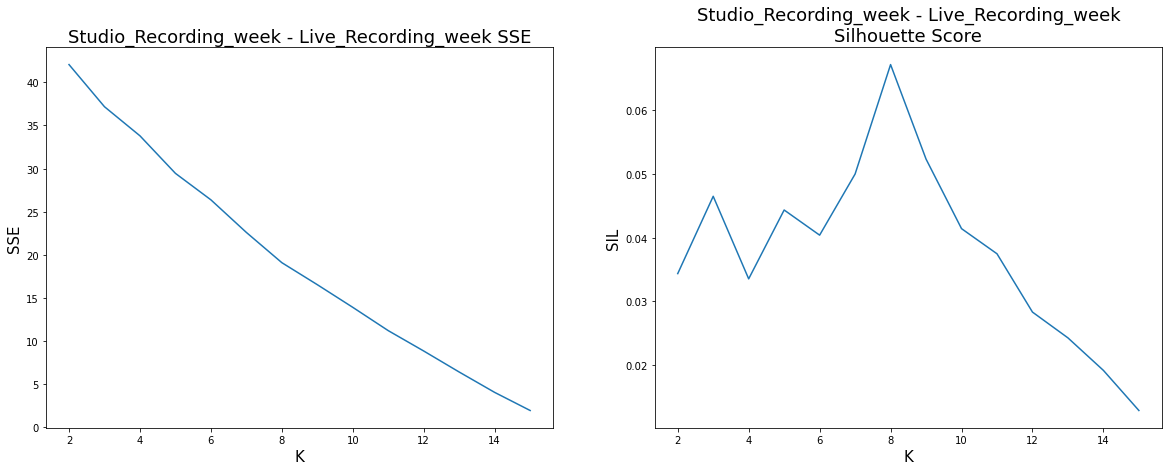

In [5219]:
find_optimal_k_kmeans(15, 'euclidean', tss_studio_live_scaled, False, album_type)

**We can see that best k is 8**

In [5220]:
cluster_centers_studio_live_eu, dict_label_studio_live_eu, labels_studio_live_eu = run_kmeans(8, 1000, 10, \
                                                            'euclidean', tss_studio_live_scaled, False)

cluster_centers_shape (8, 53, 1)

Labels:  {0: 1, 1: 3, 2: 2, 3: 3, 4: 2, 5: 2, 6: 2, 7: 1}

SSE:  19.077609874699917
Silhouette Score:  0.06722721491229254


In [5221]:
cluster_insight_studio_live(df_tss_studio_live_scaled, labels_studio_live_eu)

Dataset con le labels associate


1         2         3         4         5  \
track_date_created                                                     
2009_studio        -1.356042 -1.074198 -1.153467 -1.056583 -1.074198   
2010_studio        -0.326130  1.883945 -0.538452 -0.654264 -1.214021   
2011_studio         1.988787 -0.573283  1.002450  0.882165 -0.741681   
2012_studio         0.089181  4.084174 -0.883094 -0.421023 -0.035963   
2013_studio         1.414800  1.972080  0.414381 -0.747178 -0.539038   
2014_studio         0.435219  0.904371 -0.491914 -0.380211 -0.268508   
2015_studio        -0.717377 -0.717377 -1.272427 -0.851354 -0.085767   
2016_studio         1.829724  0.391530  0.083345 -0.101565  0.031981   
2009_live           2.335681 -1.082497 -0.787827  1.451669 -0.994096   
2010_live          -0.057063  1.106154  0.501281  1.385326  1.385326   
2011_live          -1.431474 -0.167005 -0.541663 -0.588495 -1.244145   
2012_live          -0.725356 -0.802475 -0.493999 -0.956713  1.742455   
2013_live          -0.012387 -0.668907 -0.967325 -0.012387 -1.027009   
2014_live           0.993420  0.397047  0.652635 -0.369719  3.890092   
2015_live          -0.791993  0.580704  0.219468  0.002726  0.508457   
2016_live           0.859194  0.705352 -0.448464 -0.217701  0.859194   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -1.188697 -1.232736 -0.950891 -0.845200 -0.625009  ...   
2010_studio         0.774082  0.359089 -0.461244 -0.316479  0.687223  ...   
2011_studio        -0.272570  1.664017  1.844445  1.820388 -0.753710  ...   
2012_studio         1.696805 -0.132228 -0.064843  1.330998 -0.055216  ...   
2013_studio         0.233097 -1.029176 -0.841178  0.756806  0.159241  ...   
2014_studio         0.669795  1.686291 -0.503084  1.328842 -1.296174  ...   
2015_studio         1.282719  0.622400 -0.018779 -0.162326 -0.736516  ...   
2016_studio        -0.348113  0.946262  1.850270  1.346902 -1.087756  ...   
2009_live          -1.053030 -0.876228  1.510603  0.714993  0.449790  ...   
2010_live           0.687396  0.082523  0.222109 -0.615408 -0.568879  ...   
2011_live          -1.478306  1.799946 -0.869488 -0.494831 -1.337810  ...   
2012_live          -0.378320  3.053479 -0.262641 -0.802475 -1.033832  ...   
2013_live          -0.907642  0.524765  1.718438  0.047296 -1.027009  ...   
2014_live           0.652635  2.271364  2.867737  0.141458 -0.795701  ...   
2015_live          -0.069521  0.074974  0.508457  1.014187  0.074974  ...   
2016_live           1.397641 -0.371543 -0.371543  3.012983 -0.833070  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_studio        -0.131782  0.837057 -0.651432  0.167677  0.828249   
2010_studio         0.050258 -0.229621  0.378391  0.831988  1.034658   
2011_studio        -0.621397 -0.621397 -0.368798 -0.777767  1.495618   
2012_studio        -0.565420 -0.806082  0.233579  0.753409 -0.392143   
2013_studio        -0.089185 -0.411468  0.186098  0.877662  1.575941   
2014_studio        -0.625957  0.100111  0.949052  0.256495  0.904371   
2015_studio         0.928635 -0.152756 -0.104907 -0.439851  0.517132   
2016_studio        -0.286476 -1.087756  0.514804 -1.601396  0.257983   
2009_live          -0.728893 -0.758360 -0.051150 -1.170898 -0.434222   
2010_live          -0.754994  0.175580 -1.034166 -0.522350 -0.382764   
2011_live           0.160820  0.722806 -0.682159 -0.167005 -0.447998   
2012_live          -0.918154 -0.725356 -0.763915 -0.185522 -0.224082   
2013_live           0.465082 -0.251122 -0.967325 -0.967325  0.644133   
2014_live           0.056262 -0.795701 -0.795701 -0.710504  0.056262   
2015_live          -0.286262  0.291715 -0.430757 -0.791993 -0.430757   
2016_live          -0.371543  1.397641 -0.909991 -0.679227  0.628430   

                          50        51        

Cluster 0
 ['2010_studio']

Cluster 1
 ['2011_studio', '2009_live', '2013_live']

Cluster 2
 ['2014_studio', '2016_live']

Cluster 3
 ['2009_studio', '2015_studio', '2012_live']

Cluster 4
 ['2016_studio', '2014_live']

Cluster 5
 ['2010_live', '2011_live']

Cluster 6
 ['2012_studio', '2013_studio']

Cluster 7
 ['2015_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                1              0            1  -0.0000  1.0000
Cluster 1                1              2            3   0.9183  0.6667
Cluster 2                1              1            2   1.0000  0.5000
Cluster 3                2              1            3   0.9183  0.6667
Cluster 4                1              1            2   1.0000  0.5000
Cluster 5                0              2            2  -0.0000  1.0000
Cluster 6                2              0            2  -0.0000  1.0000
Cluster 7                0              1            1  -0.0000  1.0000
Total                    8              8           16   0.5944  0.7500

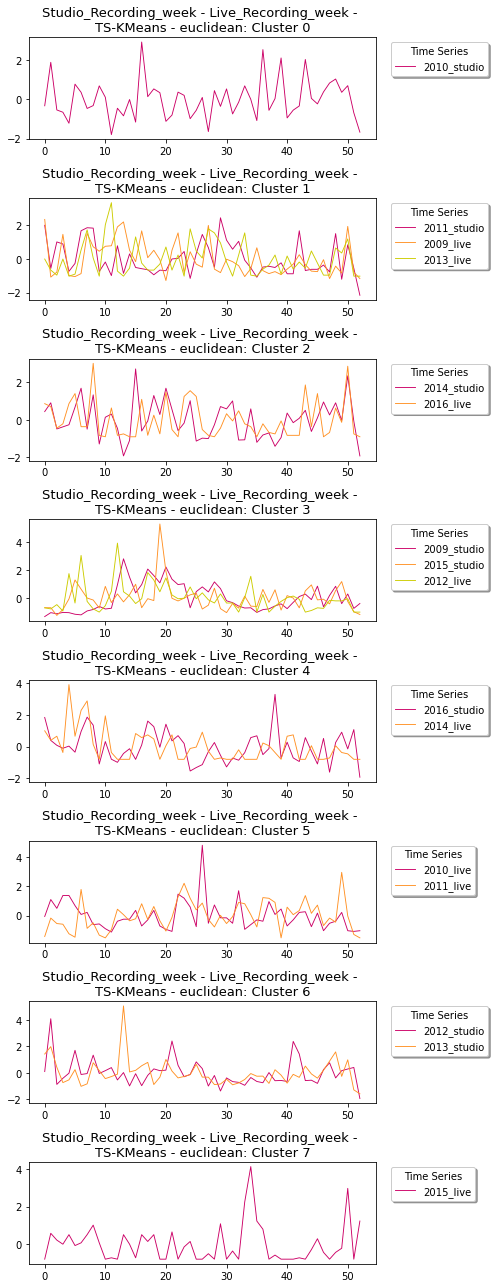

In [5222]:
analyze_clusters(labels_studio_live_eu, tss_studio_live_scaled, df_tss_studio_live_scaled, album_type, \
                 '\nTS-KMeans - euclidean', True)

**Centroids**

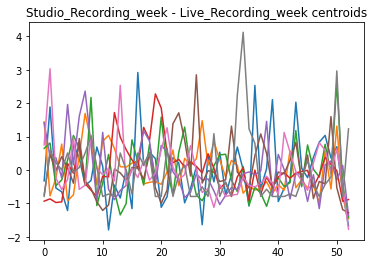

In [5223]:
plot_kmeans_centroids(cluster_centers_studio_live_eu, album_type)

<h3>DTW distance</h3>

k:  2 SSE:  15.412872353857697 Silhouette Score:  0.04616877469403002

k:  3 SSE:  13.474937691194954 Silhouette Score:  0.04371876618075132

k:  4 SSE:  11.6498576594979 Silhouette Score:  0.019024120647406988

k:  5 SSE:  10.25616196315946 Silhouette Score:  0.0669233516803105

k:  6 SSE:  8.599891905887581 Silhouette Score:  0.06130263969549907

k:  7 SSE:  7.366745835008055 Silhouette Score:  0.05960437696267523

k:  8 SSE:  6.3654965229583285 Silhouette Score:  0.05275935332585677

k:  9 SSE:  5.517372268300176 Silhouette Score:  0.05189174817822073

k:  10 SSE:  4.469277060888838 Silhouette Score:  0.03570339071834005

k:  11 SSE:  3.5074648436238336 Silhouette Score:  0.03584572841149307

k:  12 SSE:  2.575948099697287 Silhouette Score:  0.038196805945212596

k:  13 SSE:  1.7759750943653885 Silhouette Score:  0.03399162852177491

k:  14 SSE:  1.055185109923472 Silhouette Score:  0.027041285846173813

k:  15 SSE:  0.47546936115307303 Silhouette Score:  0.019317102636773307



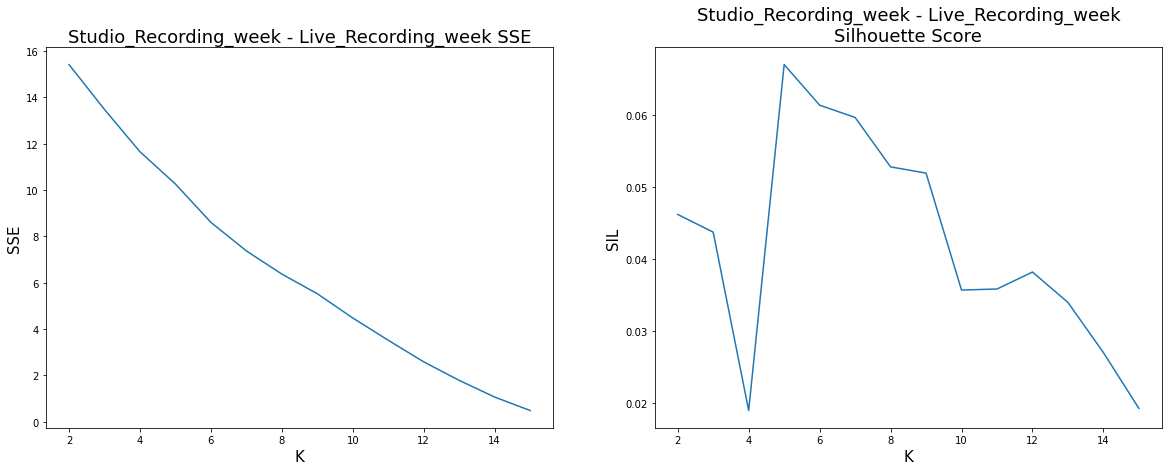

In [5224]:
find_optimal_k_kmeans(15, 'dtw', tss_studio_live_scaled, False, album_type)

**We can see that best k is 7**

In [5225]:
cluster_centers_studio_live_dtw, dict_label_studio_live_dtw, \
labels_studio_live_dtw = run_kmeans(5, 1000, 10, 'dtw', tss_studio_live_scaled, False)

cluster_centers_shape (5, 53, 1)

Labels:  {0: 2, 1: 2, 2: 4, 3: 4, 4: 4}

SSE:  10.25616196315946
Silhouette Score:  0.0669233516803105


In [5226]:
cluster_insight_studio_live(df_tss_studio_live_scaled, labels_studio_live_dtw)

Dataset con le labels associate


1         2         3         4         5  \
track_date_created                                                     
2009_studio        -1.356042 -1.074198 -1.153467 -1.056583 -1.074198   
2010_studio        -0.326130  1.883945 -0.538452 -0.654264 -1.214021   
2011_studio         1.988787 -0.573283  1.002450  0.882165 -0.741681   
2012_studio         0.089181  4.084174 -0.883094 -0.421023 -0.035963   
2013_studio         1.414800  1.972080  0.414381 -0.747178 -0.539038   
2014_studio         0.435219  0.904371 -0.491914 -0.380211 -0.268508   
2015_studio        -0.717377 -0.717377 -1.272427 -0.851354 -0.085767   
2016_studio         1.829724  0.391530  0.083345 -0.101565  0.031981   
2009_live           2.335681 -1.082497 -0.787827  1.451669 -0.994096   
2010_live          -0.057063  1.106154  0.501281  1.385326  1.385326   
2011_live          -1.431474 -0.167005 -0.541663 -0.588495 -1.244145   
2012_live          -0.725356 -0.802475 -0.493999 -0.956713  1.742455   
2013_live          -0.012387 -0.668907 -0.967325 -0.012387 -1.027009   
2014_live           0.993420  0.397047  0.652635 -0.369719  3.890092   
2015_live          -0.791993  0.580704  0.219468  0.002726  0.508457   
2016_live           0.859194  0.705352 -0.448464 -0.217701  0.859194   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -1.188697 -1.232736 -0.950891 -0.845200 -0.625009  ...   
2010_studio         0.774082  0.359089 -0.461244 -0.316479  0.687223  ...   
2011_studio        -0.272570  1.664017  1.844445  1.820388 -0.753710  ...   
2012_studio         1.696805 -0.132228 -0.064843  1.330998 -0.055216  ...   
2013_studio         0.233097 -1.029176 -0.841178  0.756806  0.159241  ...   
2014_studio         0.669795  1.686291 -0.503084  1.328842 -1.296174  ...   
2015_studio         1.282719  0.622400 -0.018779 -0.162326 -0.736516  ...   
2016_studio        -0.348113  0.946262  1.850270  1.346902 -1.087756  ...   
2009_live          -1.053030 -0.876228  1.510603  0.714993  0.449790  ...   
2010_live           0.687396  0.082523  0.222109 -0.615408 -0.568879  ...   
2011_live          -1.478306  1.799946 -0.869488 -0.494831 -1.337810  ...   
2012_live          -0.378320  3.053479 -0.262641 -0.802475 -1.033832  ...   
2013_live          -0.907642  0.524765  1.718438  0.047296 -1.027009  ...   
2014_live           0.652635  2.271364  2.867737  0.141458 -0.795701  ...   
2015_live          -0.069521  0.074974  0.508457  1.014187  0.074974  ...   
2016_live           1.397641 -0.371543 -0.371543  3.012983 -0.833070  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_studio        -0.131782  0.837057 -0.651432  0.167677  0.828249   
2010_studio         0.050258 -0.229621  0.378391  0.831988  1.034658   
2011_studio        -0.621397 -0.621397 -0.368798 -0.777767  1.495618   
2012_studio        -0.565420 -0.806082  0.233579  0.753409 -0.392143   
2013_studio        -0.089185 -0.411468  0.186098  0.877662  1.575941   
2014_studio        -0.625957  0.100111  0.949052  0.256495  0.904371   
2015_studio         0.928635 -0.152756 -0.104907 -0.439851  0.517132   
2016_studio        -0.286476 -1.087756  0.514804 -1.601396  0.257983   
2009_live          -0.728893 -0.758360 -0.051150 -1.170898 -0.434222   
2010_live          -0.754994  0.175580 -1.034166 -0.522350 -0.382764   
2011_live           0.160820  0.722806 -0.682159 -0.167005 -0.447998   
2012_live          -0.918154 -0.725356 -0.763915 -0.185522 -0.224082   
2013_live           0.465082 -0.251122 -0.967325 -0.967325  0.644133   
2014_live           0.056262 -0.795701 -0.795701 -0.710504  0.056262   
2015_live          -0.286262  0.291715 -0.430757 -0.791993 -0.430757   
2016_live          -0.371543  1.397641 -0.909991 -0.679227  0.628430   

                          50        51        

Cluster 0
 ['2010_studio', '2011_live']

Cluster 1
 ['2009_studio', '2012_live']

Cluster 2
 ['2011_studio', '2012_studio', '2016_studio', '2009_live']

Cluster 3
 ['2014_studio', '2013_live', '2015_live', '2016_live']

Cluster 4
 ['2013_studio', '2015_studio', '2010_live', '2014_live']



Studio_Recording Live_Recording  Tot_Cluster Entropy  Purity
Cluster 0                1              1            2  1.0000  0.5000
Cluster 1                1              1            2  1.0000  0.5000
Cluster 2                3              1            4  0.8113  0.7500
Cluster 3                1              3            4  0.8113  0.7500
Cluster 4                2              2            4  1.0000  0.5000
Total                    8              8           16  0.9056  0.6250

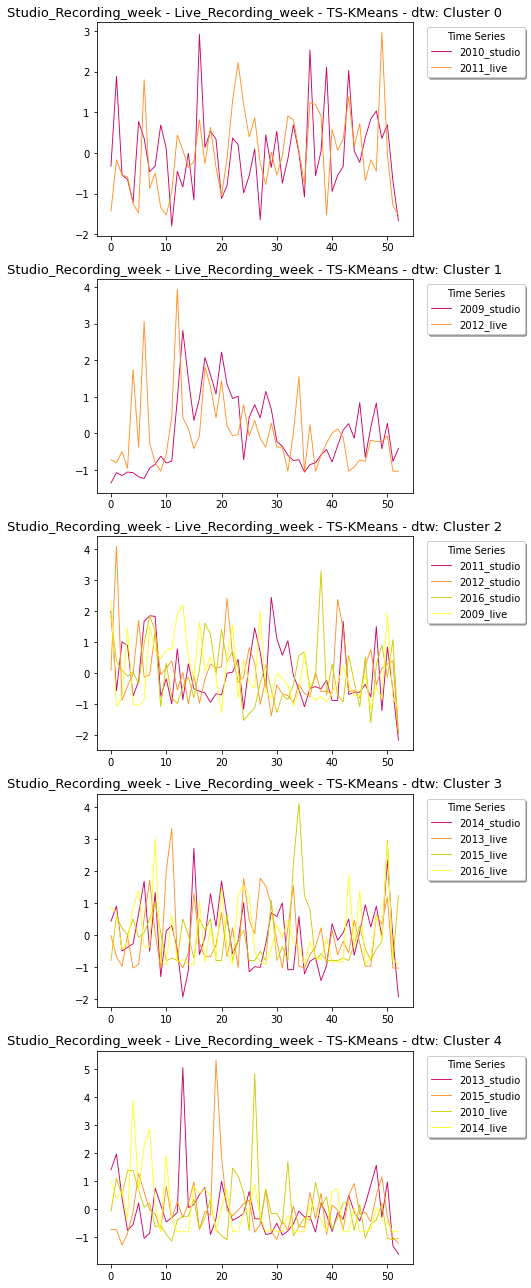

In [5227]:
analyze_clusters(labels_studio_live_dtw, tss_studio_live_scaled, df_tss_studio_live_scaled, album_type, \
                 'TS-KMeans - dtw', True)

**Centroids**

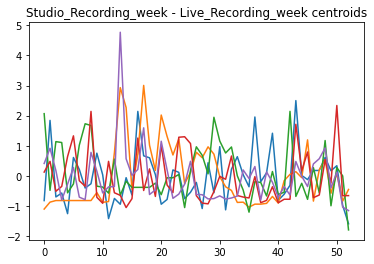

In [5228]:
plot_kmeans_centroids(cluster_centers_studio_live_dtw, album_type)

<h3>KMeans sklearn</h3>

k:  2 SSE:  673.0238523415136 Silhouette Score:  0.03432397840195117
Calinski-Harabaz:  1.5847259012308836 Davies-Bouldin:  2.942483724327716

k:  3 SSE:  594.7779011196344 Silhouette Score:  0.04649289680314379
Calinski-Harabaz:  1.6876660641997177 Davies-Bouldin:  2.2781088750705507

k:  4 SSE:  540.7615273227768 Silhouette Score:  0.03349836287415944
Calinski-Harabaz:  1.541863112753913 Davies-Bouldin:  2.065018872973884

k:  5 SSE:  471.07747241586935 Silhouette Score:  0.044335019310499504
Calinski-Harabaz:  1.623629060772417 Davies-Bouldin:  1.7568215302315664

k:  6 SSE:  421.8972985548738 Silhouette Score:  0.04037698235550345
Calinski-Harabaz:  1.5516064825866427 Davies-Bouldin:  1.538707637124929

k:  7 SSE:  361.37523213058483 Silhouette Score:  0.04999995853432627
Calinski-Harabaz:  1.609814357708574 Davies-Bouldin:  1.3263910229073879

k:  8 SSE:  305.24175799519867 Silhouette Score:  0.06722721491229255
Calinski-Harabaz:  1.6622508763914676 Davies-Bouldin:  1.154676930742

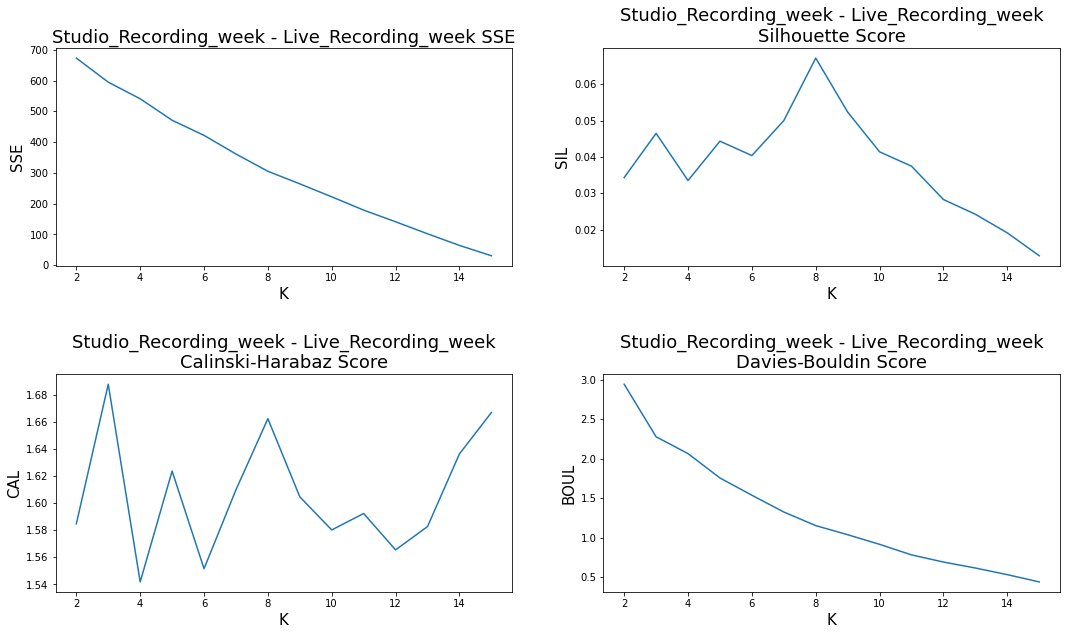

In [5229]:
find_optimal_k_kmeans(15, "", df_tss_studio_live_scaled, True, album_type)

In [5230]:
cluster_centers_studio_live_2, dict_label_studio_live_2, labels_studio_live_2 = run_kmeans(8, 1000, 10, '', \
                                                                        df_tss_studio_live_scaled, True)

cluster_centers_shape (8, 53)

Labels:  {0: 1, 1: 3, 2: 2, 3: 3, 4: 2, 5: 2, 6: 2, 7: 1}

SSE:  305.24175799519867
Silhouette Score:  0.06722721491229255
Calinski - Harabaz Score:  1.6622508763914676
Davies - Bouldin Score:  1.1546769307429825


In [5231]:
cluster_insight_studio_live(df_tss_studio_live_scaled, labels_studio_live_2)

Dataset con le labels associate


1         2         3         4         5  \
track_date_created                                                     
2009_studio        -1.356042 -1.074198 -1.153467 -1.056583 -1.074198   
2010_studio        -0.326130  1.883945 -0.538452 -0.654264 -1.214021   
2011_studio         1.988787 -0.573283  1.002450  0.882165 -0.741681   
2012_studio         0.089181  4.084174 -0.883094 -0.421023 -0.035963   
2013_studio         1.414800  1.972080  0.414381 -0.747178 -0.539038   
2014_studio         0.435219  0.904371 -0.491914 -0.380211 -0.268508   
2015_studio        -0.717377 -0.717377 -1.272427 -0.851354 -0.085767   
2016_studio         1.829724  0.391530  0.083345 -0.101565  0.031981   
2009_live           2.335681 -1.082497 -0.787827  1.451669 -0.994096   
2010_live          -0.057063  1.106154  0.501281  1.385326  1.385326   
2011_live          -1.431474 -0.167005 -0.541663 -0.588495 -1.244145   
2012_live          -0.725356 -0.802475 -0.493999 -0.956713  1.742455   
2013_live          -0.012387 -0.668907 -0.967325 -0.012387 -1.027009   
2014_live           0.993420  0.397047  0.652635 -0.369719  3.890092   
2015_live          -0.791993  0.580704  0.219468  0.002726  0.508457   
2016_live           0.859194  0.705352 -0.448464 -0.217701  0.859194   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -1.188697 -1.232736 -0.950891 -0.845200 -0.625009  ...   
2010_studio         0.774082  0.359089 -0.461244 -0.316479  0.687223  ...   
2011_studio        -0.272570  1.664017  1.844445  1.820388 -0.753710  ...   
2012_studio         1.696805 -0.132228 -0.064843  1.330998 -0.055216  ...   
2013_studio         0.233097 -1.029176 -0.841178  0.756806  0.159241  ...   
2014_studio         0.669795  1.686291 -0.503084  1.328842 -1.296174  ...   
2015_studio         1.282719  0.622400 -0.018779 -0.162326 -0.736516  ...   
2016_studio        -0.348113  0.946262  1.850270  1.346902 -1.087756  ...   
2009_live          -1.053030 -0.876228  1.510603  0.714993  0.449790  ...   
2010_live           0.687396  0.082523  0.222109 -0.615408 -0.568879  ...   
2011_live          -1.478306  1.799946 -0.869488 -0.494831 -1.337810  ...   
2012_live          -0.378320  3.053479 -0.262641 -0.802475 -1.033832  ...   
2013_live          -0.907642  0.524765  1.718438  0.047296 -1.027009  ...   
2014_live           0.652635  2.271364  2.867737  0.141458 -0.795701  ...   
2015_live          -0.069521  0.074974  0.508457  1.014187  0.074974  ...   
2016_live           1.397641 -0.371543 -0.371543  3.012983 -0.833070  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_studio        -0.131782  0.837057 -0.651432  0.167677  0.828249   
2010_studio         0.050258 -0.229621  0.378391  0.831988  1.034658   
2011_studio        -0.621397 -0.621397 -0.368798 -0.777767  1.495618   
2012_studio        -0.565420 -0.806082  0.233579  0.753409 -0.392143   
2013_studio        -0.089185 -0.411468  0.186098  0.877662  1.575941   
2014_studio        -0.625957  0.100111  0.949052  0.256495  0.904371   
2015_studio         0.928635 -0.152756 -0.104907 -0.439851  0.517132   
2016_studio        -0.286476 -1.087756  0.514804 -1.601396  0.257983   
2009_live          -0.728893 -0.758360 -0.051150 -1.170898 -0.434222   
2010_live          -0.754994  0.175580 -1.034166 -0.522350 -0.382764   
2011_live           0.160820  0.722806 -0.682159 -0.167005 -0.447998   
2012_live          -0.918154 -0.725356 -0.763915 -0.185522 -0.224082   
2013_live           0.465082 -0.251122 -0.967325 -0.967325  0.644133   
2014_live           0.056262 -0.795701 -0.795701 -0.710504  0.056262   
2015_live          -0.286262  0.291715 -0.430757 -0.791993 -0.430757   
2016_live          -0.371543  1.397641 -0.909991 -0.679227  0.628430   

                          50        51        

Cluster 0
 ['2010_studio']

Cluster 1
 ['2011_studio', '2009_live', '2013_live']

Cluster 2
 ['2014_studio', '2016_live']

Cluster 3
 ['2009_studio', '2015_studio', '2012_live']

Cluster 4
 ['2016_studio', '2014_live']

Cluster 5
 ['2010_live', '2011_live']

Cluster 6
 ['2012_studio', '2013_studio']

Cluster 7
 ['2015_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                1              0            1  -0.0000  1.0000
Cluster 1                1              2            3   0.9183  0.6667
Cluster 2                1              1            2   1.0000  0.5000
Cluster 3                2              1            3   0.9183  0.6667
Cluster 4                1              1            2   1.0000  0.5000
Cluster 5                0              2            2  -0.0000  1.0000
Cluster 6                2              0            2  -0.0000  1.0000
Cluster 7                0              1            1  -0.0000  1.0000
Total                    8              8           16   0.5944  0.7500

<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [5232]:
F = pd.DataFrame()
for ts in tss_studio_live_scaled:
    F = F.append(pd.DataFrame.from_dict(calculate_features(ts)), ignore_index=True)
F.index = df_tss_studio_live_scaled.index
F

avg       10p       25p       50p       75p  \
track_date_created                                                         
2009_studio         8.693256e-17 -1.070675 -0.783546 -0.351973  0.828249   
2010_studio         1.173066e-16 -1.109790 -0.654264 -0.007648  0.445948   
2011_studio         1.675808e-17 -0.934137 -0.693567 -0.440969  0.773909   
2012_studio         2.932665e-17 -0.937002 -0.603926 -0.132228  0.281711   
2013_studio        -5.446377e-17 -0.886834 -0.512181 -0.257041  0.233097   
2014_studio        -1.550123e-16 -1.133088 -0.704149 -0.067443  0.580433   
2015_studio         1.173066e-16 -0.843698 -0.717377 -0.152756  0.335305   
2016_studio         8.797994e-17 -1.120629 -0.717934 -0.101565  0.566168   
2009_live          -5.027425e-17 -1.041243 -0.787827 -0.316354  0.508724   
2010_live           5.446377e-17 -1.015555 -0.708465 -0.243178  0.361695   
2011_live          -4.608473e-17 -1.328443 -0.682159 -0.120173  0.722806   
2012_live           2.513713e-17 -1.033832 -0.725356 -0.185522  0.238633   
2013_live           1.675808e-17 -1.027009 -0.907642 -0.251122  0.465082   
2014_live          -1.675808e-17 -0.795701 -0.795701 -0.369719  0.567439   
2015_live           4.189521e-17 -0.791993 -0.791993 -0.286262  0.508457   
2016_live          -1.885284e-17 -0.909991 -0.833070 -0.371543  0.628430   

                         90p       iqr       skw        kur  
track_date_created                                           
2009_studio         1.300338  1.611796  0.773202  -0.211603  
2010_studio         0.994124  1.100212  0.820060   0.802229  
2011_studio         1.630337  1.467476  0.622268  -0.412200  
2012_studio         1.228957  0.885637  1.672794   4.249711  
2013_studio         0.958233  0.745278  2.531218  10.142587  
2014_studio         1.239480  1.284582  0.406073  -0.007321  
2015_studio         0.907582  1.052682  2.891756  12.727507  
2016_studio         1.328411  1.284102  0.661659   0.735953  
2009_live           1.634365  1.296550  0.836082  -0.432706  
2010_live           1.180600  1.070160  2.235329   7.973213  
2011_live           1.228594  1.404965  0.549977   0.141980  
2012_live           1.403131  0.963988  1.849744   4.039061  
2013_live           1.539387  1.372723  1.097978   0.792189  
2014_live           0.891185  1.363140  1.791369   3.594865  
2015_live           1.071985  1.300449  1.970380   4.682195  
2016_live           1.397641  1.461500  1.204227   0.738813

k:  2 SSE:  62.414136871756085 Silhouette Score:  0.6869598275746245
Calinski-Harabaz:  44.048972509302594 Davies-Bouldin:  0.38944253968446674

k:  3 SSE:  16.68973788543106 Silhouette Score:  0.7102888192197643
Calinski-Harabaz:  94.28904051337594 Davies-Bouldin:  0.33493656715491676

k:  4 SSE:  7.485935203118127 Silhouette Score:  0.6668885690360065
Calinski-Harabaz:  134.28128224671218 Davies-Bouldin:  0.31197799352084377

k:  5 SSE:  4.975658332782274 Silhouette Score:  0.6254361992453434
Calinski-Harabaz:  140.2814737286922 Davies-Bouldin:  0.17000749786658703

k:  6 SSE:  2.6264206509010832 Silhouette Score:  0.4403549873366698
Calinski-Harabaz:  195.0675790924481 Davies-Bouldin:  0.3475123429136293

k:  7 SSE:  1.9881446350959482 Silhouette Score:  0.315235248740411
Calinski-Harabaz:  193.75076931582612 Davies-Bouldin:  0.37675678367513254

k:  8 SSE:  1.4224373895086997 Silhouette Score:  0.2799915655838633
Calinski-Harabaz:  206.78288382982947 Davies-Bouldin:  0.382591515033

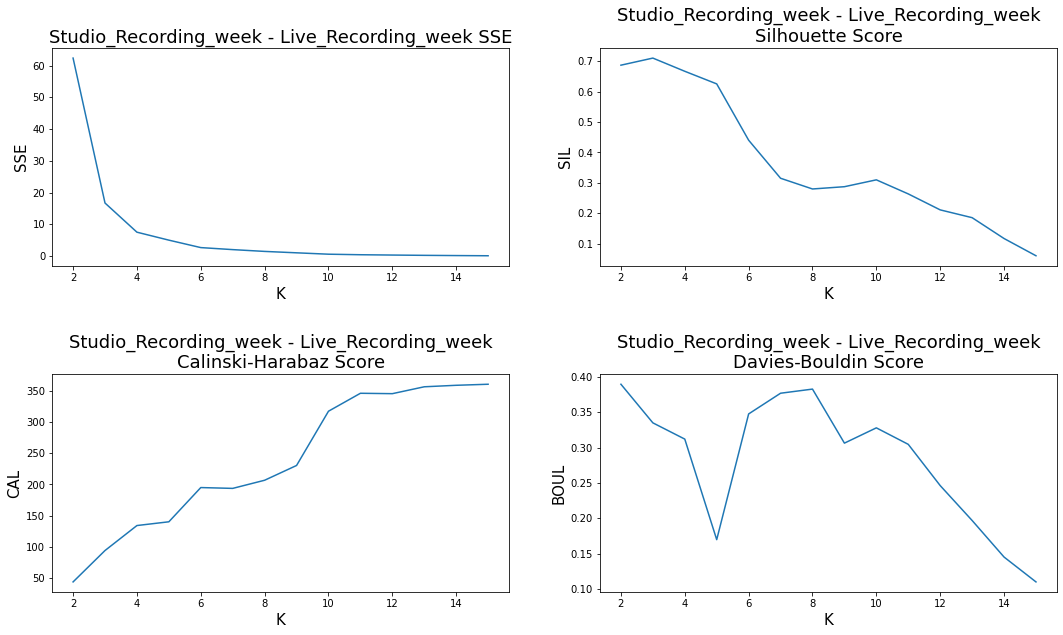

In [5233]:
find_optimal_k_kmeans(15, "", F, True, album_type)

In [5234]:
cluster_centers_studio_live_fb, dict_label_studio_live_fb, labels_studio_live_fb = run_kmeans(3, 1000, 10, "", F, \
                                                                                              True)

cluster_centers_shape (3, 9)

Labels:  {0: 9, 1: 3, 2: 4}

SSE:  16.68973788543106
Silhouette Score:  0.7102888192197643
Calinski - Harabaz Score:  94.28904051337594
Davies - Bouldin Score:  0.33493656715491676


In [5235]:
cluster_insight_studio_live(F, labels_studio_live_fb)

Dataset con le labels associate


avg       10p       25p       50p       75p  \
track_date_created                                                         
2009_studio         8.693256e-17 -1.070675 -0.783546 -0.351973  0.828249   
2010_studio         1.173066e-16 -1.109790 -0.654264 -0.007648  0.445948   
2011_studio         1.675808e-17 -0.934137 -0.693567 -0.440969  0.773909   
2012_studio         2.932665e-17 -0.937002 -0.603926 -0.132228  0.281711   
2013_studio        -5.446377e-17 -0.886834 -0.512181 -0.257041  0.233097   
2014_studio        -1.550123e-16 -1.133088 -0.704149 -0.067443  0.580433   
2015_studio         1.173066e-16 -0.843698 -0.717377 -0.152756  0.335305   
2016_studio         8.797994e-17 -1.120629 -0.717934 -0.101565  0.566168   
2009_live          -5.027425e-17 -1.041243 -0.787827 -0.316354  0.508724   
2010_live           5.446377e-17 -1.015555 -0.708465 -0.243178  0.361695   
2011_live          -4.608473e-17 -1.328443 -0.682159 -0.120173  0.722806   
2012_live           2.513713e-17 -1.033832 -0.725356 -0.185522  0.238633   
2013_live           1.675808e-17 -1.027009 -0.907642 -0.251122  0.465082   
2014_live          -1.675808e-17 -0.795701 -0.795701 -0.369719  0.567439   
2015_live           4.189521e-17 -0.791993 -0.791993 -0.286262  0.508457   
2016_live          -1.885284e-17 -0.909991 -0.833070 -0.371543  0.628430   

                         90p       iqr       skw        kur  Labels  
track_date_created                                                   
2009_studio         1.300338  1.611796  0.773202  -0.211603       0  
2010_studio         0.994124  1.100212  0.820060   0.802229       0  
2011_studio         1.630337  1.467476  0.622268  -0.412200       0  
2012_studio         1.228957  0.885637  1.672794   4.249711       2  
2013_studio         0.958233  0.745278  2.531218  10.142587       1  
2014_studio         1.239480  1.284582  0.406073  -0.007321       0  
2015_studio         0.907582  1.052682  2.891756  12.727507       1  
2016_studio         1.328411  1.284102  0.661659   0.735953       0  
2009_live           1.634365  1.296550  0.836082  -0.432706       0  
2010_live           1.180600  1.070160  2.235329   7.973213       1  
2011_live           1.228594  1.404965  0.549977   0.141980       0  
2012_live           1.403131  0.963988  1.849744   4.039061       2  
2013_live           1.539387  1.372723  1.097978   0.792189       0  
2014_live           0.891185  1.363140  1.791369   3.594865       2  
2015_live           1.071985  1.300449  1.970380   4.682195       2  
2016_live           1.397641  1.461500  1.204227   0.738813       0

Cluster 0
 ['2009_studio', '2010_studio', '2011_studio', '2014_studio', '2016_studio', '2009_live', '2011_live', '2013_live', '2016_live']

Cluster 1
 ['2013_studio', '2015_studio', '2010_live']

Cluster 2
 ['2012_studio', '2012_live', '2014_live', '2015_live']



Studio_Recording Live_Recording  Tot_Cluster Entropy  Purity
Cluster 0                5              4            9  0.9911  0.5556
Cluster 1                2              1            3  0.9183  0.6667
Cluster 2                1              3            4  0.8113  0.7500
Total                    8              8           16  0.9325  0.6250

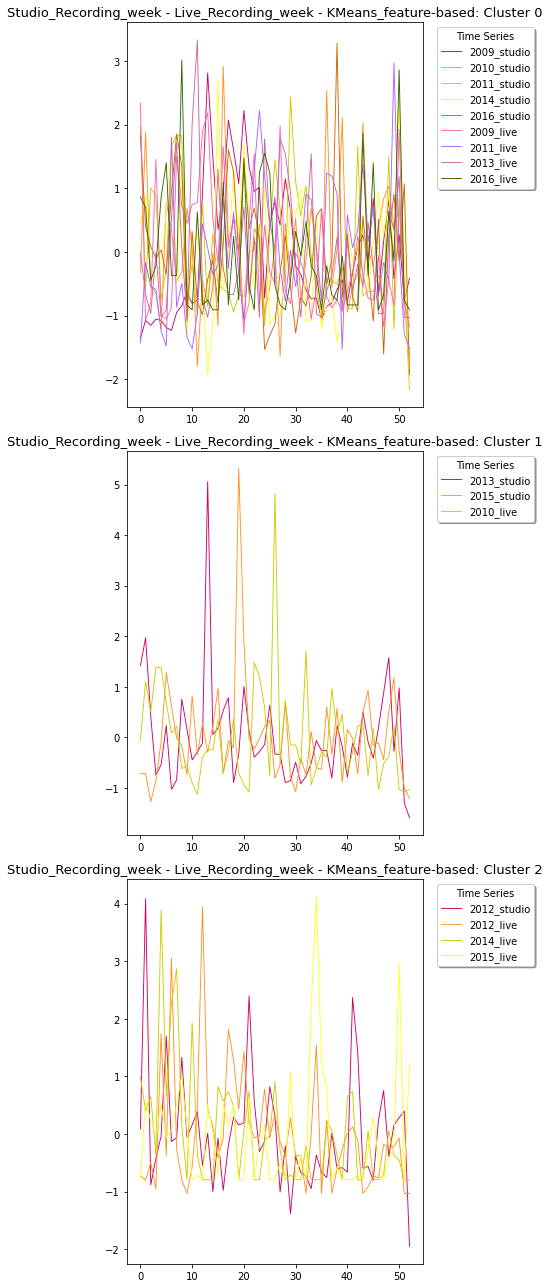

In [5236]:
analyze_clusters(labels_studio_live_fb, tss_studio_live_scaled, F, album_type, 'KMeans_feature-based', True)

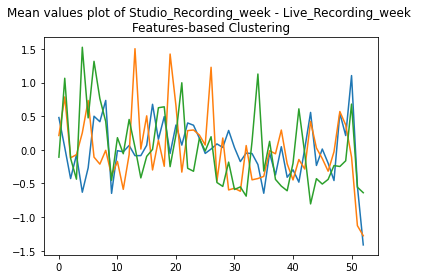

In [5237]:
plot_mean_values(labels_studio_live_fb, tss_studio_live_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [5238]:
M = pairwise_distances(tss_studio_live_scaled.reshape(tss_studio_live_scaled.shape[0], \
                                        tss_studio_live_scaled.shape[1]), metric=cdm_dist)

In [5239]:
print(tss_studio_live_scaled.shape, M.shape)

(16, 53, 1) (16, 16)


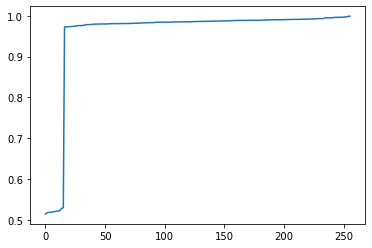

In [5240]:
plt.plot(sorted(M.ravel()))
plt.show()

In [5241]:
dbscan_compression_studio_live = DBSCAN(eps=0.98, min_samples=5, metric='precomputed')
dbscan_compression_studio_live.fit(M)

DBSCAN(eps=0.98, metric='precomputed')

In [5242]:
dbscan_compression_studio_live.labels_

array([ 0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0])

<h2>Approximation-based Clustering</h2>

<h3>PiecewiseAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [5243]:
n_paa_segments = 26
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_studio_live_scaled)

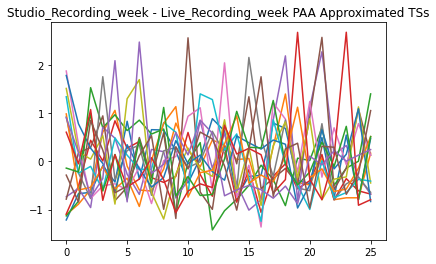

In [5244]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " PAA Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  11.485972759725067 Silhouette Score:  0.07573085094106112

k:  3 SSE:  9.730024656150512 Silhouette Score:  0.09809139951867822

k:  4 SSE:  8.449475361029739 Silhouette Score:  0.09823685252718756

k:  5 SSE:  7.4403002664858535 Silhouette Score:  0.0787509015101461

k:  6 SSE:  6.371011777941904 Silhouette Score:  0.08253443316512567

k:  7 SSE:  5.352273106088478 Silhouette Score:  0.08947437697157379

k:  8 SSE:  4.4075183275766845 Silhouette Score:  0.10985144091670361

k:  9 SSE:  3.475783461599213 Silhouette Score:  0.1150958471855627

k:  10 SSE:  2.7686015200966096 Silhouette Score:  0.11420235962253256

k:  11 SSE:  2.2531877385771297 Silhouette Score:  0.08980298422216713

k:  12 SSE:  1.744023916379045 Silhouette Score:  0.06874178061086843

k:  13 SSE:  1.2685861044990976 Silhouette Score:  0.05325892590967801

k:  14 SSE:  0.8087024907137592 Silhouette Score:  0.02934405203690045

k:  15 SSE:  0.38471477432622503 Silhouette Score:  0.012441870623338245



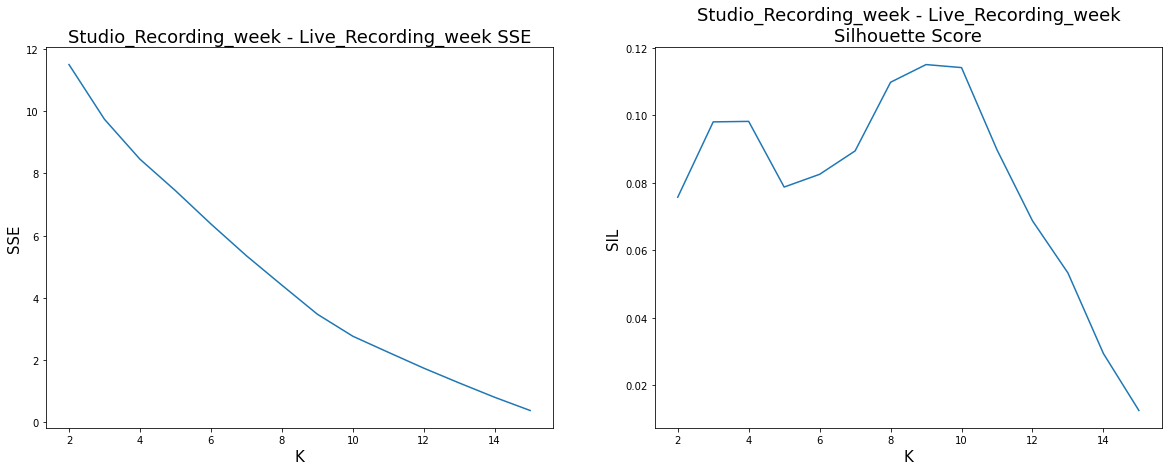

In [5245]:
find_optimal_k_kmeans(15, 'euclidean', X_paa, False, album_type)

In [5246]:
cluster_centers_studio_live_paa, dict_label_studio_live_paa, labels_studio_live_paa = run_kmeans(9, 1000, 10, \
                                                                'euclidean', X_paa, False)

cluster_centers_shape (9, 26, 1)

Labels:  {0: 1, 1: 2, 2: 3, 3: 2, 4: 1, 5: 1, 6: 2, 7: 3, 8: 1}

SSE:  3.475783461599213
Silhouette Score:  0.1150958471855627


Dataset con le labels associate


0         1         2         3         4  \
track_date_created                                                     
2009_studio        -1.215120 -1.105025 -1.131448 -1.091813 -0.735105   
2010_studio         0.778907 -0.596358 -0.219970 -0.051077  0.185372   
2011_studio         0.707752  0.942308 -0.507126  1.754231  0.533339   
2012_studio         2.086678 -0.652058  0.830421 -0.098535  0.637891   
2013_studio         1.693440 -0.166399 -0.152970 -0.935177  0.458024   
2014_studio         0.669795 -0.436063  0.200644  0.591603  0.016334   
2015_studio        -0.717377 -1.061891  0.598476  0.301811 -0.449421   
2016_studio         1.110627 -0.009110 -0.158066  1.398266  0.129573   
2009_live           0.626592  0.331921 -1.023563  0.317188  0.582391   
2010_live           0.524545  0.943303  1.036361  0.152316 -0.592143   
2011_live          -0.799240 -0.565079 -1.361226  0.465229 -0.916320   
2012_live          -0.763915 -0.725356  0.682067  1.395419 -0.918154   
2013_live          -0.340647 -0.489856 -0.967325  1.121602 -0.489856   
2014_live           0.695233  0.141458  2.271364  2.569551 -0.327121   
2015_live          -0.105644  0.111097  0.219468  0.291715  0.544580   
2016_live           0.782273 -0.333083  1.128417 -0.371543  1.089957   

                           5         6         7         8         9  ...  \
track_date_created                                                    ...   
2009_studio        -0.783546  1.871953  0.920729  1.510840  1.339092  ...   
2010_studio        -0.842458 -0.644613 -0.581882  1.526859  0.436297  ...   
2011_studio        -0.591325 -0.044029 -0.110186 -0.615382 -0.807838  ...   
2012_studio         0.272085 -0.266999 -0.536541 -0.589486  0.223952  ...   
2013_studio        -0.367825  2.472289  0.118956  0.656093 -0.616251  ...   
2014_studio         0.217399 -1.195642  0.803839 -0.335530  0.787083  ...   
2015_studio         0.239607 -0.009209  0.598476 -0.392002  2.560292  ...   
2016_studio        -0.235112 -0.707661 -0.466250  0.853807  0.607259  ...   
2009_live           0.759194  2.041010  0.169853  0.862328  0.228787  ...   
2010_live          -1.010902 -0.312971  0.059258 -0.499086 -0.173385  ...   
2011_live          -1.244145  0.254484 -0.284086  0.277900  0.137404  ...   
2012_live          -0.050564  2.185889 -0.146963  0.874865  0.855585  ...   
2013_live           2.673376 -0.877800  0.375556 -0.460014 -0.489856  ...   
2014_live           0.780430 -0.795701  0.013664  0.652635 -0.156729  ...   
2015_live          -0.755869 -0.141768 -0.358510  0.327839 -0.141768  ...   
2016_live          -0.140780 -0.794609 -0.909991  0.128444 -0.256162  ...   

                          17        18        19        20        21  \
track_date_created                                                     
2009_studio        -0.889238 -0.827585 -0.514914 -0.558952  0.176485   
2010_studio        -0.538452  0.986403  1.073262 -0.745948  0.846464   
2011_studio        -0.813852 -0.465026 -0.374812 -0.886023  0.485225   
2012_studio        -0.512474 -0.372890 -0.594299  0.854487  0.411669   
2013_studio        -0.163041 -0.532323  0.021600 -0.455110  0.075313   
2014_studio        -0.313189 -0.760001 -1.184471  0.100111  0.290006   
2015_studio        -0.616893  0.134339 -0.157541  0.067350 -0.114477   
2016_studio         0.622668 -0.312158  1.280129 -0.214566 -0.183748   
2009_live           0.037251 -0.787827 -0.846761 -0.463689 -0.051150   
2010_live          -0.452557  0.291902  0.268637 -0.499086  0.245373   
2011_live          -0.354334  1.214544 -0.307502  0.324733  0.863303   
2012_live           0.257912 -0.397600 -0.436159  0.065115 -0.571118   
2013_live          -0.997167 -0.489856 -0.340647 -0.221280 -0.370489   
2014_live          -0.795701  0.141458 -0.582710  0.695233 -0.795701   
2015_live           2.675872  0.002726 -0.683622 -0.791993 -0.755869   
2016_live          -0.640767 -0.448464 -0.410004 -0.833070  0.513049   

                          22        23        

Cluster 0
 ['2013_live']

Cluster 1
 ['2013_studio', '2009_live']

Cluster 2
 ['2012_studio', '2014_studio', '2016_live']

Cluster 3
 ['2010_studio', '2016_studio']

Cluster 4
 ['2011_live']

Cluster 5
 ['2015_live']

Cluster 6
 ['2011_studio', '2010_live']

Cluster 7
 ['2009_studio', '2015_studio', '2012_live']

Cluster 8
 ['2014_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                0              1            1  -0.0000  1.0000
Cluster 1                1              1            2   1.0000  0.5000
Cluster 2                2              1            3   0.9183  0.6667
Cluster 3                2              0            2  -0.0000  1.0000
Cluster 4                0              1            1  -0.0000  1.0000
Cluster 5                0              1            1  -0.0000  1.0000
Cluster 6                1              1            2   1.0000  0.5000
Cluster 7                2              1            3   0.9183  0.6667
Cluster 8                0              1            1  -0.0000  1.0000
Total                    8              8           16   0.5944  0.7500

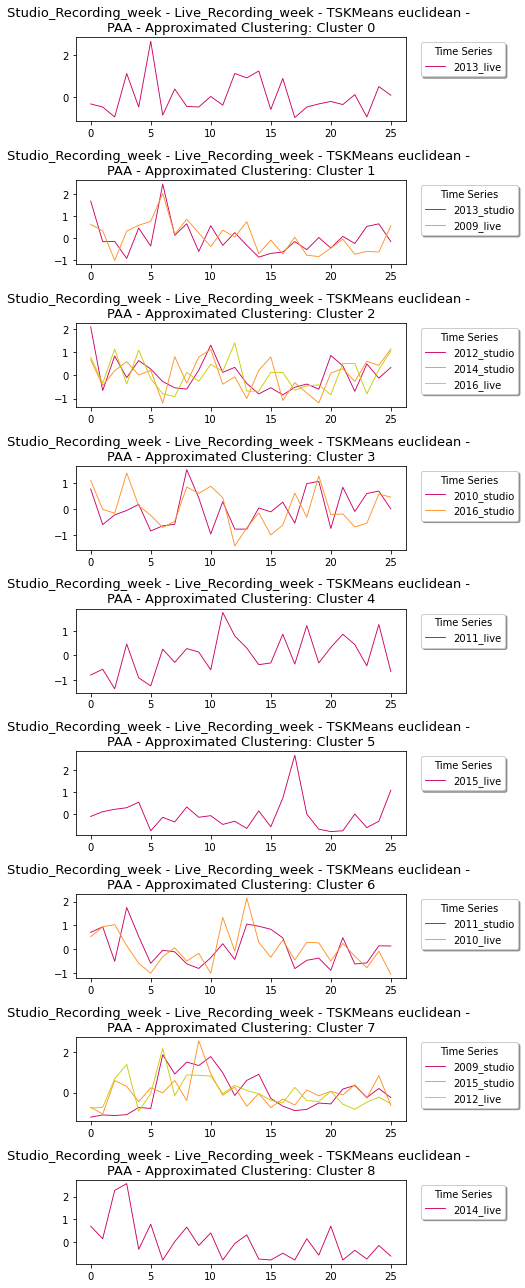

In [5247]:
analyze_approximated_clusters(labels_studio_live_paa, X_paa, df_tss_studio_live_scaled, album_type, \
                               'TSKMeans euclidean - \nPAA - Approximated Clustering', True)

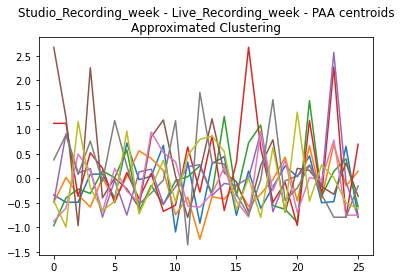

In [5248]:
plot_centroids_approximated(cluster_centers_studio_live_paa, X_paa, album_type, 'PAA')

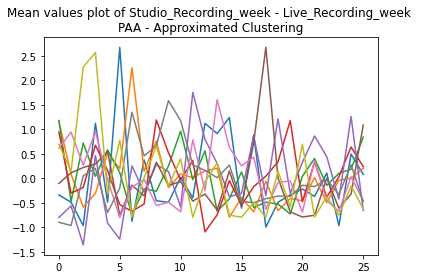

In [5249]:
plot_mean_values_approximated(labels_studio_live_paa, X_paa, album_type, 'PAA')

<h3>DTW</h3>

k:  2 SSE:  4.289407829375468 Silhouette Score:  0.19065092723071425

k:  3 SSE:  3.486364930820402 Silhouette Score:  0.12144936675061381

k:  4 SSE:  2.8998739323072797 Silhouette Score:  0.10876907902247857

k:  5 SSE:  2.444178136760737 Silhouette Score:  0.074648501162124

k:  6 SSE:  2.097941748154021 Silhouette Score:  0.09596587685719829

k:  7 SSE:  1.7709955322149686 Silhouette Score:  0.07882638207629375

k:  8 SSE:  1.5037064899756318 Silhouette Score:  0.0884035604294837

k:  9 SSE:  1.262140404287149 Silhouette Score:  0.08623565972567526

k:  10 SSE:  1.054558500141138 Silhouette Score:  0.06884432002556742

k:  11 SSE:  0.8322896286014951 Silhouette Score:  0.06067839070188109

k:  12 SSE:  0.6098826066254208 Silhouette Score:  0.037799239587402694

k:  13 SSE:  0.46710330549655665 Silhouette Score:  0.025415713498634484

k:  14 SSE:  0.28055190681521514 Silhouette Score:  0.025285986586397295

k:  15 SSE:  0.10241661612177634 Silhouette Score:  0.017932273164537986



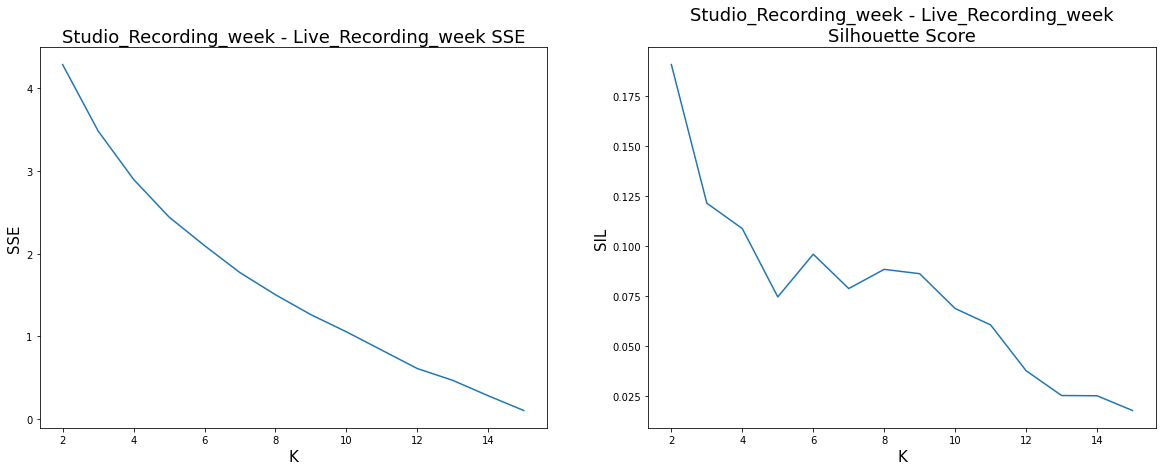

In [5250]:
find_optimal_k_kmeans(15, 'dtw', X_paa, False, album_type)

In [5251]:
cluster_centers_studio_live_paa_dtw, dict_label_studio_live_paa_dtw, \
labels_studio_live_paa_dtw = run_kmeans(3, 1000, 10, 'dtw', X_paa, False)

cluster_centers_shape (3, 26, 1)

Labels:  {0: 5, 1: 4, 2: 7}

SSE:  3.486364930820402
Silhouette Score:  0.12144936675061381


Dataset con le labels associate


0         1         2         3         4  \
track_date_created                                                     
2009_studio        -1.215120 -1.105025 -1.131448 -1.091813 -0.735105   
2010_studio         0.778907 -0.596358 -0.219970 -0.051077  0.185372   
2011_studio         0.707752  0.942308 -0.507126  1.754231  0.533339   
2012_studio         2.086678 -0.652058  0.830421 -0.098535  0.637891   
2013_studio         1.693440 -0.166399 -0.152970 -0.935177  0.458024   
2014_studio         0.669795 -0.436063  0.200644  0.591603  0.016334   
2015_studio        -0.717377 -1.061891  0.598476  0.301811 -0.449421   
2016_studio         1.110627 -0.009110 -0.158066  1.398266  0.129573   
2009_live           0.626592  0.331921 -1.023563  0.317188  0.582391   
2010_live           0.524545  0.943303  1.036361  0.152316 -0.592143   
2011_live          -0.799240 -0.565079 -1.361226  0.465229 -0.916320   
2012_live          -0.763915 -0.725356  0.682067  1.395419 -0.918154   
2013_live          -0.340647 -0.489856 -0.967325  1.121602 -0.489856   
2014_live           0.695233  0.141458  2.271364  2.569551 -0.327121   
2015_live          -0.105644  0.111097  0.219468  0.291715  0.544580   
2016_live           0.782273 -0.333083  1.128417 -0.371543  1.089957   

                           5         6         7         8         9  ...  \
track_date_created                                                    ...   
2009_studio        -0.783546  1.871953  0.920729  1.510840  1.339092  ...   
2010_studio        -0.842458 -0.644613 -0.581882  1.526859  0.436297  ...   
2011_studio        -0.591325 -0.044029 -0.110186 -0.615382 -0.807838  ...   
2012_studio         0.272085 -0.266999 -0.536541 -0.589486  0.223952  ...   
2013_studio        -0.367825  2.472289  0.118956  0.656093 -0.616251  ...   
2014_studio         0.217399 -1.195642  0.803839 -0.335530  0.787083  ...   
2015_studio         0.239607 -0.009209  0.598476 -0.392002  2.560292  ...   
2016_studio        -0.235112 -0.707661 -0.466250  0.853807  0.607259  ...   
2009_live           0.759194  2.041010  0.169853  0.862328  0.228787  ...   
2010_live          -1.010902 -0.312971  0.059258 -0.499086 -0.173385  ...   
2011_live          -1.244145  0.254484 -0.284086  0.277900  0.137404  ...   
2012_live          -0.050564  2.185889 -0.146963  0.874865  0.855585  ...   
2013_live           2.673376 -0.877800  0.375556 -0.460014 -0.489856  ...   
2014_live           0.780430 -0.795701  0.013664  0.652635 -0.156729  ...   
2015_live          -0.755869 -0.141768 -0.358510  0.327839 -0.141768  ...   
2016_live          -0.140780 -0.794609 -0.909991  0.128444 -0.256162  ...   

                          17        18        19        20        21  \
track_date_created                                                     
2009_studio        -0.889238 -0.827585 -0.514914 -0.558952  0.176485   
2010_studio        -0.538452  0.986403  1.073262 -0.745948  0.846464   
2011_studio        -0.813852 -0.465026 -0.374812 -0.886023  0.485225   
2012_studio        -0.512474 -0.372890 -0.594299  0.854487  0.411669   
2013_studio        -0.163041 -0.532323  0.021600 -0.455110  0.075313   
2014_studio        -0.313189 -0.760001 -1.184471  0.100111  0.290006   
2015_studio        -0.616893  0.134339 -0.157541  0.067350 -0.114477   
2016_studio         0.622668 -0.312158  1.280129 -0.214566 -0.183748   
2009_live           0.037251 -0.787827 -0.846761 -0.463689 -0.051150   
2010_live          -0.452557  0.291902  0.268637 -0.499086  0.245373   
2011_live          -0.354334  1.214544 -0.307502  0.324733  0.863303   
2012_live           0.257912 -0.397600 -0.436159  0.065115 -0.571118   
2013_live          -0.997167 -0.489856 -0.340647 -0.221280 -0.370489   
2014_live          -0.795701  0.141458 -0.582710  0.695233 -0.795701   
2015_live           2.675872  0.002726 -0.683622 -0.791993 -0.755869   
2016_live          -0.640767 -0.448464 -0.410004 -0.833070  0.513049   

                          22        23        

Cluster 0
 ['2013_studio', '2009_live', '2010_live', '2013_live', '2014_live']

Cluster 1
 ['2009_studio', '2015_studio', '2011_live', '2012_live']

Cluster 2
 ['2010_studio', '2011_studio', '2012_studio', '2014_studio', '2016_studio', '2015_live', '2016_live']



Studio_Recording Live_Recording  Tot_Cluster Entropy  Purity
Cluster 0                1              4            5  0.7219  0.8000
Cluster 1                2              2            4  1.0000  0.5000
Cluster 2                5              2            7  0.8631  0.7143
Total                    8              8           16  0.8532  0.6875

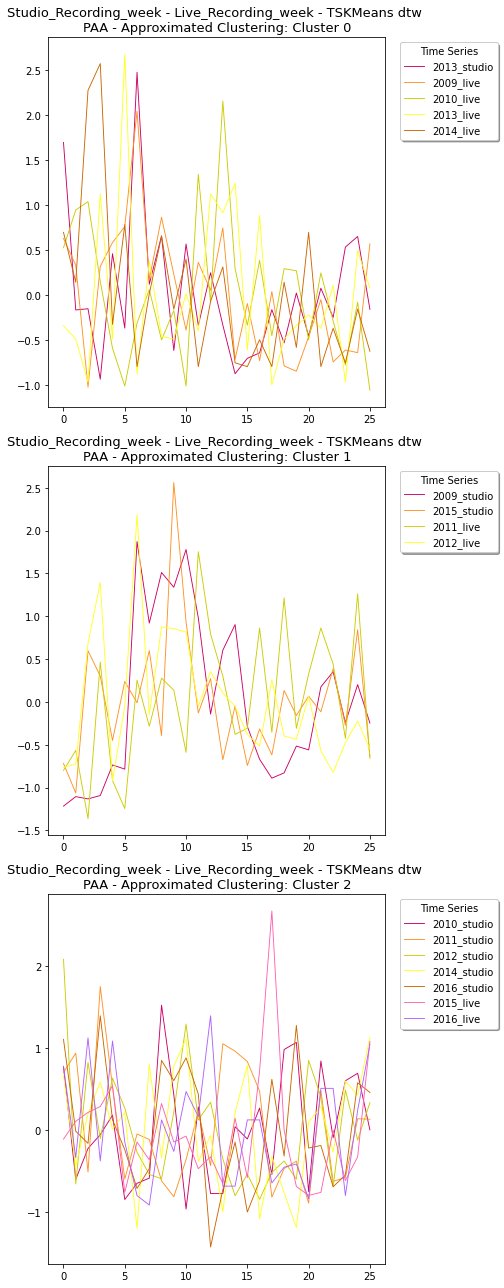

In [5252]:
analyze_approximated_clusters(labels_studio_live_paa_dtw, X_paa, df_tss_studio_live_scaled, album_type, \
                               'TSKMeans dtw \nPAA - Approximated Clustering', True)

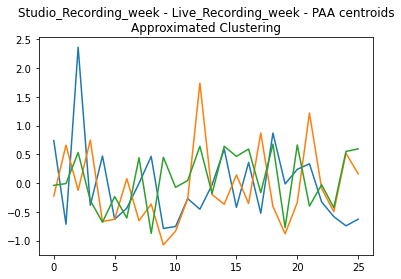

In [5253]:
plot_centroids_approximated(cluster_centers_studio_live_paa_dtw, X_paa, album_type, 'PAA')

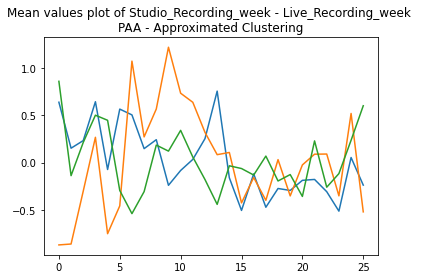

In [5254]:
plot_mean_values_approximated(labels_studio_live_paa_dtw, X_paa, album_type, 'PAA')

<h3>OneD_SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [5255]:
n_sax1d_segments = 26
n_sax_symbols_avg = 10
n_sax_symbols_slope = 4

one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_sax1d_segments,\
     alphabet_size_avg=n_sax_symbols_avg, alphabet_size_slope=n_sax_symbols_slope)

X_sax1d = one_d_sax.fit_transform(tss_studio_live_scaled)

<h3>EUCLIDEAN</h3>

k:  2 SSE:  159.8666666666667 Silhouette Score:  0.05877167775782842

k:  3 SSE:  142.26988636363635 Silhouette Score:  0.059115938177721775

k:  4 SSE:  126.77023809523808 Silhouette Score:  0.04416219147075619

k:  5 SSE:  109.26041666666666 Silhouette Score:  0.0648267897391141

k:  6 SSE:  94.92708333333333 Silhouette Score:  0.054529311409248236

k:  7 SSE:  83.43229166666666 Silhouette Score:  0.051175887210346015

k:  8 SSE:  71.21354166666664 Silhouette Score:  0.05793729766927818

k:  9 SSE:  60.666666666666664 Silhouette Score:  0.05594063022902658

k:  10 SSE:  50.072916666666664 Silhouette Score:  0.048748224476028626

k:  11 SSE:  40.979166666666664 Silhouette Score:  0.03872982668645715

k:  12 SSE:  32.135416666666664 Silhouette Score:  0.029575330640759175

k:  13 SSE:  23.28125 Silhouette Score:  0.021808200125576792

k:  14 SSE:  15.343749999999998 Silhouette Score:  0.009667527981831282

k:  15 SSE:  7.562499999999999 Silhouette Score:  0.0033657203370500055



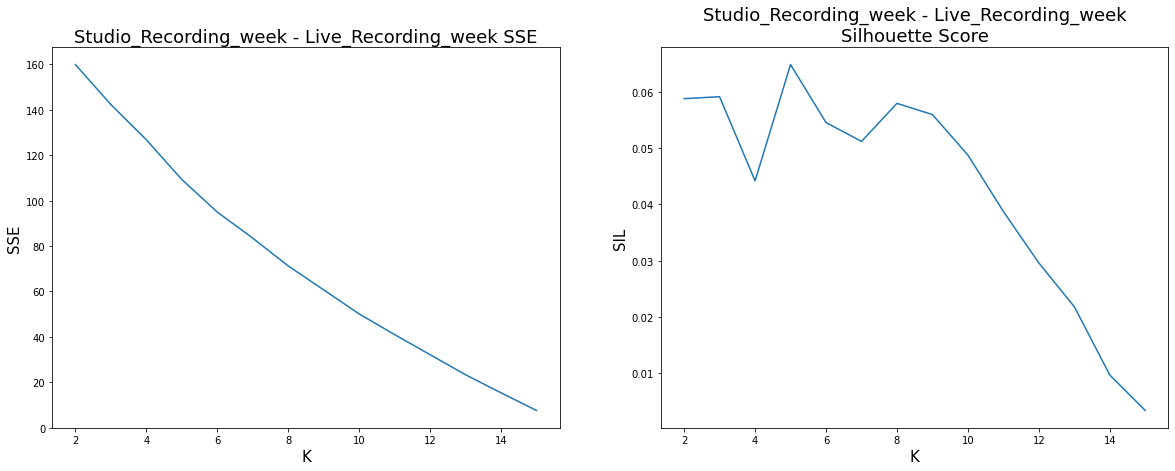

In [5256]:
find_optimal_k_kmeans(15, 'euclidean', X_sax1d, False, album_type)

In [5257]:
cluster_centers_studio_live_sax1d, dict_label_studio_live_sax1d, \
labels_studio_live_sax1d = run_kmeans(5, 1000, 10, 'euclidean', X_sax1d, False)

cluster_centers_shape (5, 26, 2)

Labels:  {0: 2, 1: 3, 2: 4, 3: 4, 4: 3}

SSE:  109.26041666666666
Silhouette Score:  0.0648267897391141


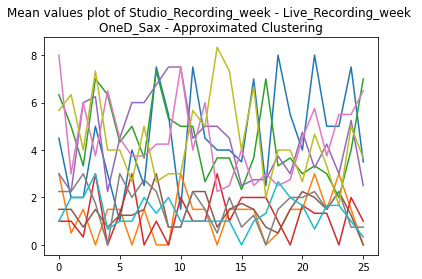

In [5258]:
plot_mean_values_approximated(labels_studio_live_sax1d, X_sax1d, album_type, 'OneD_Sax')

<h3>DTW</h3>

k:  2 SSE:  96.07418414918415 Silhouette Score:  0.052850350624087876

k:  3 SSE:  82.67922528860028 Silhouette Score:  0.03817711141177376

k:  4 SSE:  75.9875496031746 Silhouette Score:  0.04195638795207593

k:  5 SSE:  67.6937996031746 Silhouette Score:  0.03859062067154592

k:  6 SSE:  57.46989087301586 Silhouette Score:  0.04460104742167824

k:  7 SSE:  50.613392857142856 Silhouette Score:  0.025390640249386188

k:  8 SSE:  43.625595238095244 Silhouette Score:  0.02788793405710706

k:  9 SSE:  37.93958333333333 Silhouette Score:  0.03847273819253622

k:  10 SSE:  30.457812500000003 Silhouette Score:  0.015058801080556974

k:  11 SSE:  25.957291666666663 Silhouette Score:  0.02541501623192961

k:  12 SSE:  19.25 Silhouette Score:  0.02072872524326578

k:  13 SSE:  14.276041666666668 Silhouette Score:  0.014445458372353951

k:  14 SSE:  9.036458333333332 Silhouette Score:  0.006746719238705191

k:  15 SSE:  4.510416666666666 Silhouette Score:  0.004371732322553331



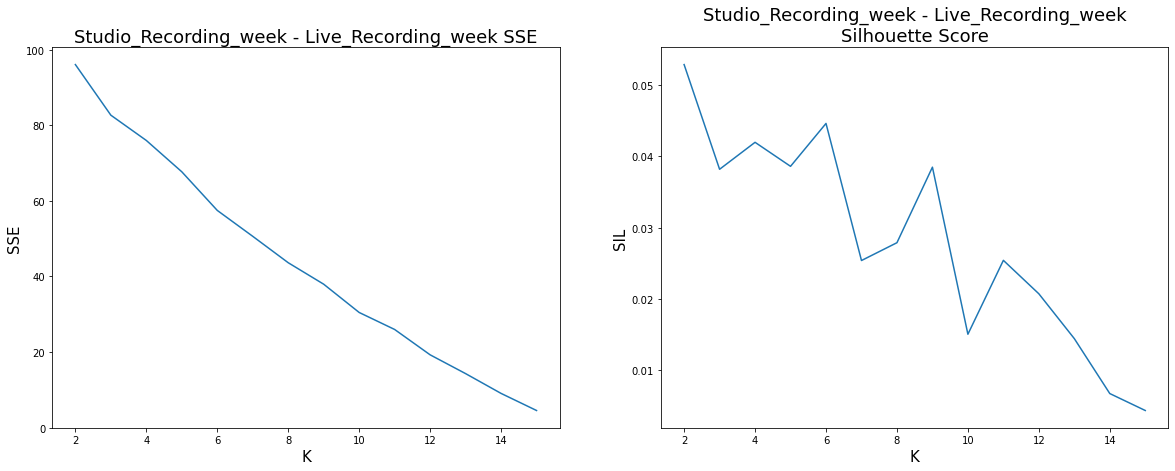

In [5259]:
find_optimal_k_kmeans(15, 'dtw', X_sax1d, False, album_type)

In [5260]:
cluster_centers_studio_live_sax1d_dtw, dict_label_studio_live_sax1d_dtw, \
labels_studio_live_sax1d_dtw = run_kmeans(6, 1000, 10, 'dtw', X_sax1d, False)

cluster_centers_shape (6, 26, 2)

Labels:  {0: 4, 1: 3, 2: 1, 3: 3, 4: 1, 5: 4}

SSE:  57.46989087301586
Silhouette Score:  0.04460104742167824


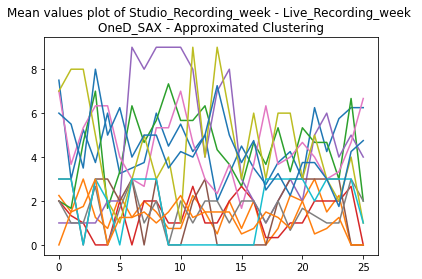

In [5261]:
plot_mean_values_approximated(labels_studio_live_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

<h3>SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [5262]:
n_sax_segments = 26
n_sax_symbols = 10

sax = SymbolicAggregateApproximation(n_segments=n_sax_segments, \
                                     alphabet_size_avg=n_sax_symbols)

X_sax = sax.fit_transform(tss_studio_live_scaled)

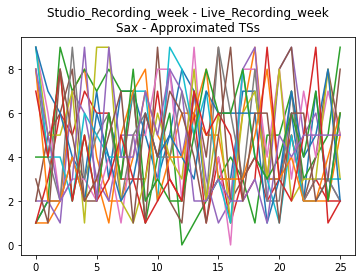

In [5263]:
plt.plot(X_sax.reshape(X_sax.shape[1], X_sax.shape[0]))
plt.title(album_type + "\nSax - Approximated TSs")
plt.show()

<h3>EUCLIDEAN</h3>

k:  2 SSE:  112.56770833333333 Silhouette Score:  0.09966480883522563

k:  3 SSE:  98.68660714285713 Silhouette Score:  0.06791852838490592

k:  4 SSE:  86.953125 Silhouette Score:  0.07029396544219847

k:  5 SSE:  73.45833333333334 Silhouette Score:  0.0844636343864302

k:  6 SSE:  64.71354166666666 Silhouette Score:  0.07054204050616103

k:  7 SSE:  54.31770833333333 Silhouette Score:  0.08094164361871292

k:  8 SSE:  44.921875 Silhouette Score:  0.08629107553927423

k:  9 SSE:  36.91666666666667 Silhouette Score:  0.09438140678627346

k:  10 SSE:  30.84375 Silhouette Score:  0.07605456370665029

k:  11 SSE:  24.71875 Silhouette Score:  0.06409250904311192

k:  12 SSE:  18.875 Silhouette Score:  0.05790524946065424

k:  13 SSE:  13.34375 Silhouette Score:  0.04618586769488363

k:  14 SSE:  8.40625 Silhouette Score:  0.026231424135884165

k:  15 SSE:  3.9375 Silhouette Score:  0.012461384396316184



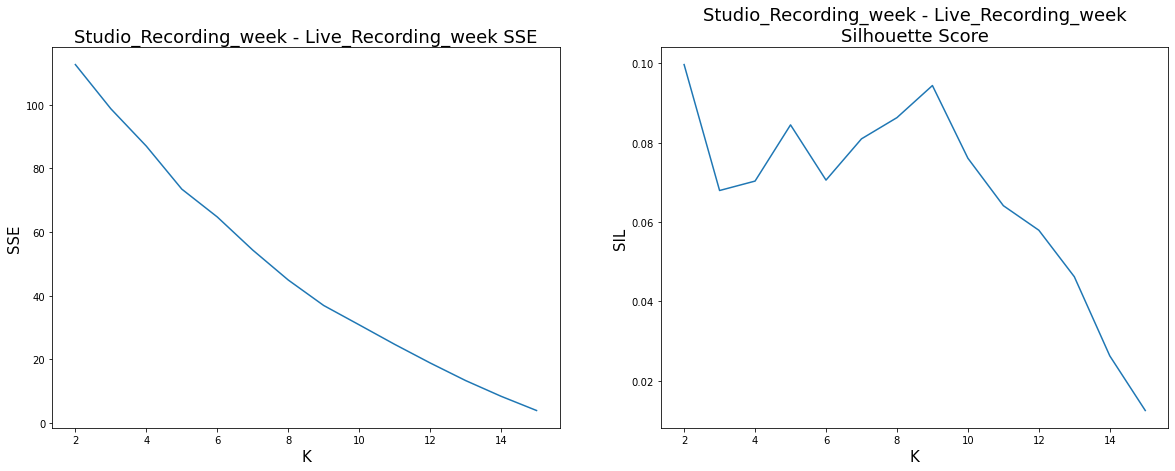

In [5264]:
find_optimal_k_kmeans(15, 'euclidean', X_sax, False, album_type)

In [5265]:
cluster_centers_studio_live_sax, dict_label_studio_live_sax, \
labels_studio_live_sax = run_kmeans(9, 1000, 10, 'euclidean', X_sax, False)

cluster_centers_shape (9, 26, 1)

Labels:  {0: 1, 1: 2, 2: 2, 3: 3, 4: 2, 5: 1, 6: 1, 7: 3, 8: 1}

SSE:  36.91666666666667
Silhouette Score:  0.09438140678627346


Dataset con le labels associate


0  1  2  3  4  5  6  7  8  9  ...  17  18  19  20  21  22  \
track_date_created                                ...                           
2009_studio         1  1  1  1  2  2  9  8  9  9  ...   1   2   3   2   5   6   
2010_studio         7  2  4  4  5  1  2  2  9  6  ...   2   8   8   2   8   4   
2011_studio         7  8  3  9  7  2  4  4  2  2  ...   2   3   3   1   6   2   
2012_studio         9  2  7  4  7  6  3  2  2  5  ...   3   3   2   8   6   2   
2013_studio         9  4  4  1  6  3  9  5  7  2  ...   4   2   5   3   5   4   
2014_studio         7  3  5  7  5  5  1  7  3  7  ...   3   2   1   5   6   3   
2015_studio         2  1  7  6  3  5  4  7  3  9  ...   2   5   4   5   4   6   
2016_studio         8  4  4  9  5  4  2  3  8  7  ...   7   3   8   4   4   2   
2009_live           7  6  1  6  7  7  9  5  8  5  ...   5   2   1   3   4   2   
2010_live           7  8  8  5  2  1  3  5  3  4  ...   3   6   6   3   5   3   
2011_live           2  2  0  6  1  1  6  3  6  5  ...   3   8   3   6   8   6   
2012_live           2  2  7  9  1  4  9  4  8  8  ...   6   3   3   5   2   2   
2013_live           3  3  1  8  3  9  1  6  3  3  ...   1   3   3   4   3   5   
2014_live           7  5  9  9  3  7  2  5  7  4  ...   2   5   2   7   2   3   
2015_live           4  5  5  6  7  2  4  3  6  4  ...   9   5   2   2   2   5   
2016_live           7  3  8  3  8  4  2  1  5  3  ...   2   3   3   2   6   6   

                    23  24  25  Labels  
track_date_created                      
2009_studio          4   5   4       6  
2010_studio          7   7   5       8  
2011_studio          2   5   5       4  
2012_studio          6   4   6       7  
2013_studio          7   7   4       2  
2014_studio          7   6   8       7  
2015_studio          3   8   2       3  
2016_studio          2   7   6       1  
2009_live            2   2   7       2  
2010_live            2   4   1       4  
2011_live            3   8   2       5  
2012_live            3   4   2       3  
2013_live            1   6   5       0  
2014_live            2   4   2       3  
2015_live            2   3   8       1  
2016_live            2   5   8       7  

[16 rows x 27 columns]

Cluster 0
 ['2013_live']

Cluster 1
 ['2016_studio', '2015_live']

Cluster 2
 ['2013_studio', '2009_live']

Cluster 3
 ['2015_studio', '2012_live', '2014_live']

Cluster 4
 ['2011_studio', '2010_live']

Cluster 5
 ['2011_live']

Cluster 6
 ['2009_studio']

Cluster 7
 ['2012_studio', '2014_studio', '2016_live']

Cluster 8
 ['2010_studio']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                0              1            1  -0.0000  1.0000
Cluster 1                1              1            2   1.0000  0.5000
Cluster 2                1              1            2   1.0000  0.5000
Cluster 3                1              2            3   0.9183  0.6667
Cluster 4                1              1            2   1.0000  0.5000
Cluster 5                0              1            1  -0.0000  1.0000
Cluster 6                1              0            1  -0.0000  1.0000
Cluster 7                2              1            3   0.9183  0.6667
Cluster 8                1              0            1  -0.0000  1.0000
Total                    8              8           16   0.7194  0.6875

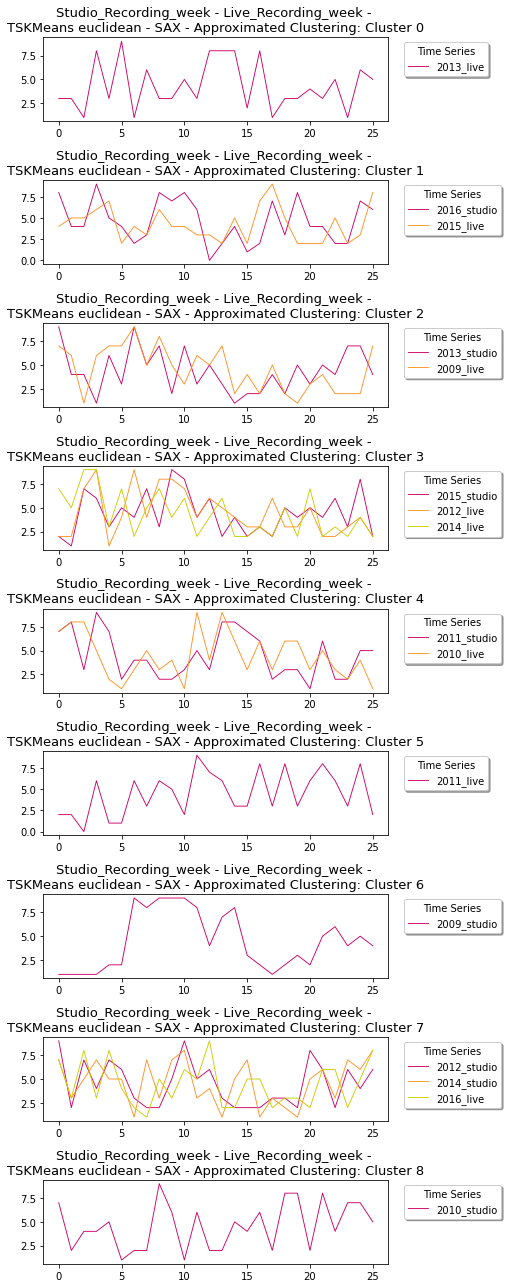

In [5266]:
analyze_approximated_clusters(labels_studio_live_sax, X_sax, df_tss_studio_live_scaled, \
                              album_type, \
                              '\nTSKMeans euclidean - SAX - Approximated Clustering', True)

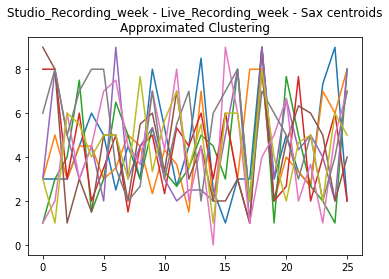

In [5267]:
plot_centroids_approximated(cluster_centers_studio_live_sax, X_sax, album_type, 'Sax')

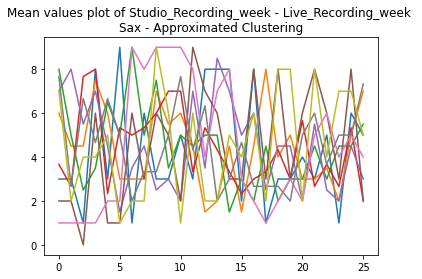

In [5268]:
plot_mean_values_approximated(labels_studio_live_sax, X_sax, album_type, 'Sax')

<h3>DTW</h3>

k:  2 SSE:  39.033812920449435 Silhouette Score:  0.21632175798410014

k:  3 SSE:  33.2399635087135 Silhouette Score:  0.12628552367046952

k:  4 SSE:  28.608412247474746 Silhouette Score:  0.11408669516704292

k:  5 SSE:  24.856006493506495 Silhouette Score:  0.08682946313719146

k:  6 SSE:  21.88514384920635 Silhouette Score:  0.08057714522634013

k:  7 SSE:  17.86984126984127 Silhouette Score:  0.06912876933128588

k:  8 SSE:  16.313516865079364 Silhouette Score:  0.05112974596297991

k:  9 SSE:  13.987549603174603 Silhouette Score:  0.050417036455928696

k:  10 SSE:  11.75 Silhouette Score:  0.055274130067655754

k:  11 SSE:  9.017410714285713 Silhouette Score:  0.04876811342457672

k:  12 SSE:  6.766666666666667 Silhouette Score:  0.04115210189008098

k:  13 SSE:  4.58125 Silhouette Score:  0.02004032869965729

k:  14 SSE:  3.083333333333333 Silhouette Score:  0.009159794567675263

k:  15 SSE:  1.4114583333333335 Silhouette Score:  0.008491326150455425



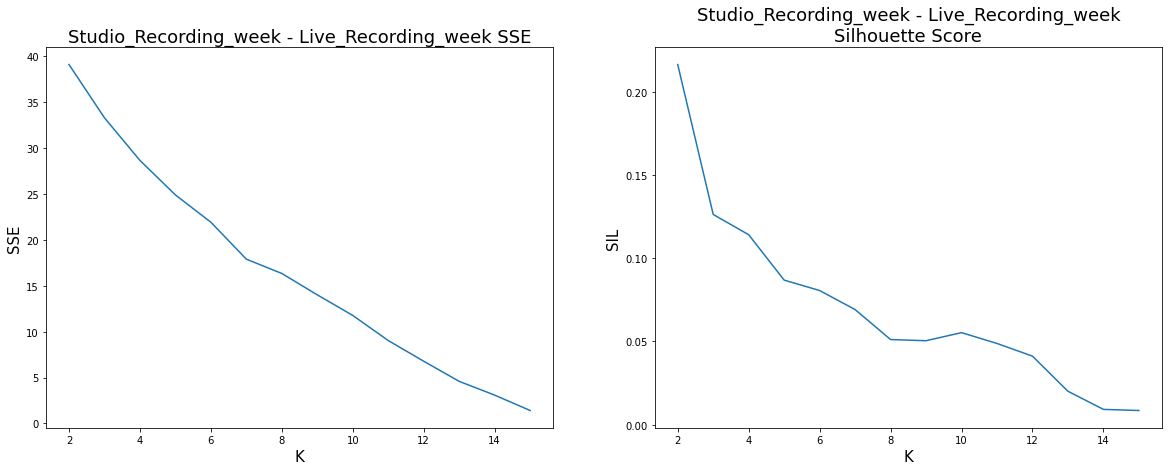

In [5269]:
find_optimal_k_kmeans(15, 'dtw', X_sax, False, album_type)

In [5270]:
cluster_centers_studio_live_sax_dtw, dict_label_studio_live_sax_dtw, \
labels_studio_live_sax_dtw = run_kmeans(3, 1000, 10, 'dtw', X_sax, False)

cluster_centers_shape (3, 26, 1)

Labels:  {0: 2, 1: 5, 2: 9}

SSE:  33.2399635087135
Silhouette Score:  0.12628552367046952


Dataset con le labels associate


0  1  2  3  4  5  6  7  8  9  ...  17  18  19  20  21  22  \
track_date_created                                ...                           
2009_studio         1  1  1  1  2  2  9  8  9  9  ...   1   2   3   2   5   6   
2010_studio         7  2  4  4  5  1  2  2  9  6  ...   2   8   8   2   8   4   
2011_studio         7  8  3  9  7  2  4  4  2  2  ...   2   3   3   1   6   2   
2012_studio         9  2  7  4  7  6  3  2  2  5  ...   3   3   2   8   6   2   
2013_studio         9  4  4  1  6  3  9  5  7  2  ...   4   2   5   3   5   4   
2014_studio         7  3  5  7  5  5  1  7  3  7  ...   3   2   1   5   6   3   
2015_studio         2  1  7  6  3  5  4  7  3  9  ...   2   5   4   5   4   6   
2016_studio         8  4  4  9  5  4  2  3  8  7  ...   7   3   8   4   4   2   
2009_live           7  6  1  6  7  7  9  5  8  5  ...   5   2   1   3   4   2   
2010_live           7  8  8  5  2  1  3  5  3  4  ...   3   6   6   3   5   3   
2011_live           2  2  0  6  1  1  6  3  6  5  ...   3   8   3   6   8   6   
2012_live           2  2  7  9  1  4  9  4  8  8  ...   6   3   3   5   2   2   
2013_live           3  3  1  8  3  9  1  6  3  3  ...   1   3   3   4   3   5   
2014_live           7  5  9  9  3  7  2  5  7  4  ...   2   5   2   7   2   3   
2015_live           4  5  5  6  7  2  4  3  6  4  ...   9   5   2   2   2   5   
2016_live           7  3  8  3  8  4  2  1  5  3  ...   2   3   3   2   6   6   

                    23  24  25  Labels  
track_date_created                      
2009_studio          4   5   4       1  
2010_studio          7   7   5       2  
2011_studio          2   5   5       2  
2012_studio          6   4   6       2  
2013_studio          7   7   4       0  
2014_studio          7   6   8       2  
2015_studio          3   8   2       1  
2016_studio          2   7   6       2  
2009_live            2   2   7       2  
2010_live            2   4   1       0  
2011_live            3   8   2       1  
2012_live            3   4   2       1  
2013_live            1   6   5       1  
2014_live            2   4   2       2  
2015_live            2   3   8       2  
2016_live            2   5   8       2  

[16 rows x 27 columns]

Cluster 0
 ['2013_studio', '2010_live']

Cluster 1
 ['2009_studio', '2015_studio', '2011_live', '2012_live', '2013_live']

Cluster 2
 ['2010_studio', '2011_studio', '2012_studio', '2014_studio', '2016_studio', '2009_live', '2014_live', '2015_live', '2016_live']



Studio_Recording Live_Recording  Tot_Cluster Entropy  Purity
Cluster 0                1              1            2  1.0000  0.5000
Cluster 1                2              3            5  0.9710  0.6000
Cluster 2                5              4            9  0.9911  0.5556
Total                    8              8           16  0.9859  0.5625

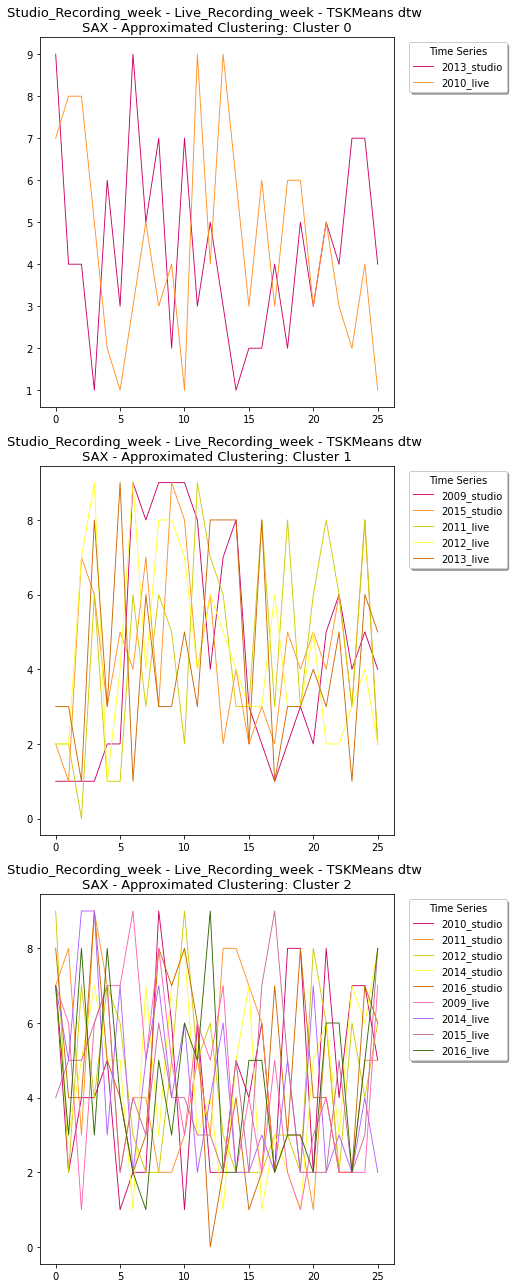

In [5271]:
analyze_approximated_clusters(labels_studio_live_sax_dtw, X_sax, df_tss_studio_live_scaled, album_type, \
                               'TSKMeans dtw \nSAX - Approximated Clustering', True)

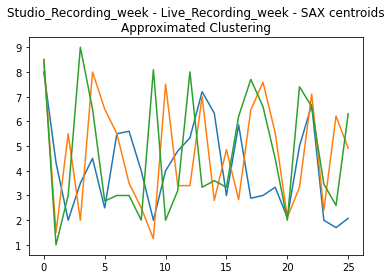

In [5272]:
plot_centroids_approximated(cluster_centers_studio_live_sax_dtw, X_sax, album_type, 'SAX')

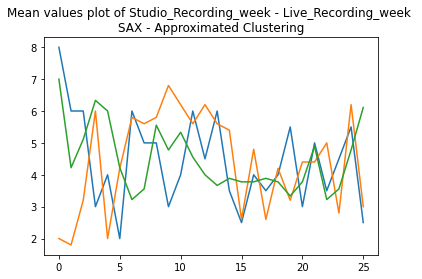

In [5273]:
plot_mean_values_approximated(labels_studio_live_sax_dtw, X_sax, album_type, 'SAX')